In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']


BS_animal_M2 = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']

act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'Z:\\Behavioor'

stdfont = 14
stdyfrac = 0.06

M2_FRmod_baseline_median = 2.3
AC_FRmod_baseline_median = 3.5

In [2]:
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.weight'] = 'light'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42



In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179


C:\Users\insan\anaconda3\envs\Ephyanalysis\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching files for DS_16
Fetching files for DS_17
Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching fi

C:\Users\insan\Desktop\EphysAnalysis\Notebooks\TH\Dual\../../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite v

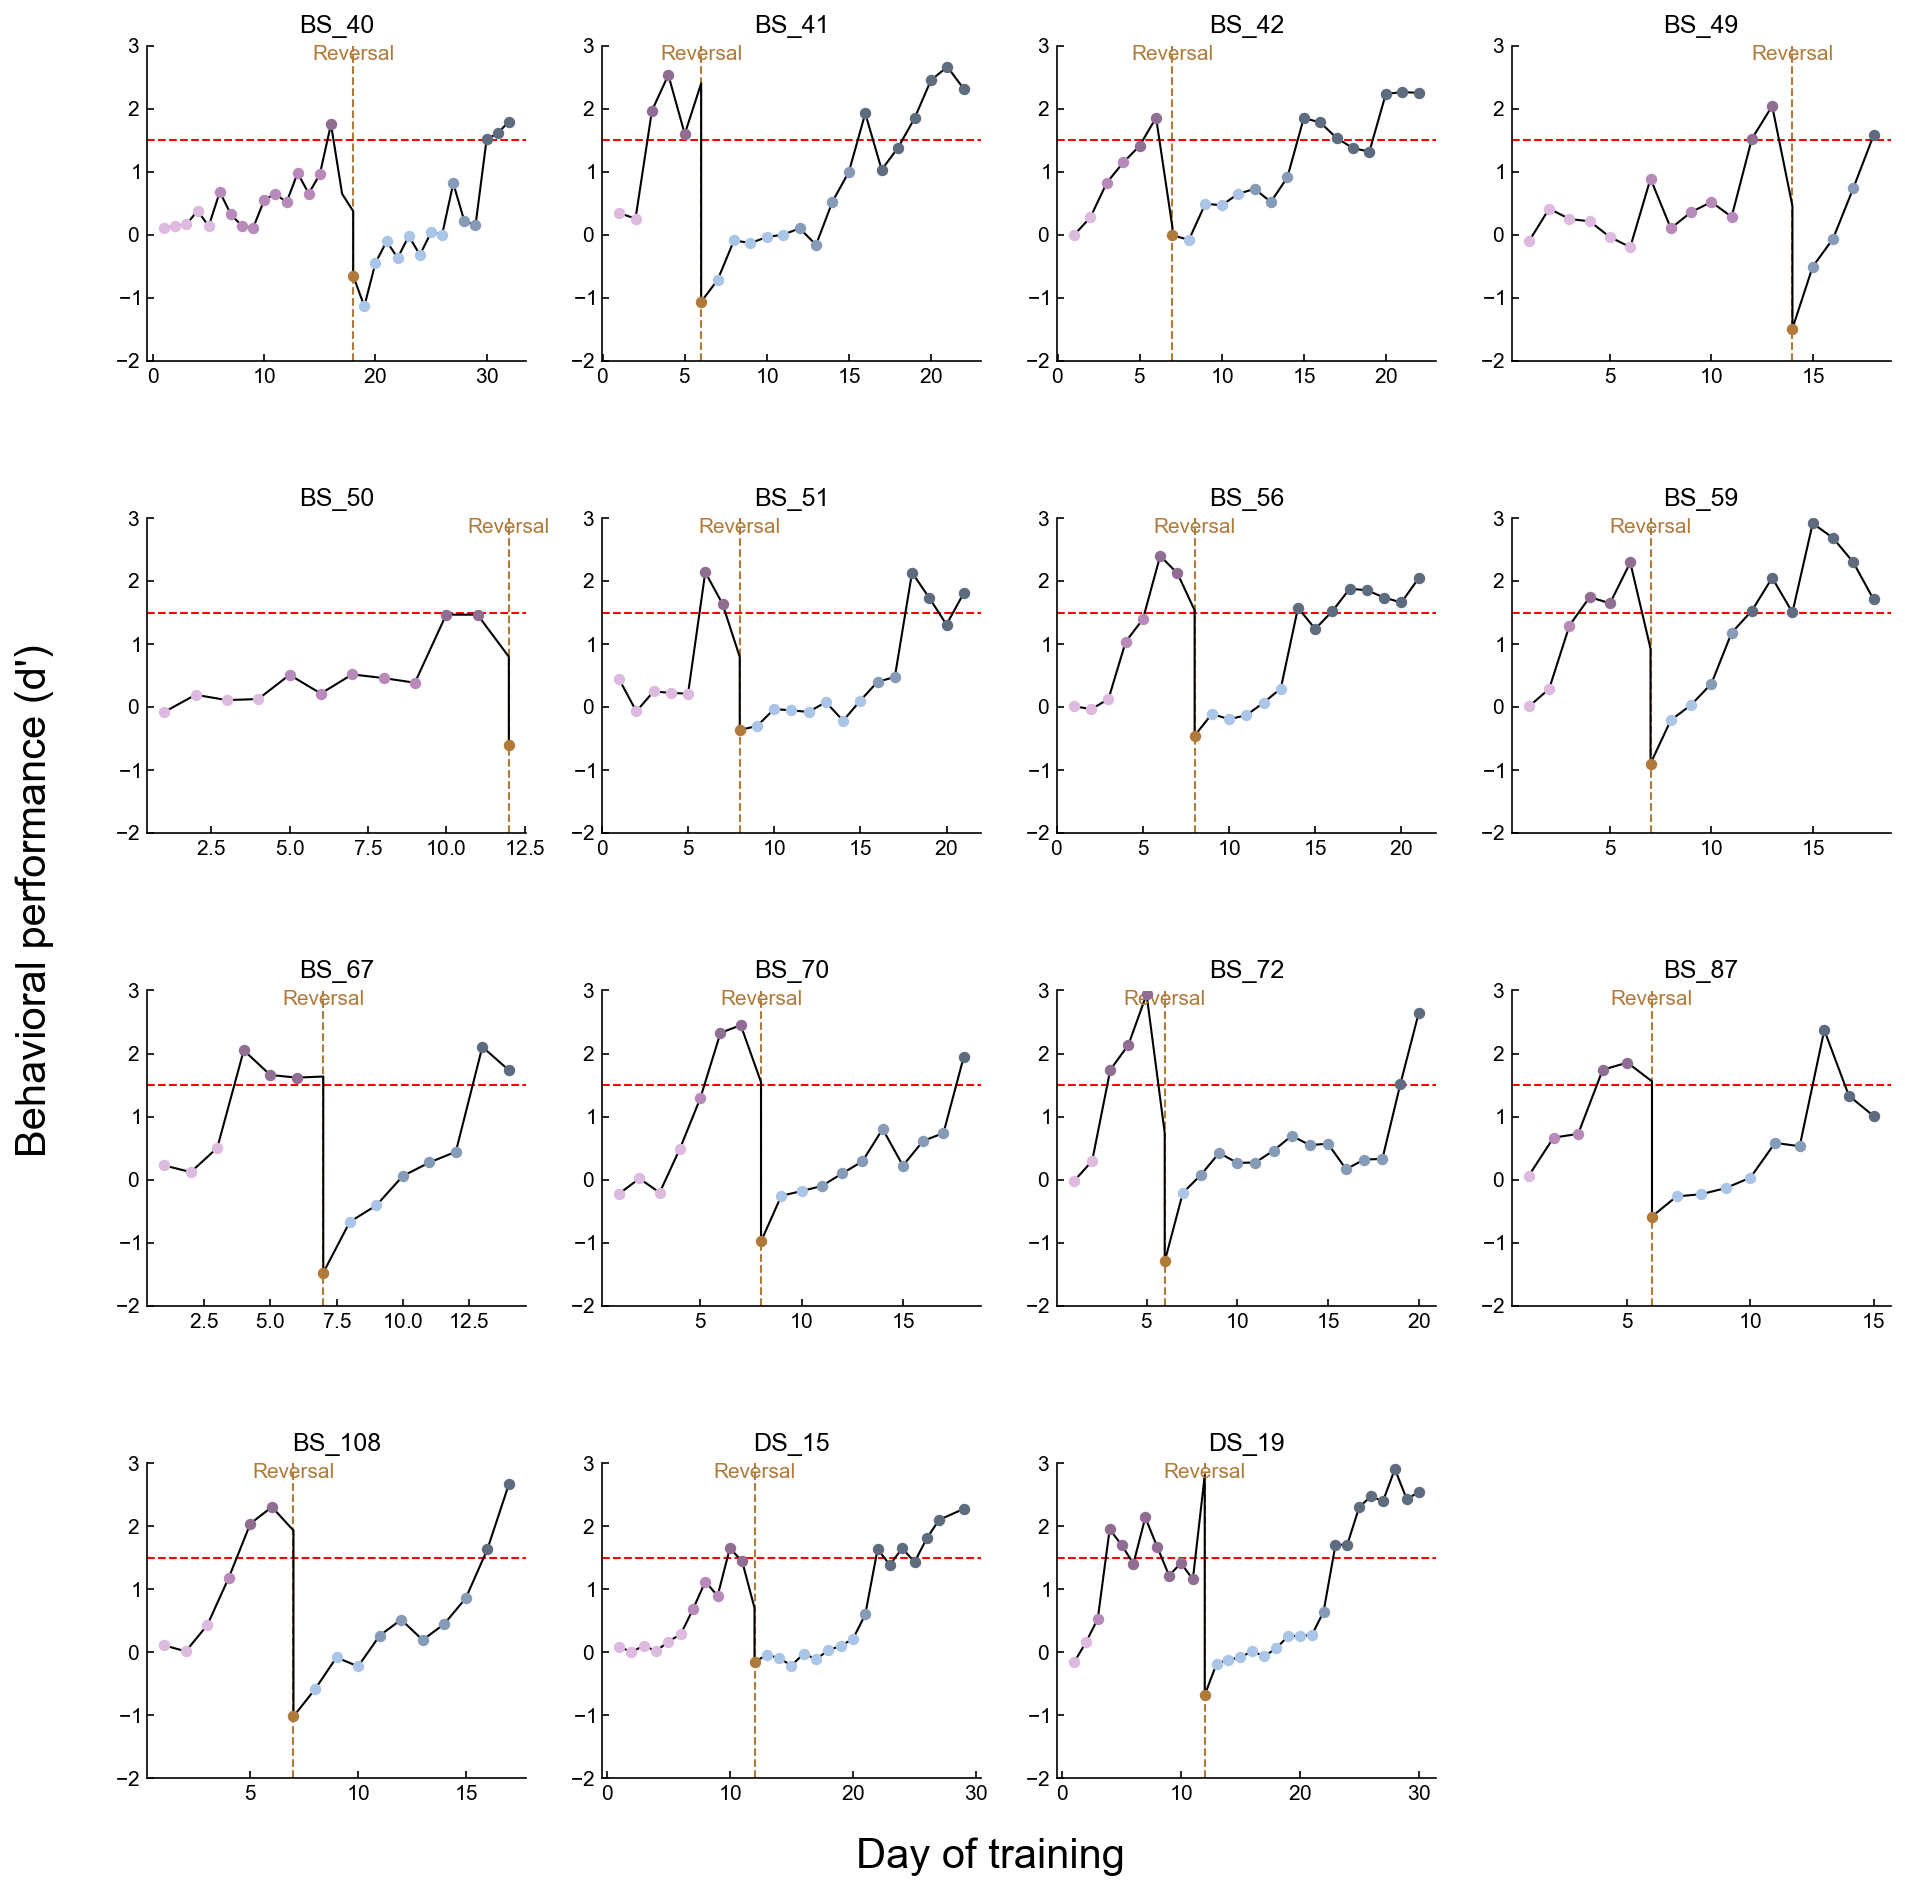

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)

In [5]:
EnumACSession = []
EnumACClust = []
EnumM2Session = []
EnumM2Clust = []

sessions = os.listdir(act_directory)

numAC = 0
numM2 = 0

for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.task in ['opto nonreversal','opto switch','opto reversal']:
        continue
    if sessionfile.meta.task in ['opto control nonreversal','opto control switch','opto control reversal']:
        continue
    
    if sessionfile.meta.animal not in animals:
        continue
    
    #attribute neurons based on the region
    if sessionfile.meta.region == 'AC':
        numAC += len(sessionfile.clusters.good)
        
        for clust in sessionfile.clusters.good:
            EnumACSession.append(session)
            EnumACClust.append(clust)
            
    elif sessionfile.meta.region == 'M2':
        numM2 += len(sessionfile.clusters.good)
        
        for clust in sessionfile.clusters.good:
            EnumM2Session.append(session)
            EnumM2Clust.append(clust)    
    else:
        pass

        
print('AC       : ' + str(numAC))
print('M2       : ' + str(numM2))

100%|██████████| 550/550 [00:08<00:00, 61.31it/s]

AC       : 1832
M2       : 1628


In [6]:
EILM2phases = np.full_like(EnumM2Session,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumM2Session)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            EILM2phases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILM2phases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILM2phases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILM2phases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            EILM2phases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            EILM2phases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            EILM2phases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1628/1628 [00:30<00:00, 53.34it/s] 

errors for: []


In [7]:
EILACphases = np.full_like(EnumACSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumACSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            EILACphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILACphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILACphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILACphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            EILACphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            EILACphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            EILACphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1832/1832 [00:34<00:00, 52.96it/s] 

errors for: []


In [8]:
preearly_animals_M2 = []
prelate_animals_M2  = []
preexpert_animals_M2  = []
postearly_animals_M2  = []
postlate_animals_M2  = []
postexpert_animals_M2  = []

FRmod_preearly_M2 = []
FRmod_prelate_M2 = []
FRmod_preexpert_M2 = []
FRmod_postearly_M2 = []
FRmod_postlate_M2 = []
FRmod_postexpert_M2 = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumM2Session,EnumM2Clust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILM2phases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        
    except Exception as e:
        FRmod = np.nan
        
    if EILM2phases[idx] == 'pre early':
        FRmod_preearly_M2.append(FRmod)
        preearly_animals_M2.append(sessionfile.meta.animal)   
        
    elif EILM2phases[idx] == 'pre late':
        FRmod_prelate_M2.append(FRmod)
        prelate_animals_M2.append(sessionfile.meta.animal)  
        
    elif EILM2phases[idx] == 'pre expert':
        FRmod_preexpert_M2.append(FRmod)
        preexpert_animals_M2.append(sessionfile.meta.animal)     
        
    elif EILM2phases[idx] == 'post early':
        FRmod_postearly_M2.append(FRmod)
        postearly_animals_M2.append(sessionfile.meta.animal)   
        
    elif EILM2phases[idx] == 'post late':
        FRmod_postlate_M2.append(FRmod)
        postlate_animals_M2.append(sessionfile.meta.animal)    
        
    elif EILM2phases[idx] == 'post expert':
        FRmod_postexpert_M2.append(FRmod)
        postexpert_animals_M2.append(sessionfile.meta.animal)

FRmod_preearly_M2 = np.array(FRmod_preearly_M2)
FRmod_prelate_M2 = np.array(FRmod_prelate_M2)
FRmod_preexpert_M2 = np.array(FRmod_preexpert_M2)
FRmod_postearly_M2 = np.array(FRmod_postearly_M2)
FRmod_postlate_M2 = np.array(FRmod_postlate_M2)
FRmod_postexpert_M2 = np.array(FRmod_postexpert_M2)

1628it [00:32, 50.65it/s] 


In [9]:
preearly_animals_AC = []
prelate_animals_AC  = []
preexpert_animals_AC  = []
postearly_animals_AC  = []
postlate_animals_AC  = []
postexpert_animals_AC  = []

FRmod_preearly_AC = []
FRmod_prelate_AC = []
FRmod_preexpert_AC = []
FRmod_postearly_AC = []
FRmod_postlate_AC = []
FRmod_postexpert_AC = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILACphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        
    except Exception as e:
        FRmod = np.nan
        
    if EILACphases[idx] == 'pre early':
        FRmod_preearly_AC.append(FRmod)
        preearly_animals_AC.append(sessionfile.meta.animal)   
        
    elif EILACphases[idx] == 'pre late':
        FRmod_prelate_AC.append(FRmod)
        prelate_animals_AC.append(sessionfile.meta.animal)  
        
    elif EILACphases[idx] == 'pre expert':
        FRmod_preexpert_AC.append(FRmod)
        preexpert_animals_AC.append(sessionfile.meta.animal)     
        
    elif EILACphases[idx] == 'post early':
        FRmod_postearly_AC.append(FRmod)
        postearly_animals_AC.append(sessionfile.meta.animal)   
        
    elif EILACphases[idx] == 'post late':
        FRmod_postlate_AC.append(FRmod)
        postlate_animals_AC.append(sessionfile.meta.animal)    
        
    elif EILACphases[idx] == 'post expert':
        FRmod_postexpert_AC.append(FRmod)
        postexpert_animals_AC.append(sessionfile.meta.animal)

FRmod_preearly_AC = np.array(FRmod_preearly_AC)
FRmod_prelate_AC = np.array(FRmod_prelate_AC)
FRmod_preexpert_AC = np.array(FRmod_preexpert_AC)
FRmod_postearly_AC = np.array(FRmod_postearly_AC)
FRmod_postlate_AC = np.array(FRmod_postlate_AC)
FRmod_postexpert_AC = np.array(FRmod_postexpert_AC)

1832it [00:33, 55.41it/s] 


In [10]:
preearly_animals_M2 = np.unique(preearly_animals_M2)
prelate_animals_M2 = np.unique(prelate_animals_M2)
preexpert_animals_M2 = np.unique(preexpert_animals_M2)
postearly_animals_M2 = np.unique(postearly_animals_M2)
postlate_animals_M2 = np.unique(postlate_animals_M2)
postexpert_animals_M2 = np.unique(postexpert_animals_M2)

preearly_animals_AC = np.unique(preearly_animals_AC)
prelate_animals_AC = np.unique(prelate_animals_AC)
preexpert_animals_AC = np.unique(preexpert_animals_AC)
postearly_animals_AC = np.unique(postearly_animals_AC)
postlate_animals_AC = np.unique(postlate_animals_AC)
postexpert_animals_AC = np.unique(postexpert_animals_AC)

print('M2 Animals')
print(preearly_animals_M2)
print(prelate_animals_M2)
print(preexpert_animals_M2)
print(postearly_animals_M2)
print(postlate_animals_M2)
print(postexpert_animals_M2)
print('AC Animals')
print(preearly_animals_AC)
print(prelate_animals_AC)
print(preexpert_animals_AC)
print(postearly_animals_AC)
print(postlate_animals_AC)
print(postexpert_animals_AC)

M2 Animals
['BS_49' 'BS_50']
['BS_40' 'BS_49' 'BS_50' 'BS_70']
['BS_108' 'BS_50' 'BS_70' 'BS_72' 'BS_87']
['BS_108' 'BS_40' 'BS_41' 'BS_42' 'BS_70' 'BS_72' 'BS_87']
['BS_108' 'BS_41' 'BS_42' 'BS_49' 'BS_67' 'BS_70' 'BS_72' 'BS_87']
['BS_41' 'BS_42' 'BS_51' 'BS_56' 'BS_59' 'BS_67' 'BS_87']
AC Animals
['BS_49' 'BS_50']
['BS_40' 'BS_49' 'BS_50' 'BS_70']
['BS_108' 'BS_40' 'BS_49' 'BS_72' 'BS_87' 'DS_15' 'DS_19']
['BS_108' 'BS_40' 'BS_41' 'BS_42' 'BS_70' 'BS_72' 'BS_87']
['BS_40' 'BS_41' 'BS_42' 'BS_49' 'BS_67' 'BS_70' 'BS_72' 'BS_87']
['BS_40' 'BS_41' 'BS_42' 'BS_49' 'BS_51' 'BS_56' 'BS_67' 'BS_70' 'BS_87'
 'DS_15' 'DS_19']


In [11]:
AC_sessions = np.unique(EnumACSession)
M2_sessions = np.unique(EnumM2Session)

AC_sessions = list(AC_sessions)
M2_sessions = list(M2_sessions)

In [12]:
ACphases = np.full_like(AC_sessions,np.nan)
error_animals = []

AC_switch = []
AC_preearly = []
AC_prelate = []
AC_preexpert = []
AC_postearly = []
AC_postlate = []
AC_postexpert = []

for idx,session in enumerate(tqdm(AC_sessions)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            ACphases[idx] = 'switch'
            AC_switch.append(session)

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            ACphases[idx] = 'pre early'
            AC_preearly.append(session)
            
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            ACphases[idx] = 'pre late'
            AC_prelate.append(session)
            
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            ACphases[idx] = 'pre expert'
            AC_preexpert.append(session)

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            ACphases[idx] = 'post early'
            AC_postearly.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            ACphases[idx] = 'post late'
            AC_postlate.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            ACphases[idx] = 'post expert'
            AC_postexpert.append(session)
            
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 132/132 [00:01<00:00, 91.59it/s] 

errors for: []


In [13]:
M2phases = np.full_like(M2_sessions,np.nan)
error_animals = []

M2_switch = []
M2_preearly = []
M2_prelate = []
M2_preexpert = []
M2_postearly = []
M2_postlate = []
M2_postexpert = []

for idx,session in enumerate(tqdm(M2_sessions)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            M2phases[idx] = 'switch'
            M2_switch.append(session)

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            M2phases[idx] = 'pre early'
            M2_preearly.append(session)
            
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            M2phases[idx] = 'pre late'
            M2_prelate.append(session)
            
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            M2phases[idx] = 'pre expert'
            M2_preexpert.append(session)

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            M2phases[idx] = 'post early'
            M2_postearly.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            M2phases[idx] = 'post late'
            M2_postlate.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            M2phases[idx] = 'post expert'
            M2_postexpert.append(session)
            
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))


100%|██████████| 103/103 [00:01<00:00, 83.18it/s]

errors for: []


In [14]:
sessionfile.clusters.good

array([ 0,  4, 11, 13, 19, 20, 27, 42, 45, 48, 67, 68], dtype=int64)

In [21]:
def visualizeClusterInternal(sessionfile,clust,sessionname, Phase):
    bw_scott_factor = 3
    

    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
 
    mn = M2_FRmod_baseline_median 
    spread = 2.5
    FRmod_color = NCR_CR_cmap( (FRmod-(mn-spread/2))/ (spread) )
    color_to_use = FRmod_color
    
    ##################
    allConditions = ilep.getAllConditions(sessionfile,clust)
    trialsToPlot = allConditions['all_trials'].trials

    tone_times = sessionfile.trials.starts
    clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    trialSpikes = []
    
    for trial in trialsToPlot:

        #Need to get spike times for each trail...
        starttime = tone_times[trial]-0.35*sessionfile.meta.fs #0.25
        endtime = tone_times[trial]+1.6*sessionfile.meta.fs #1.5

        this_trial_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        this_trial_spikes = this_trial_spikes - tone_times[trial]
        this_trial_spikes = this_trial_spikes * 1000 / sessionfile.meta.fs

        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')
    
    #Plot PSTH
    starttime = -250-100 #-350
    endtime = 1500+100 #1600
    PSTHstart = starttime - 100
    PSTHend = endtime + 100
    xrange = np.linspace(starttime,endtime,num=1950)
    #numSplits=10
    numSplits = min(10,len(trialSpikes))
    if numSplits < 2:
        return False,[] ### Return a failure
    
    FR = np.full((numSplits,len(xrange)),np.nan)
    kf = KFold(n_splits=numSplits)
    for idx,(train_index,_) in enumerate(kf.split(trialSpikes)):
        PSTHspikes = np.concatenate(trialSpikes[train_index])
        PSTHspikes_len = len(PSTHspikes)
        if len(PSTHspikes) == 0:
            FR[idx,:] = np.zeros(len(xrange))
            continue
        bw = len(PSTHspikes)**(-1./5) / bw_scott_factor
        KDE = gaussian_kde(PSTHspikes,bw_method=bw)
        FR[idx,:] = KDE.evaluate(xrange)
        FR[idx,:] = FR[idx,:] * len(PSTHspikes) / len(train_index) * 1000 #1000 is conversion to s/s because units are all in ms for this plot



    return PSTHspikes_len

In [23]:
for session in M2_prelate:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    for clust in clust_M2:
        print(clust)
        a = visualizeClusterInternal(session_M2,clust,sessionname,'Prelate')
        print(a)
        

13
2747
82
2364
83
7909
85
2280
88
3994
94
2928
96
2361
97
3592
110
2392
112
1571
113
1595
120
9855
121
1429
129
2157
135
3644
138
11045
139
2962
165
5714
171
7118
173
2763
174
14508
181
2175
198
2711
209
1986
212
594
218
397
229
2488
233
3304
237
460
240
1268
245
1830
250
1406
252
7765
253
234
254
11628
0
1288
1
1470
2
1275
3
1023
5
402
9
4412
10
2228
12
5460
13
7902
16
9052
18
1610
19
1030
21
2569
22
788
27
2175
28
5222
29
2024
33
1278
34
1642
36
3027
38
525
42
2822
45
720
47
654
48
1276
49
1158
55
1290
63
998
64
548
74
1148
75
598
77
1961
83
560
85
2405
86
967
87
1134
88
799
89
2627
90
1638
93
366
97
748
99
3345
104
6526
105
1114
106
8998
0
2984
6
574
7
794
8
2736
9
2161
10
1214
13
2348
19
2267
21
6035
29
5618
39
4658
40
871
41
814
42
14182
44
1717
46
1414
47
1682
50
2288
54
1037
55
4710
58
353
62
4245
64
4618
65
2512
72
831
77
239
81
1305
83
3344
87
3104
89
5788
91
656
101
10108
104
6682
105
426
110
1313
112
1481
113
275
114
2882
155
6103
156
341
1
1753
2
924
8
1603
10
841
12
6994


KeyboardInterrupt: 

In [29]:
for session in M2_prelate:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    print(clust_M2)

[ 13  82  83  85  88  94  96  97 110 112 113 120 121 129 135 138 139 165
 171 173 174 181 198 209 212 218 229 233 237 240 245 250 252 253 254]
[  0   1   2   3   5   9  10  12  13  16  18  19  21  22  27  28  29  33
  34  36  38  42  45  47  48  49  55  63  64  74  75  77  83  85  86  87
  88  89  90  93  97  99 104 105 106]
[  0   6   7   8   9  10  13  19  21  29  39  40  41  42  44  46  47  50
  54  55  58  62  64  65  72  77  81  83  87  89  91 101 104 105 110 112
 113 114 155 156]
[ 1  2  8 10 12 14 15 17 20 23 24 27 43 49 50 51 57 58 64 69 70 71]
[  0   7   8  14  18  20  21  24  30  33  34  57  67  75  78  80  84  92
  96  99 101 102 112 115 122]
[ 6 15 26 28 33 39 40 42 46 47 49 50 51 56 59 60]
[ 2 21]
[ 2 10 19 20 22 23 24 25]
[ 0  4  5  7 12]
[ 1  4  7 10 13 14]
[ 0  2  4 10 15 16 32 33 35 38 41 43 44 48 56 65 71 74]
[ 0  4  5  9 16 17 18 23 29 35 39 40 42 44 52 57 60]
[12]


### M2

In [35]:
M2_peaklatency_preearly = []
M2_peaklatency_prelate = []
M2_peaklatency_preexpert = []
M2_peaklatency_postearly = []
M2_peaklatency_postlate = []
M2_peaklatency_postexpert = []

In [36]:
def visualizeClusterInternal(sessionfile,clust,sessionname, Phase):
    bw_scott_factor = 3
    
    fig = plt.figure(figsize=(4,6))
    gs = fig.add_gridspec(2,1,height_ratios=[2,1],hspace=0.0125)
    ax1 = plt.subplot(gs[0,0])#Raster
    ax2 = plt.subplot(gs[1,0],sharex=ax1)#PSTH
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
 
    mn = M2_FRmod_baseline_median 
    spread = 2.5
    FRmod_color = NCR_CR_cmap( (FRmod-(mn-spread/2))/ (spread) )
    color_to_use = FRmod_color
    
    ##################
    allConditions = ilep.getAllConditions(sessionfile,clust)
    trialsToPlot = allConditions['all_trials'].trials

    tone_times = sessionfile.trials.starts
    clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    trialSpikes = []
    
    for trial in trialsToPlot:

        #Need to get spike times for each trail...
        starttime = tone_times[trial]-0.35*sessionfile.meta.fs #0.25
        endtime = tone_times[trial]+1.6*sessionfile.meta.fs #1.5

        this_trial_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        this_trial_spikes = this_trial_spikes - tone_times[trial]
        this_trial_spikes = this_trial_spikes * 1000 / sessionfile.meta.fs

        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')
    
    #Plot Raster
    for idx,trial in enumerate(trialsToPlot):
        ax1.scatter(trialSpikes[idx],np.ones_like(trialSpikes[idx])*idx,color=color_to_use,s=5,marker='o',lw=0)
    ax1.fill_betweenx(range(len(trialsToPlot)), 0, 100, alpha=0.3, color=FRmod_color, lw=0,) #shading stim
    
    #Plot PSTH
    starttime = -250-100 #-350
    endtime = 1500+100 #1600
    PSTHstart = starttime - 100
    PSTHend = endtime + 100
    xrange = np.linspace(starttime,endtime,num=1950)
    #numSplits=10
    numSplits = min(10,len(trialSpikes))
    if numSplits < 2:
        return False,[] ### Return a failure
    
    FR = np.full((numSplits,len(xrange)),np.nan)
    kf = KFold(n_splits=numSplits)
    for idx,(train_index,_) in enumerate(kf.split(trialSpikes)):
        PSTHspikes = np.concatenate(trialSpikes[train_index])
        if len(PSTHspikes) == 0:
            FR[idx,:] = np.zeros(len(xrange))
            continue
        bw = len(PSTHspikes)**(-1./5) / bw_scott_factor
        KDE = gaussian_kde(PSTHspikes,bw_method=bw)
        FR[idx,:] = KDE.evaluate(xrange)
        FR[idx,:] = FR[idx,:] * len(PSTHspikes) / len(train_index) * 1000 #1000 is conversion to s/s because units are all in ms for this plot
    avg_FR = np.mean(FR,axis=0)
    sem_FR = np.std(FR,axis=0)
    
    ax2.plot(xrange,avg_FR,lw=1,color=color_to_use)
    ax2.fill_between(xrange,avg_FR-sem_FR,avg_FR+sem_FR,color=color_to_use,alpha=0.5,zorder=-10,lw=0)
    
    max_FR_value = np.max(avg_FR+sem_FR) * 1.1
    sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
    idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
    valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
    limit = np.min(valid_limits)
    ax2.set_ylim([0,limit])
    ax2.set_yticks([0,limit/2,limit])
    ax2.set_yticklabels(['0',str(int(limit/2)),str(limit)],size=12)
    
    
    ax2.set_ylabel('Firing rate (spikes/s)',size=12)

    ax2.plot([0,100],[limit,limit],color='k',lw=2,linestyle='-') #zorder = 10 line of tone

    
    ax2.set_xlim([-250,1500])
    ax2.set_xticks([0,500,1000,1500])
    ax2.set_xticklabels(['0','500','1000','1500'],size=12)
    ax2.set_xlabel('Time (ms)',size=12)
    
    ######
    baseline_FR = sessionfile.responsiveness[clust]['all_trials'].FRbaseline

    diff_from_baseline = np.abs(avg_FR[350:1350] - baseline_FR)
    
    peak = np.max(diff_from_baseline) #len=1000
    peak_time = np.argmax(diff_from_baseline) #ms
    
    #print(peak_time)
    
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    
    if FRmod>=M2_FRmod_baseline_median:
        ax2.axvline(x=peak_time,color='green')
    
    fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Peak_latency\\Stimulus\\M2\\'+Phase+str(sessionname)+',clust'+str(clust)+'.pdf'),transparent=False,facecolor="white", bbox_inches = 'tight')
    
    plt.close(fig)
    return fig,[ax1,ax2],FRmod,peak_time

In [37]:
for session in M2_preearly:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    for clust in clust_M2:
        visualizeClusterInternal(session_M2,clust,sessionname,'Preearly')
        FRmod = visualizeClusterInternal(session_M2,clust,sessionname,'Preearly')[-2]
        peak_time = visualizeClusterInternal(session_M2,clust,sessionname,'Preearly')[-1]
        if FRmod>=M2_FRmod_baseline_median:
            M2_peaklatency_preearly.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

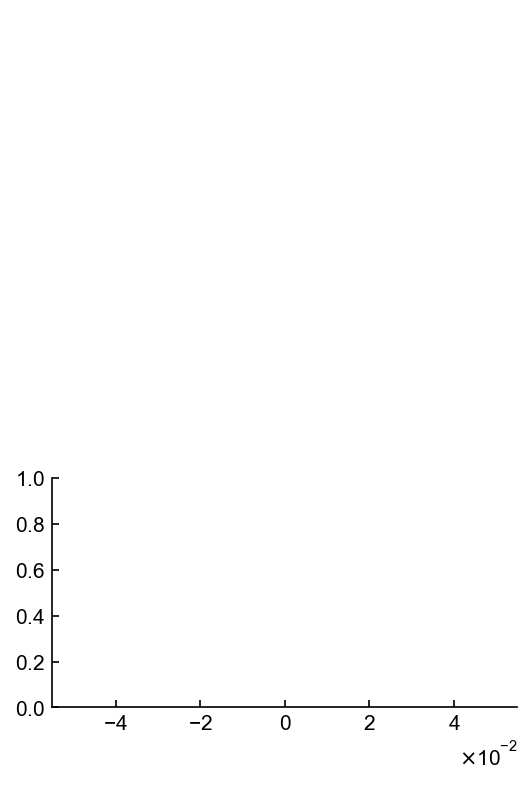

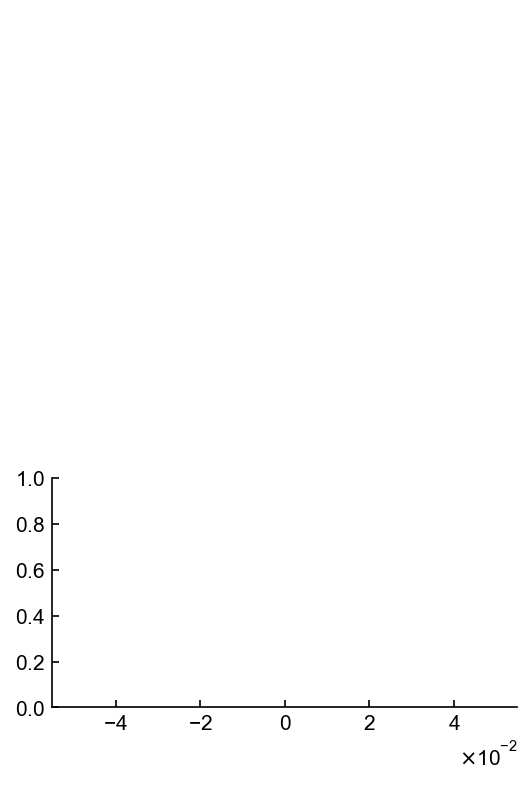

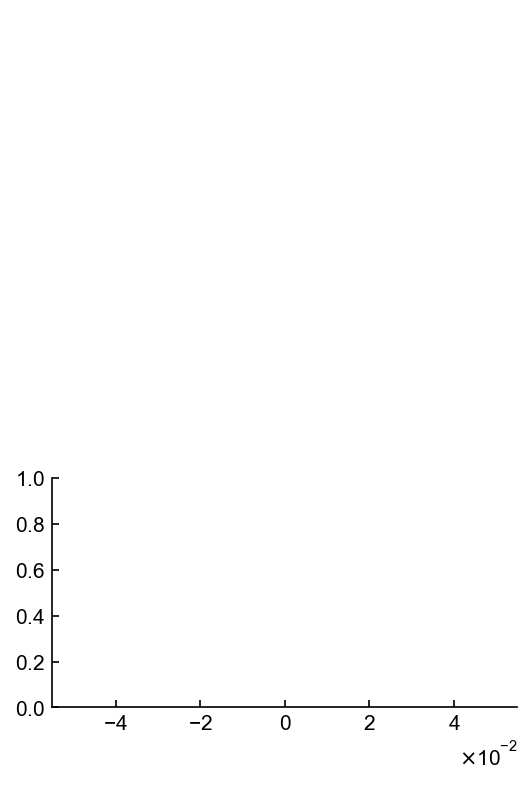

In [38]:
for session in M2_prelate[:-1]:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    for clust in clust_M2:
        visualizeClusterInternal(session_M2,clust,sessionname,'Prelate')
        FRmod = visualizeClusterInternal(session_M2,clust,sessionname,'Prelate')[-2]
        peak_time = visualizeClusterInternal(session_M2,clust,sessionname,'Prelate')[-1]
        if FRmod>=M2_FRmod_baseline_median:
            M2_peaklatency_prelate.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

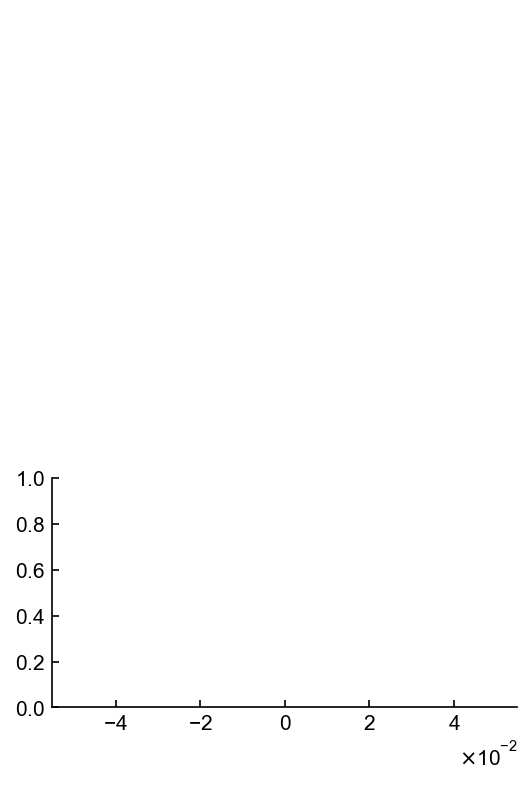

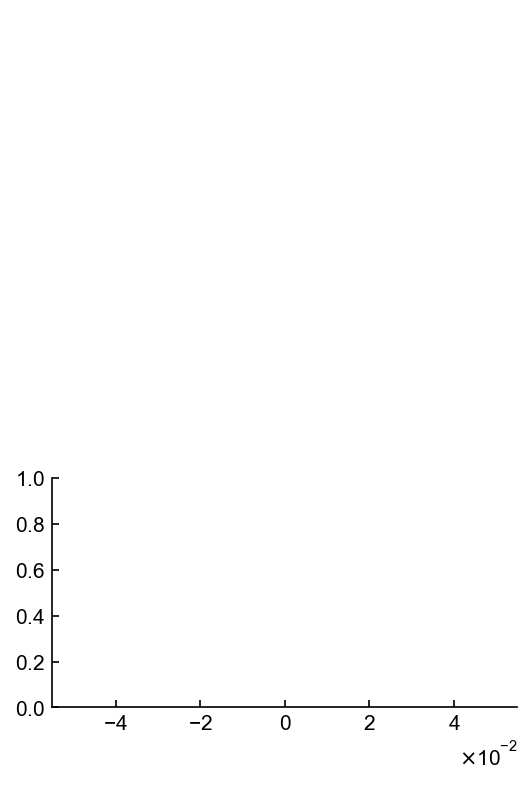

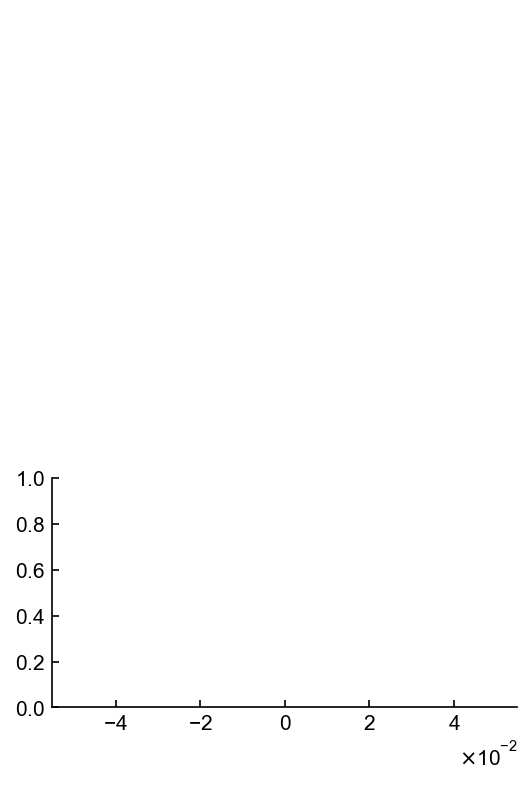

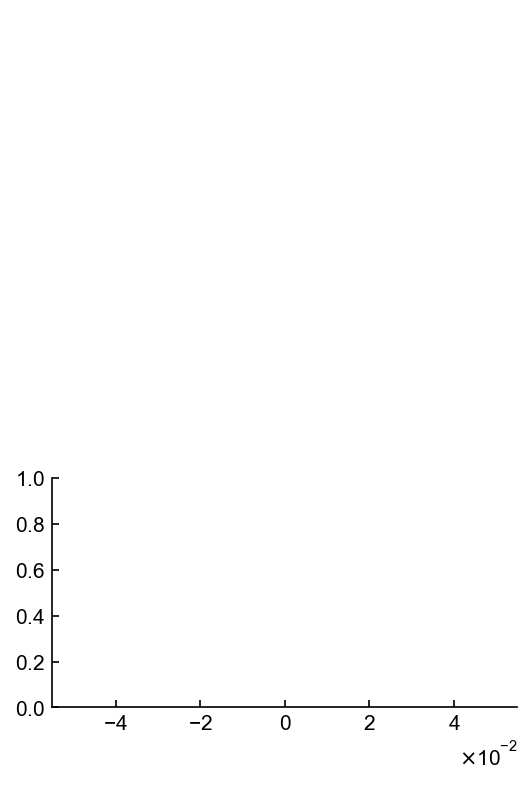

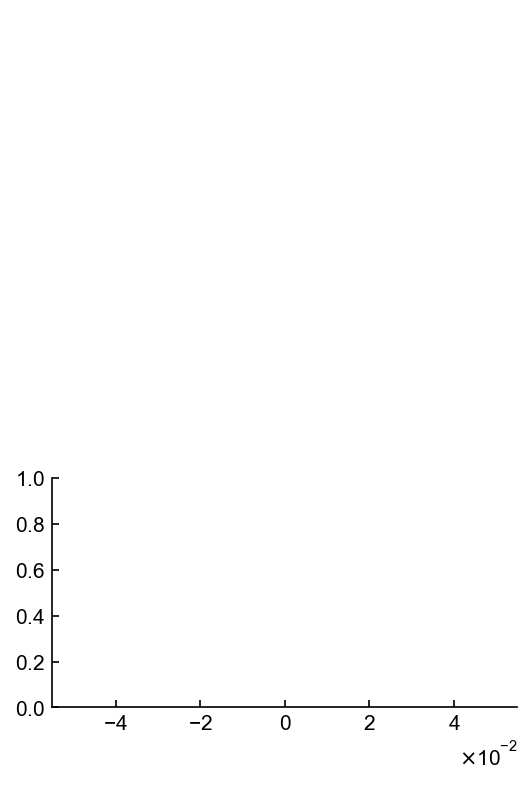

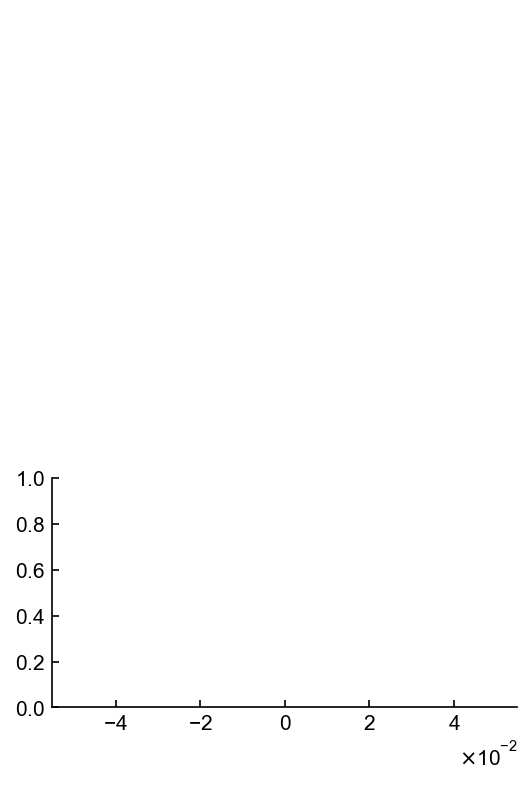

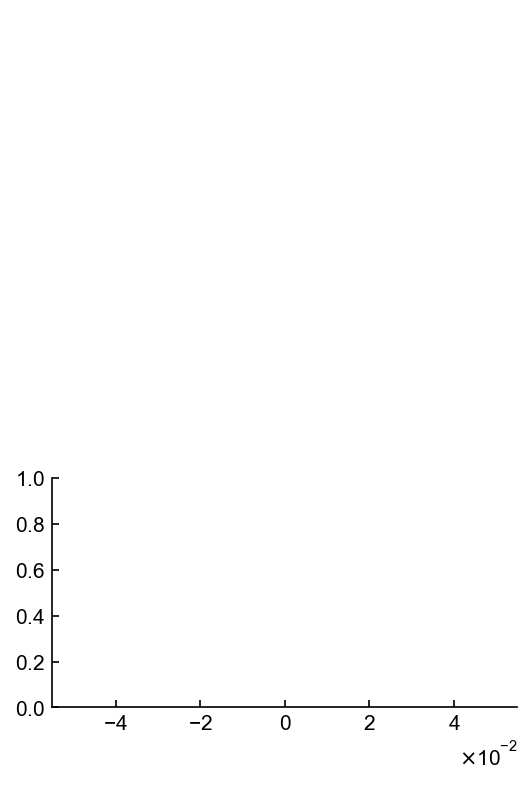

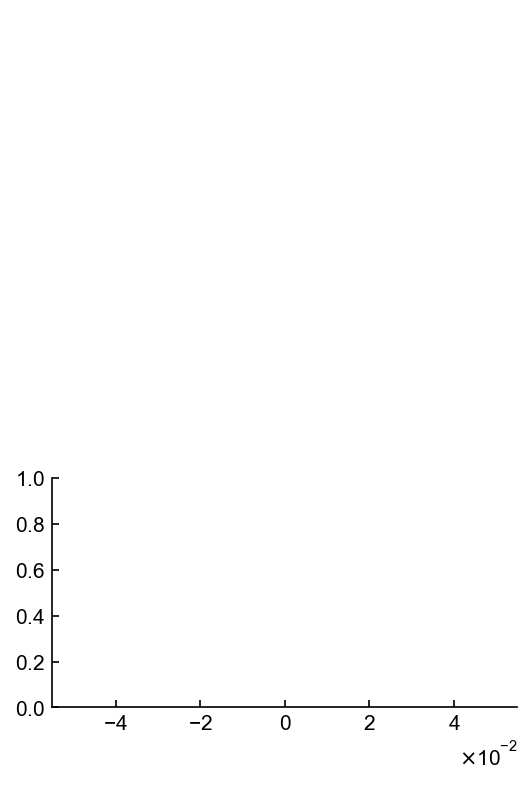

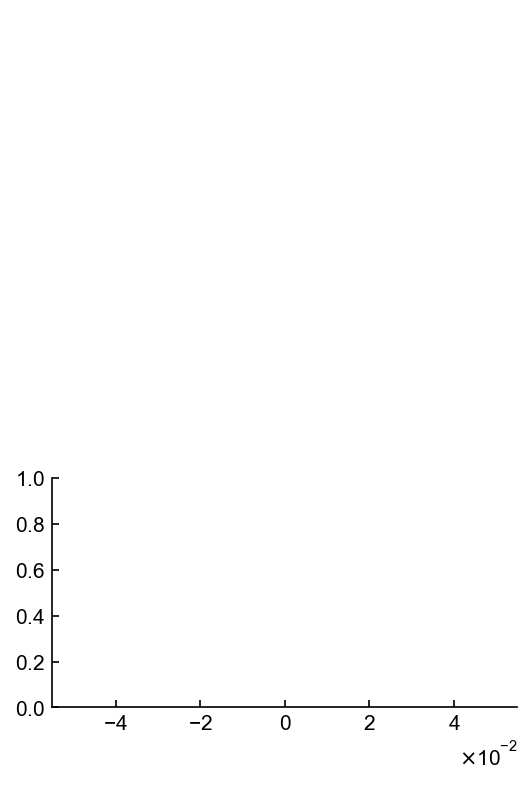

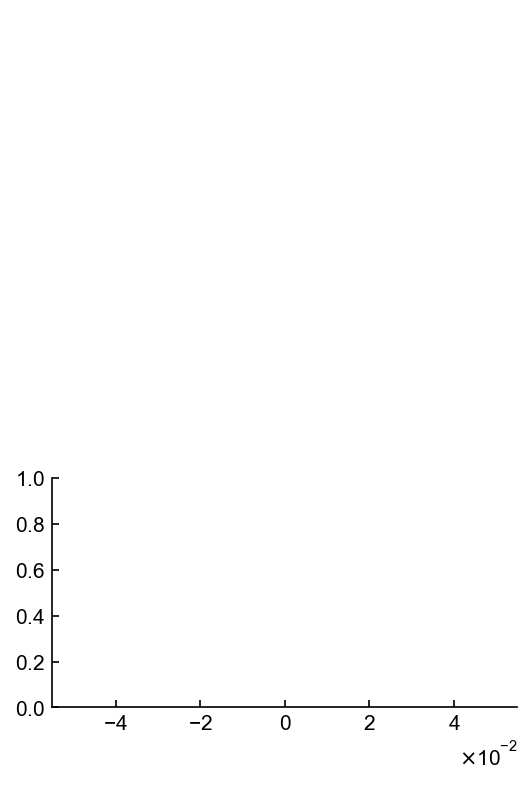

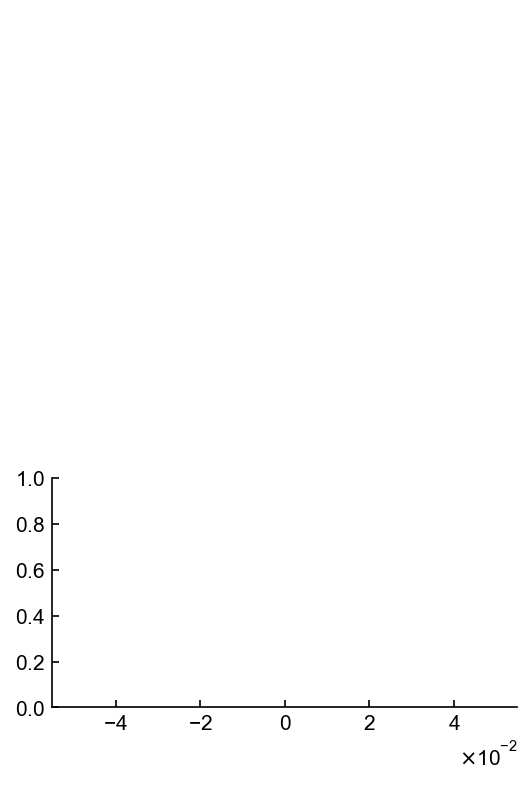

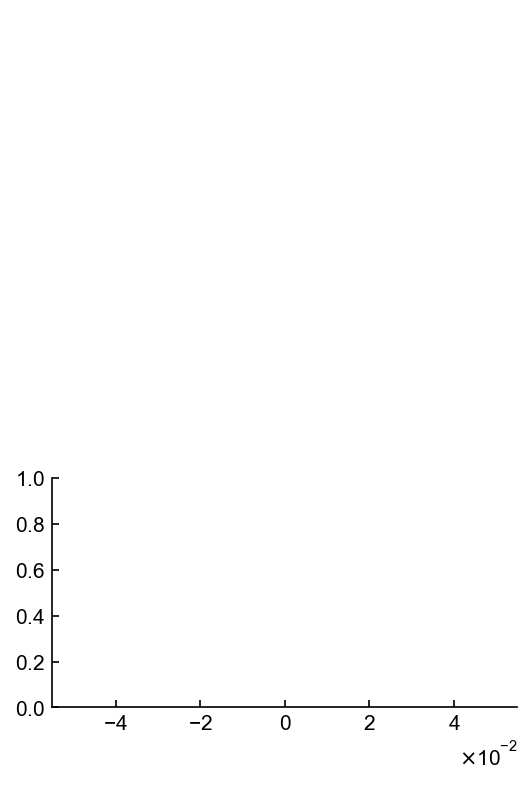

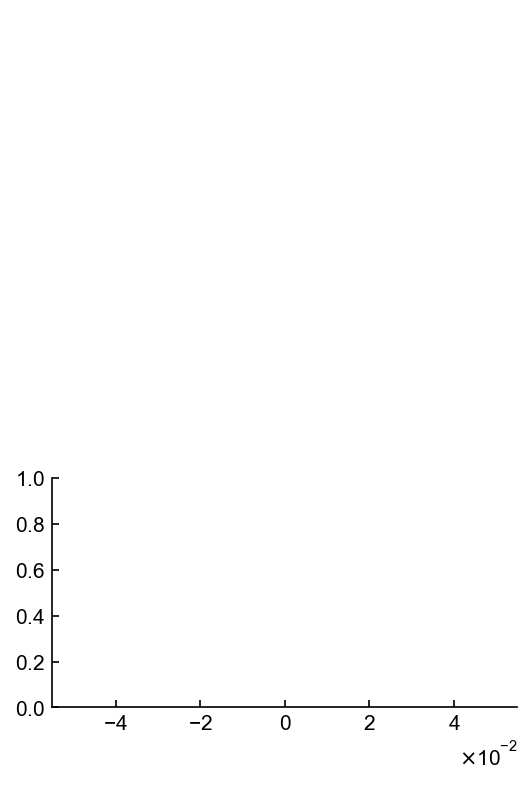

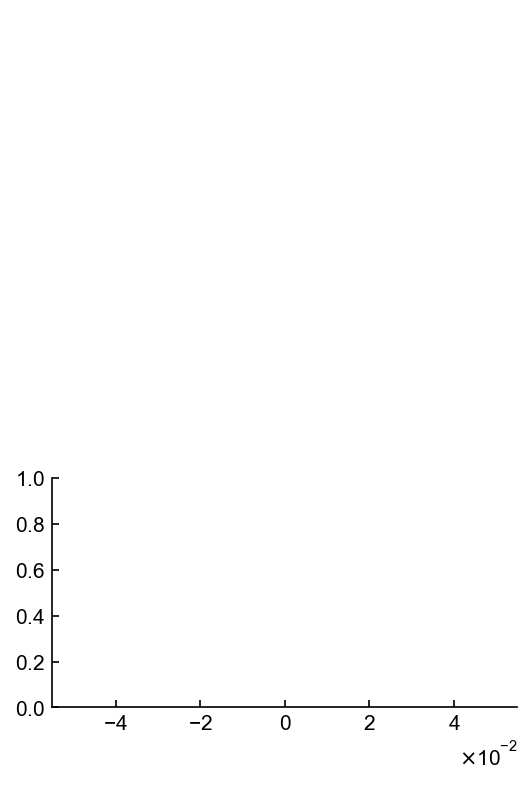

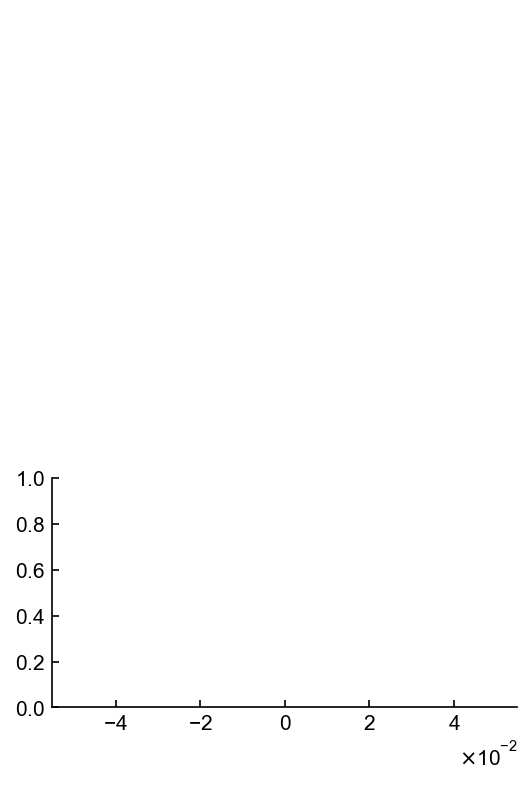

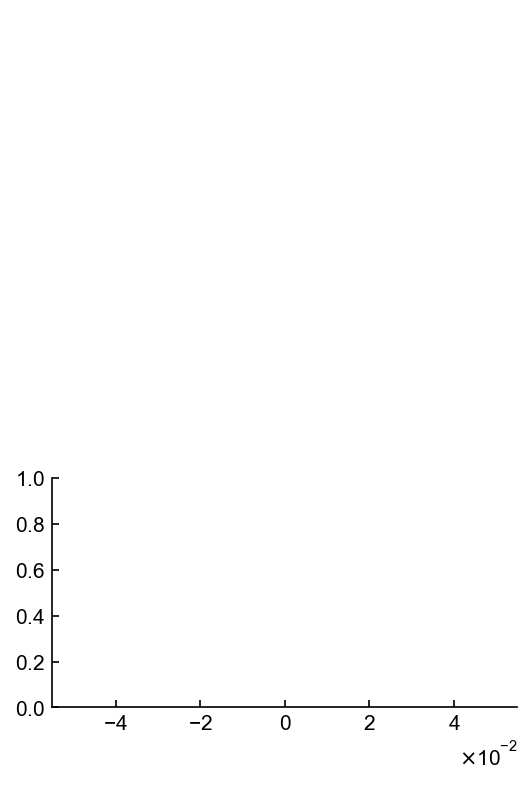

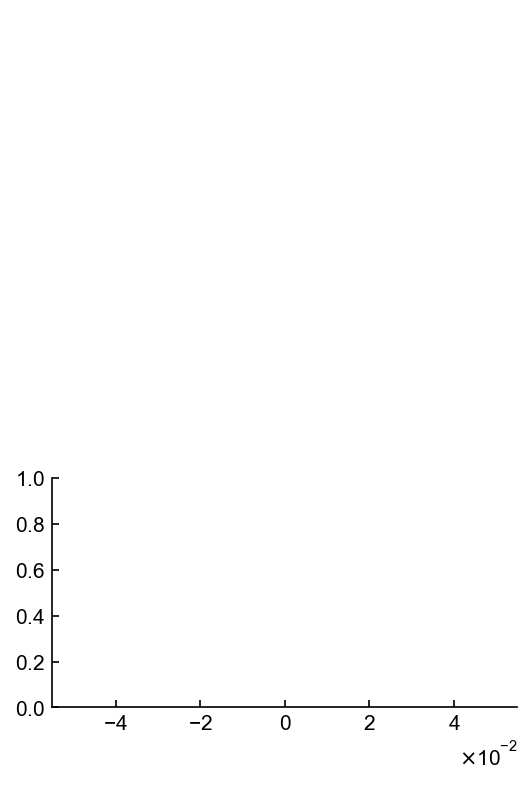

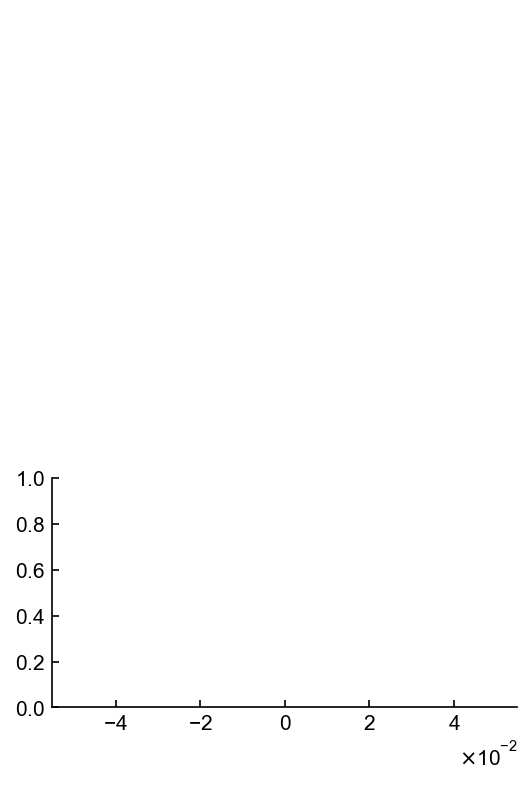

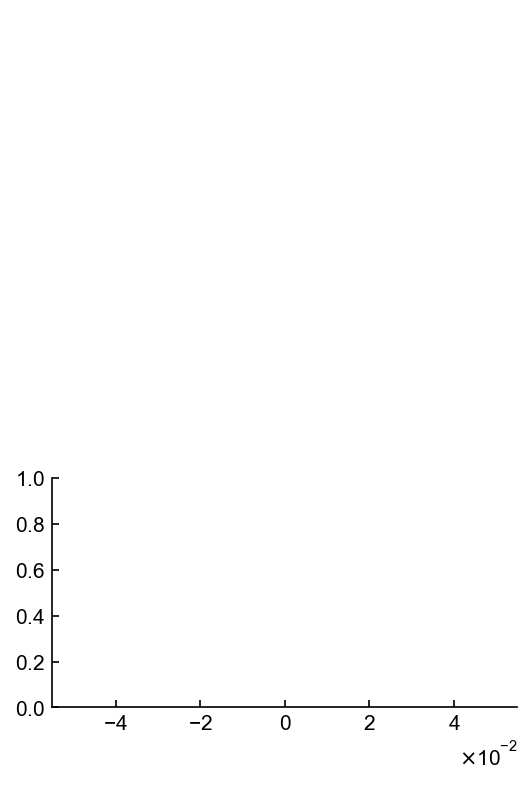

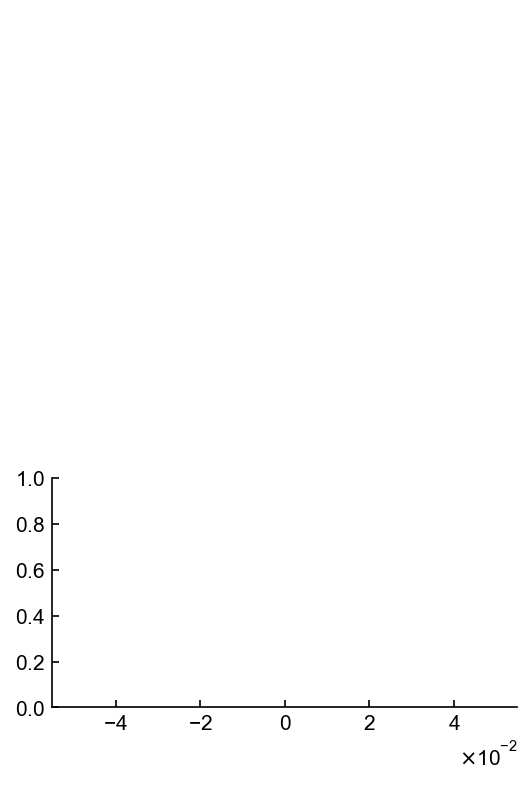

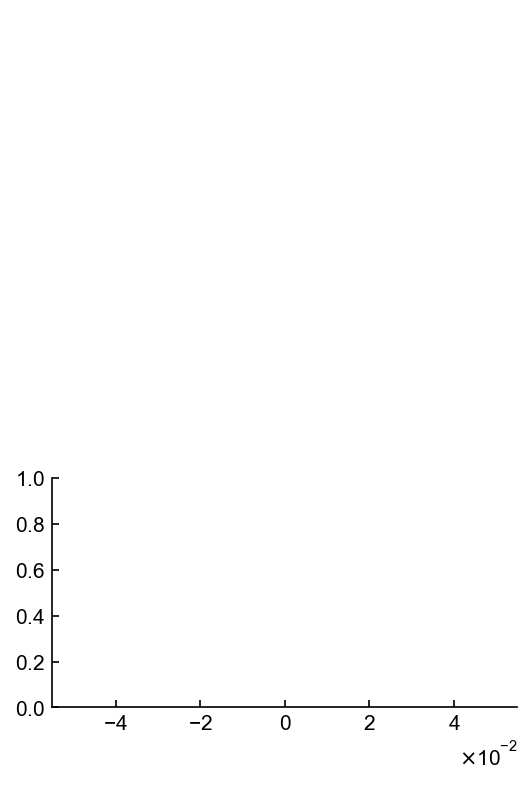

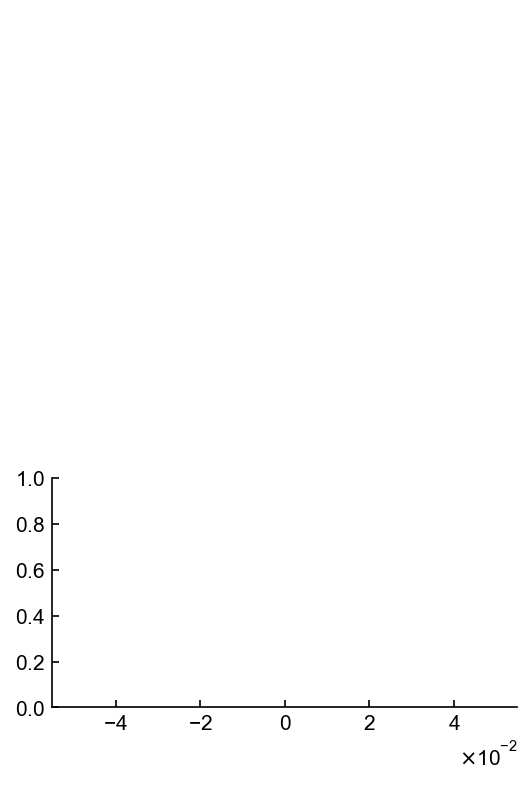

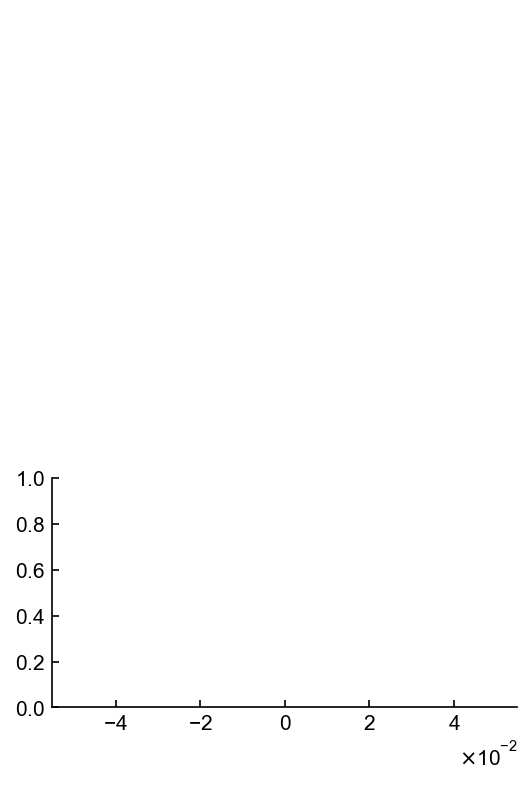

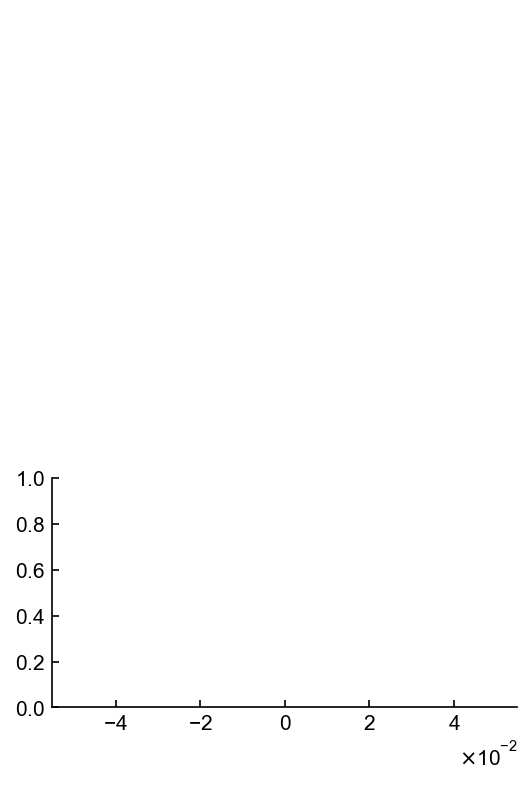

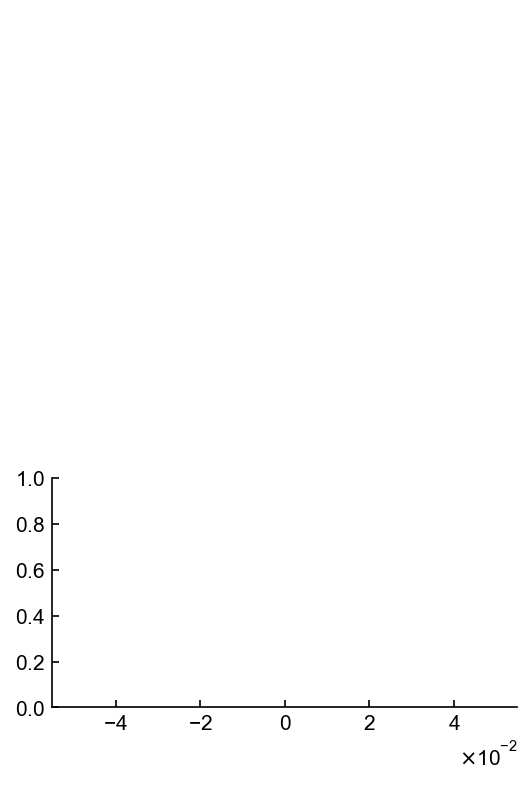

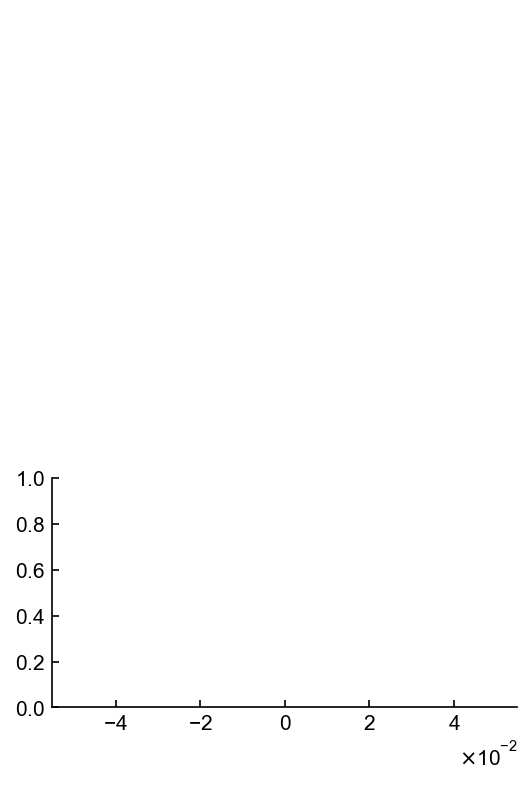

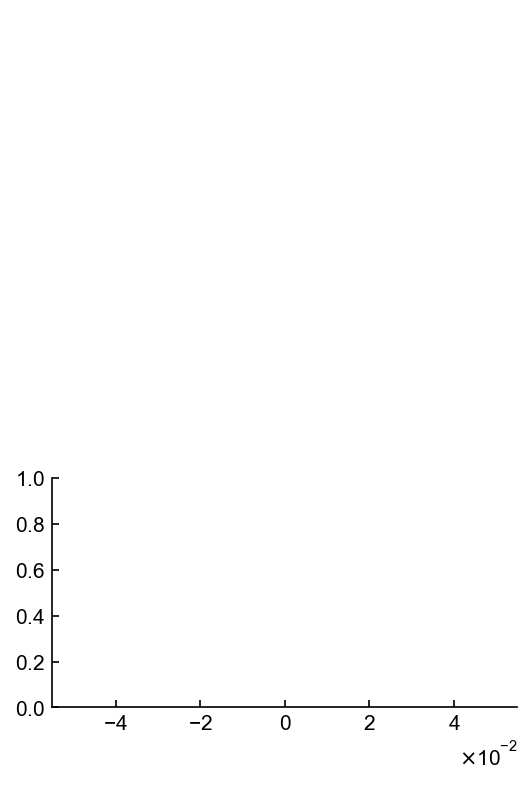

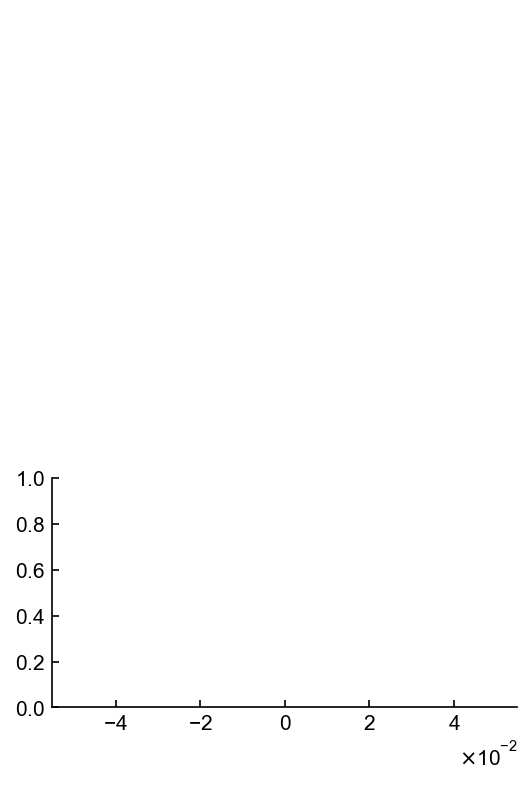

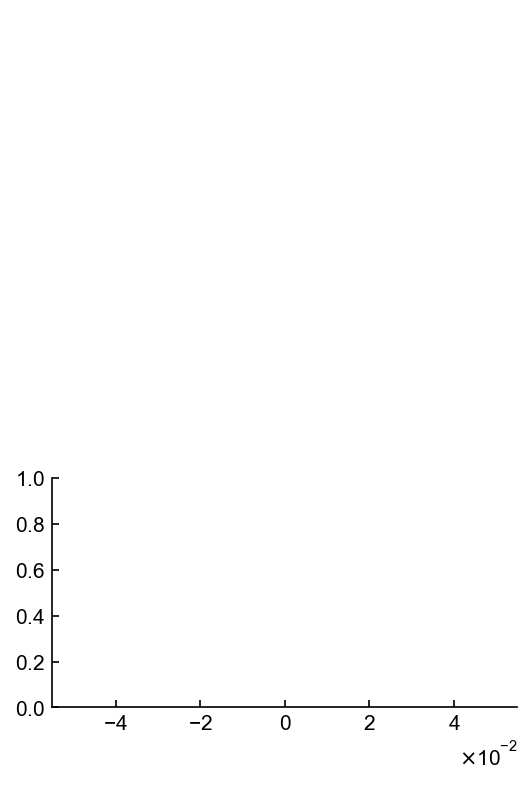

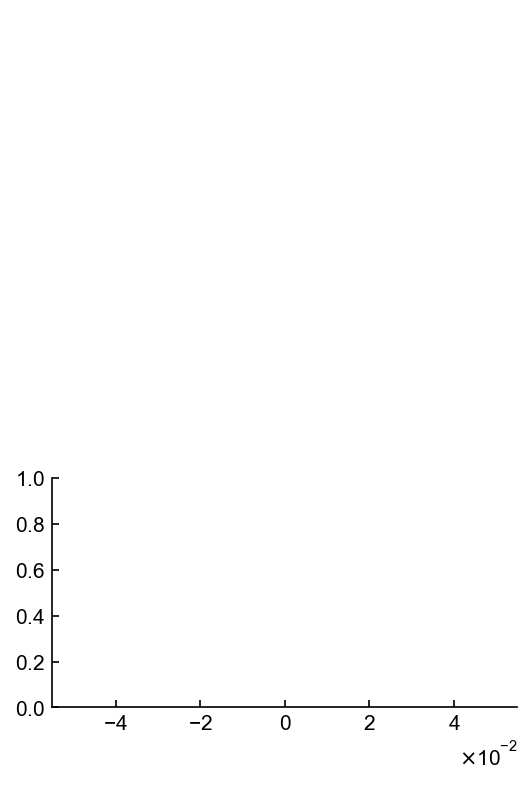

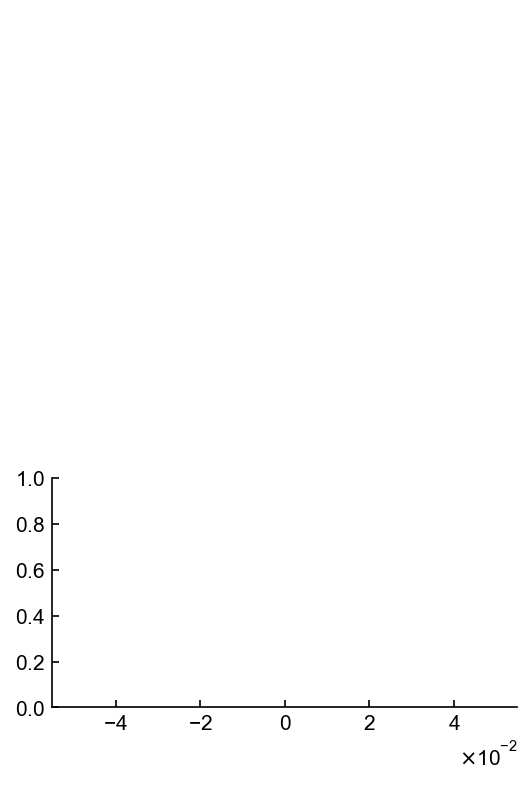

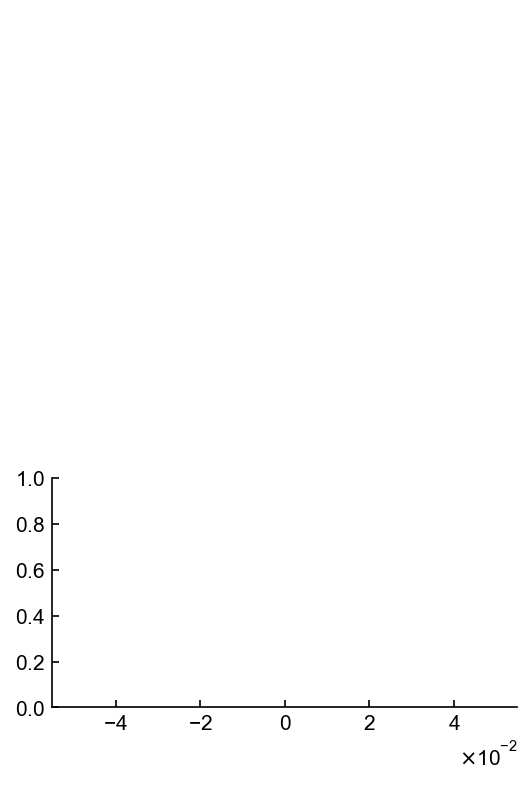

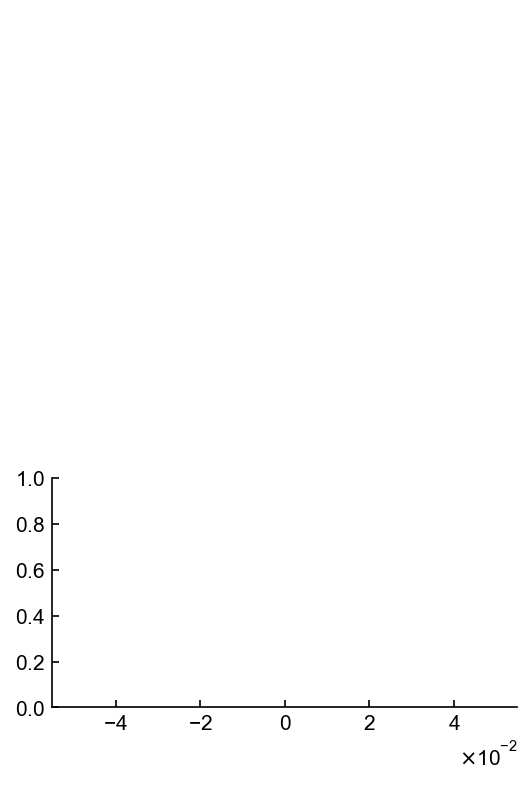

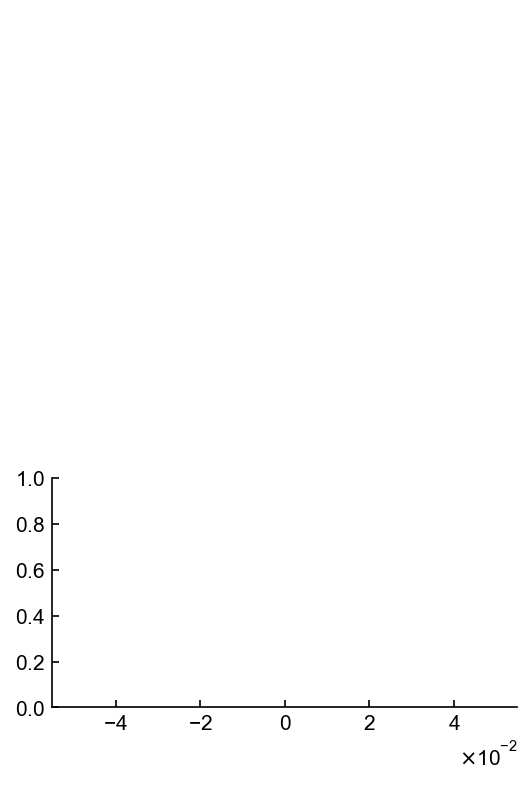

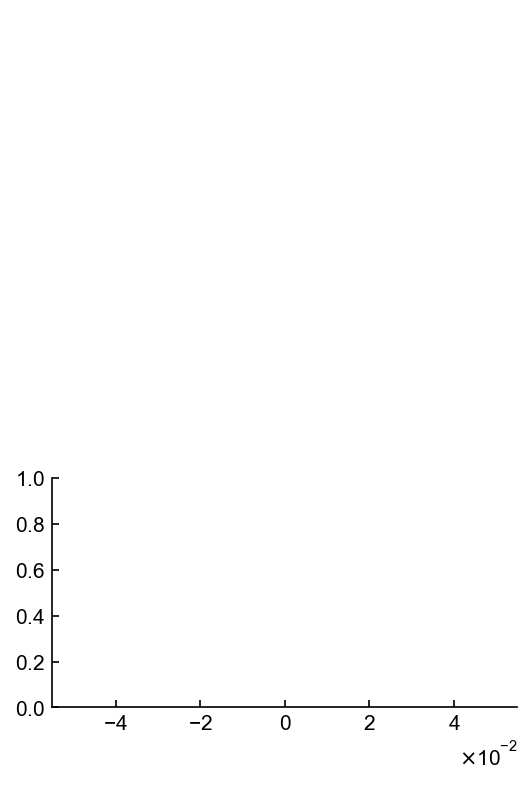

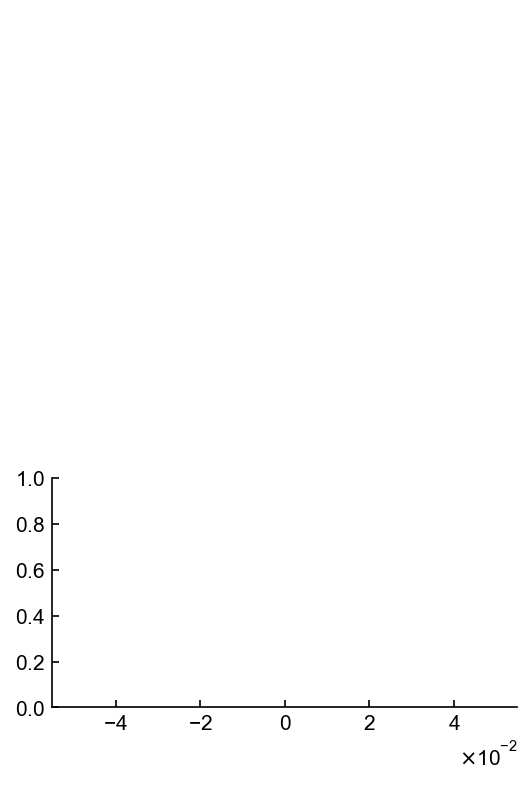

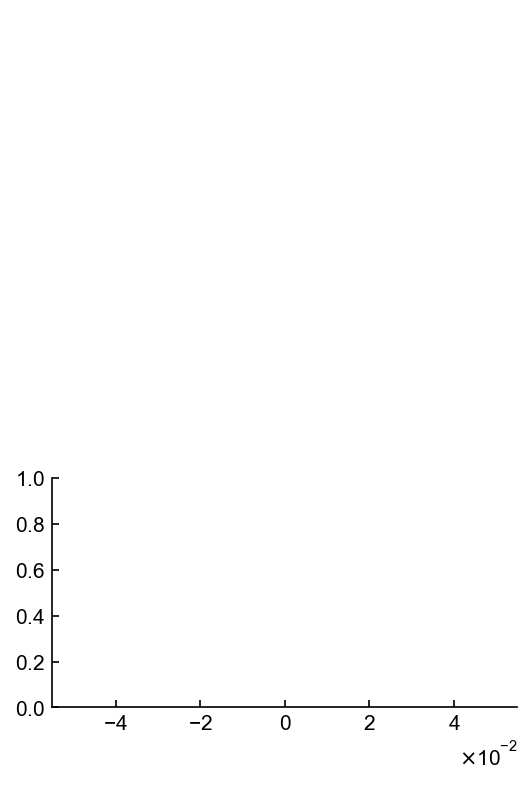

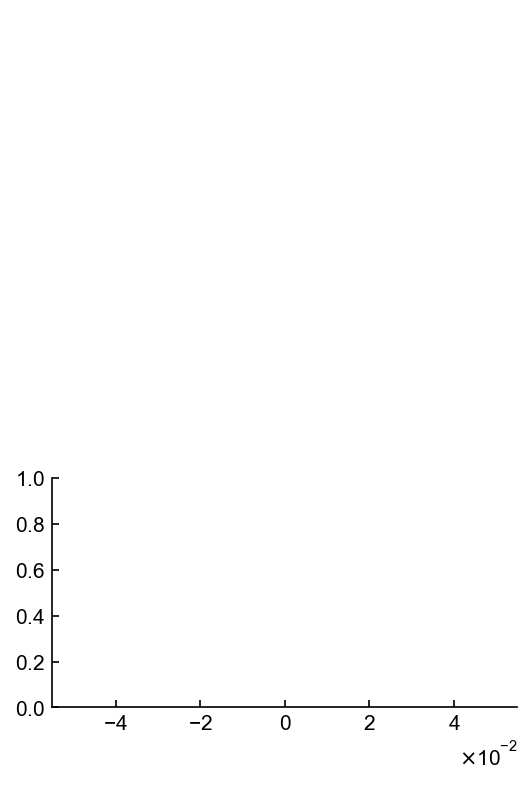

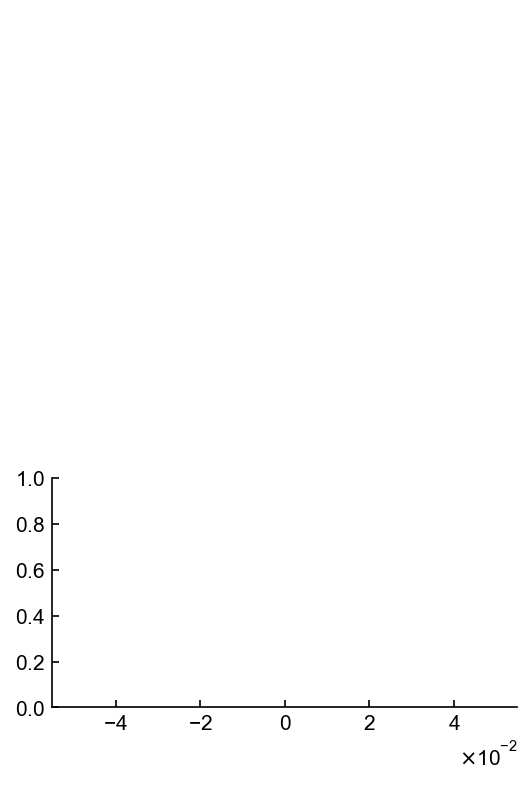

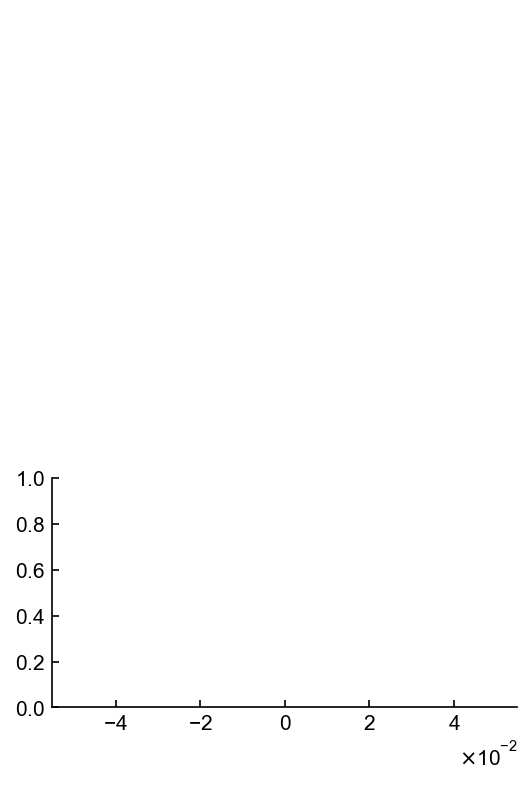

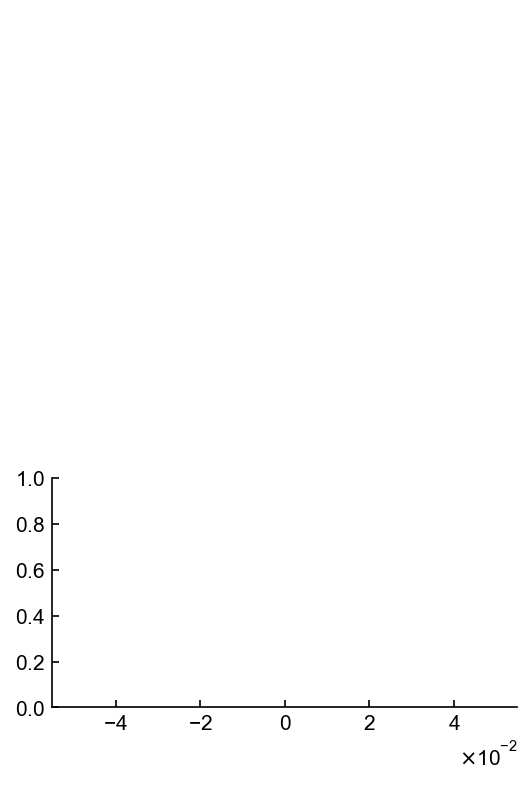

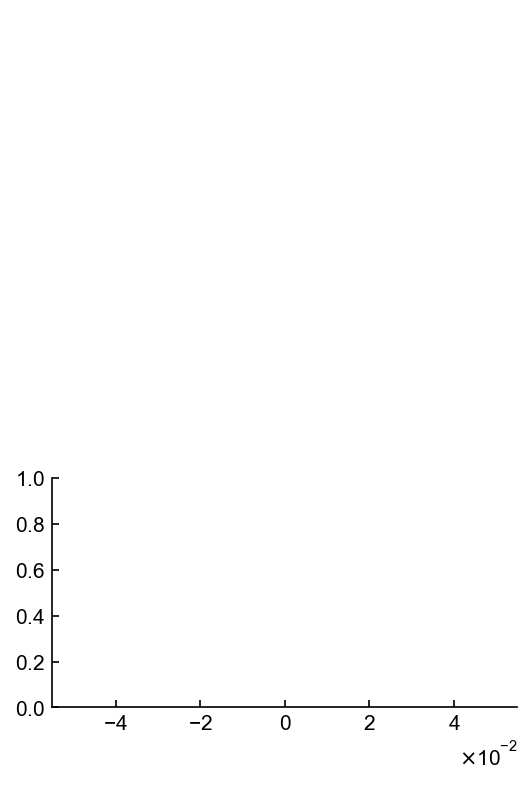

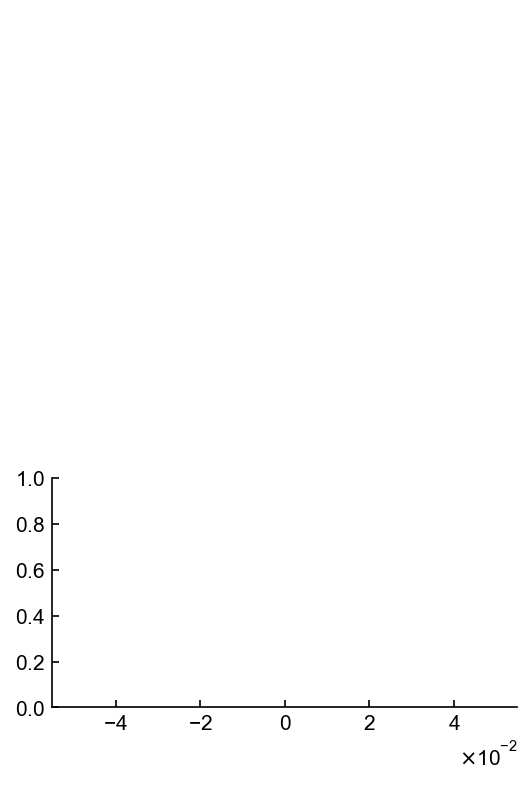

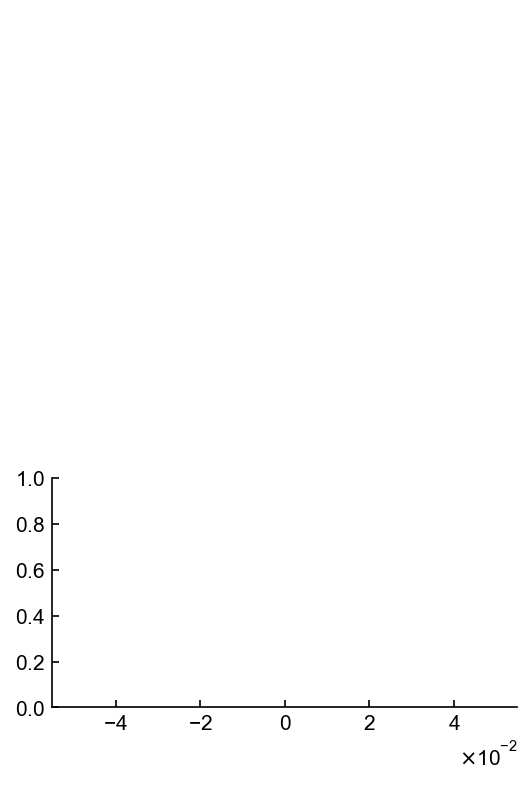

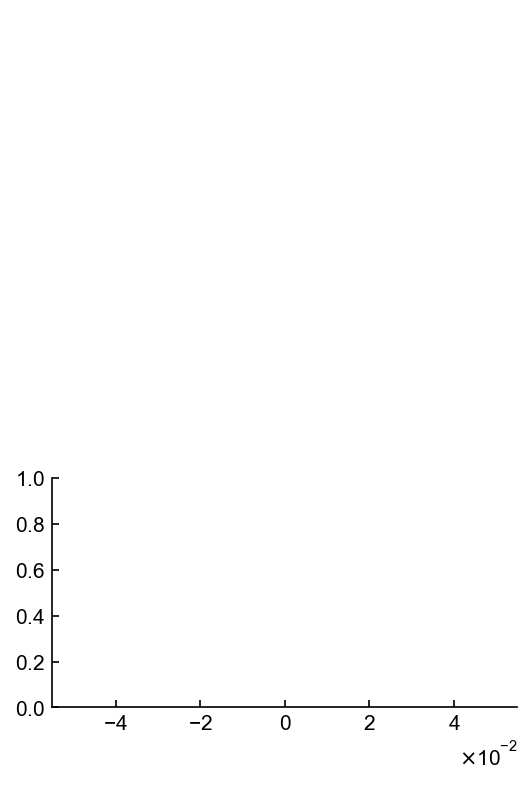

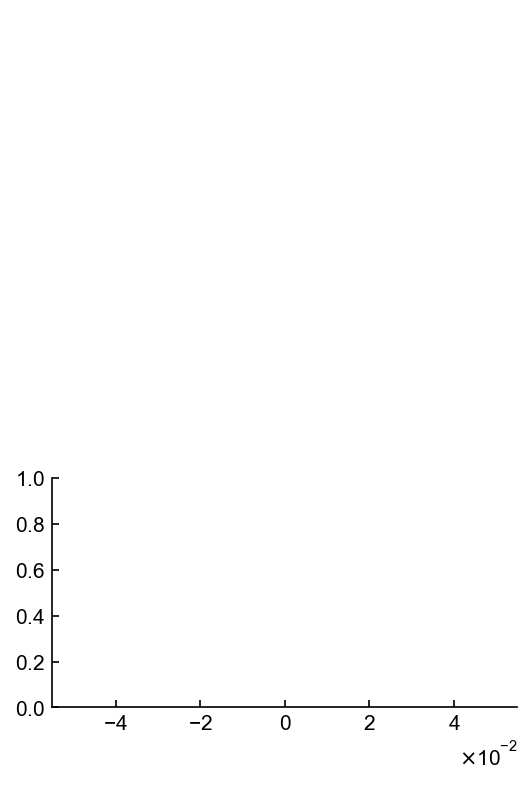

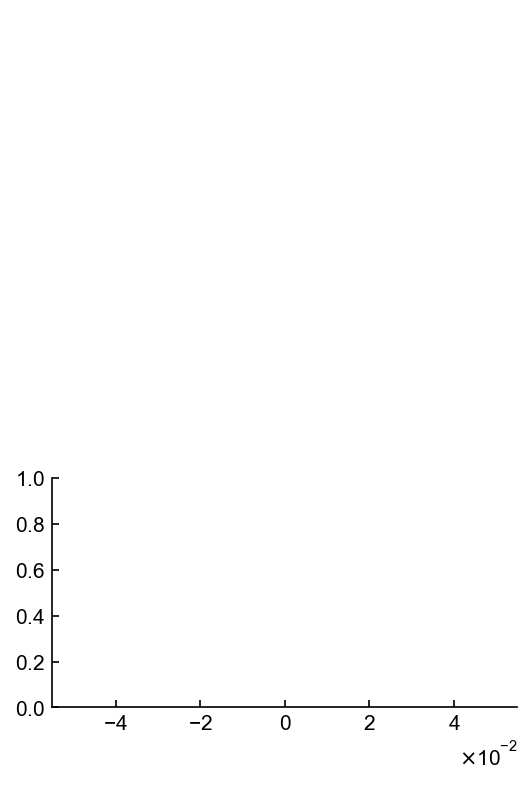

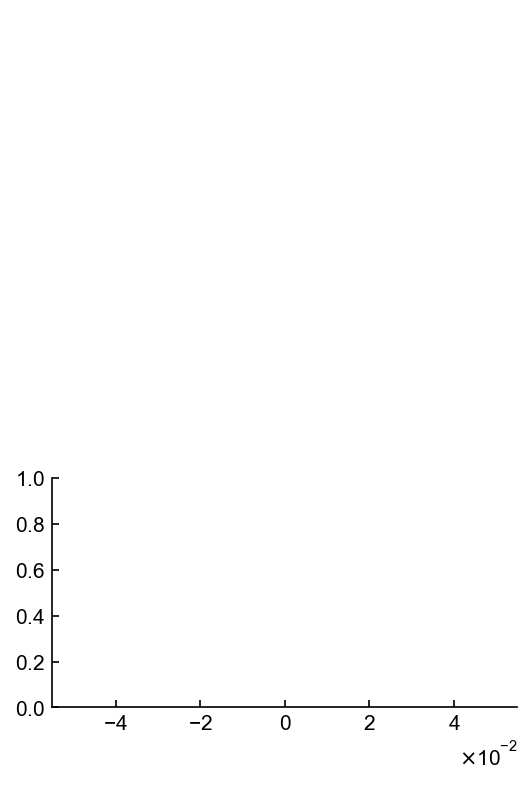

In [39]:
for session in M2_preexpert:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    for clust in clust_M2:
        visualizeClusterInternal(session_M2,clust,sessionname,'Preexpert')
        FRmod = visualizeClusterInternal(session_M2,clust,sessionname,'Preexpert')[-2]
        peak_time = visualizeClusterInternal(session_M2,clust,sessionname,'Preexpert')[-1]
        if FRmod>=M2_FRmod_baseline_median:
            M2_peaklatency_preexpert.append(peak_time)

In [40]:
for session in M2_postearly:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    for clust in clust_M2:
        visualizeClusterInternal(session_M2,clust,sessionname,'Postearly')
        FRmod = visualizeClusterInternal(session_M2,clust,sessionname,'Postearly')[-2]
        peak_time = visualizeClusterInternal(session_M2,clust,sessionname,'Postearly')[-1]
        if FRmod>=M2_FRmod_baseline_median:
            M2_peaklatency_postearly.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

In [41]:
for session in M2_postlate:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    for clust in clust_M2:
        visualizeClusterInternal(session_M2,clust,sessionname,'Postlate')
        FRmod = visualizeClusterInternal(session_M2,clust,sessionname,'Postlate')[-2]
        peak_time = visualizeClusterInternal(session_M2,clust,sessionname,'Postlate')[-1]
        if FRmod>=M2_FRmod_baseline_median:
            M2_peaklatency_postlate.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

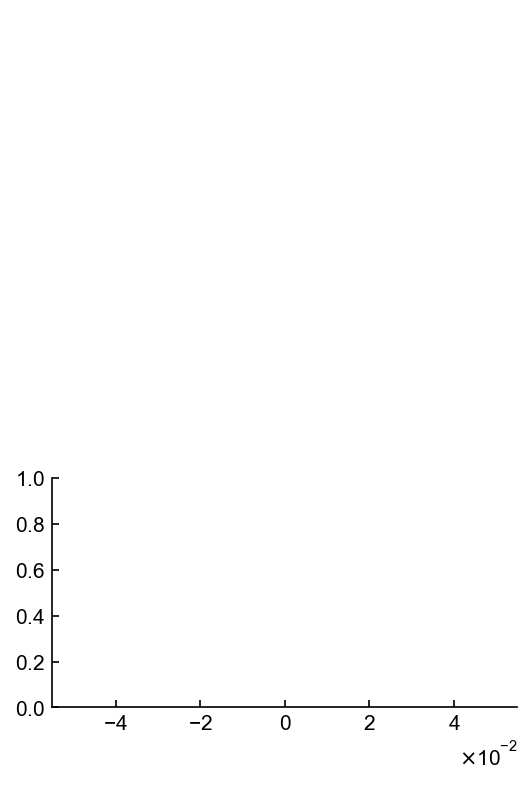

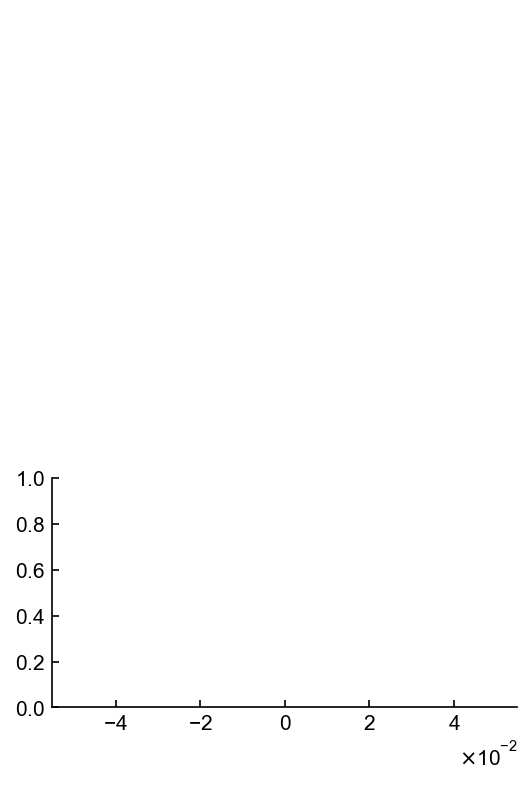

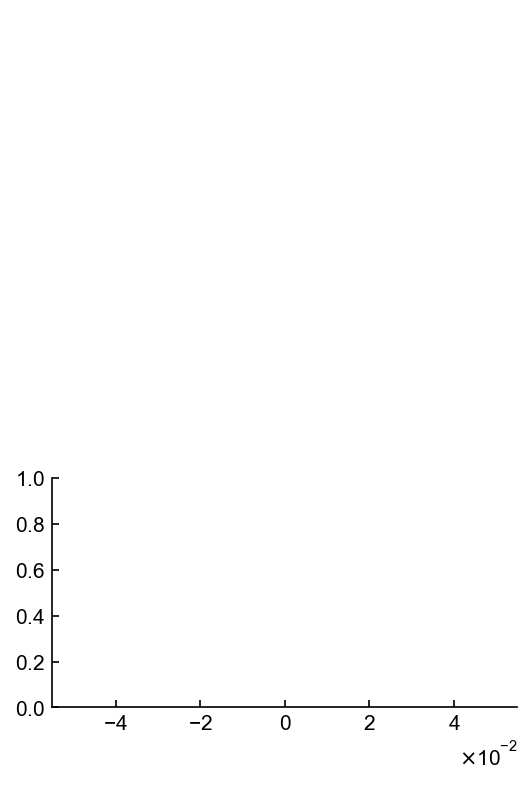

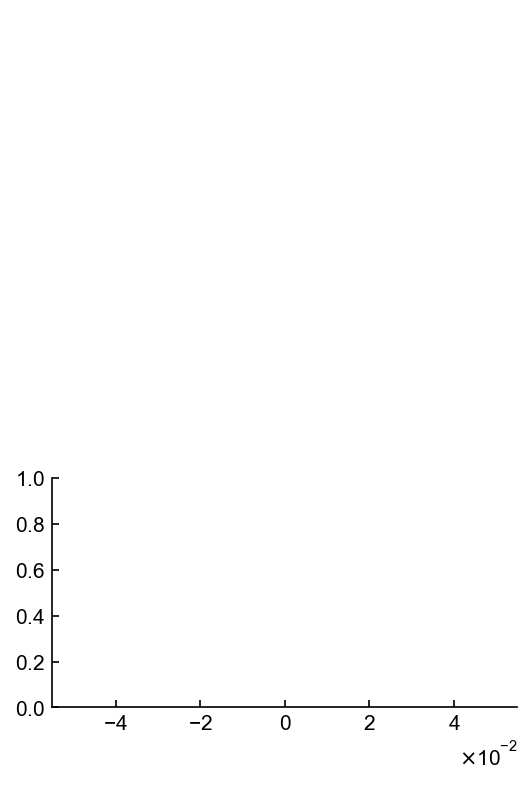

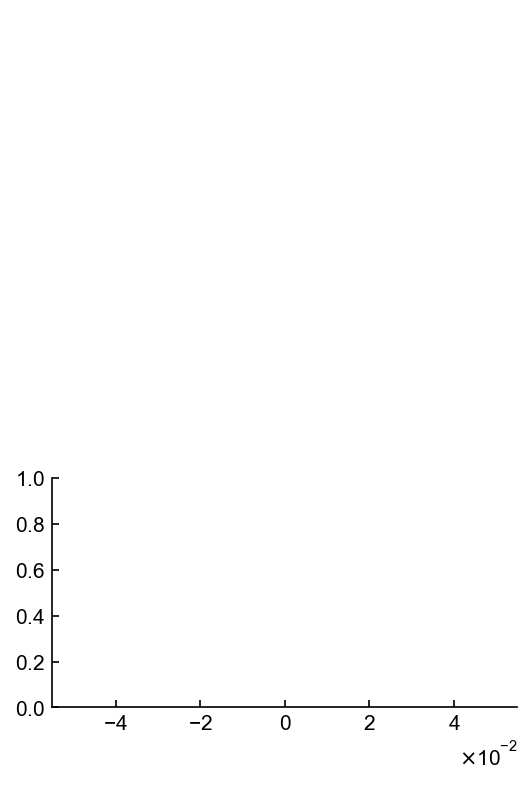

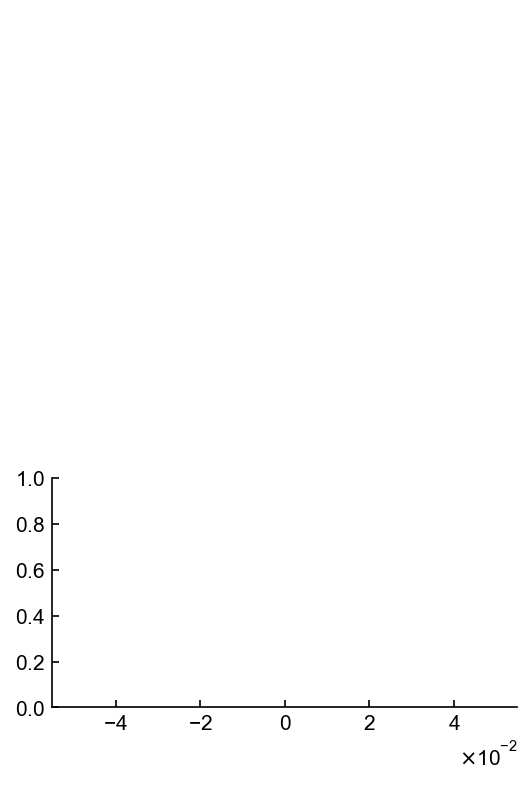

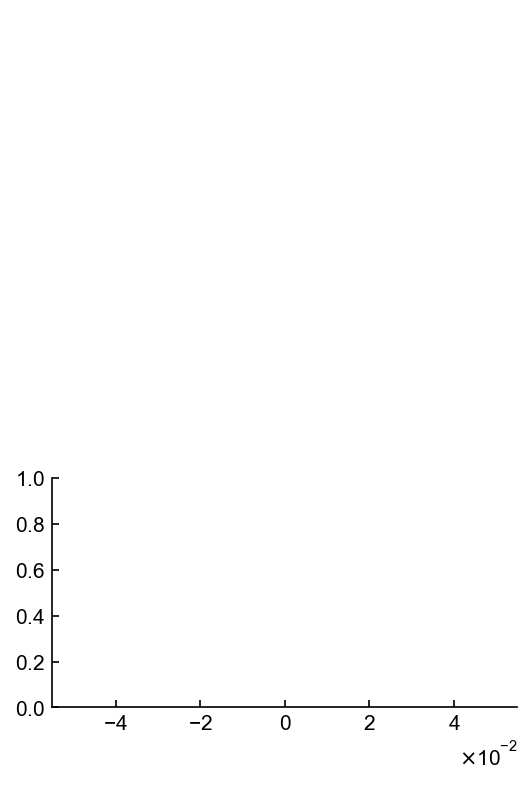

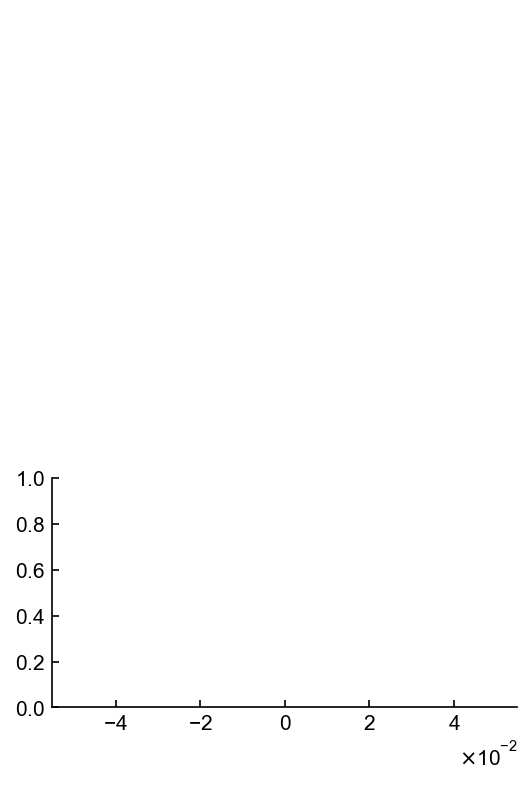

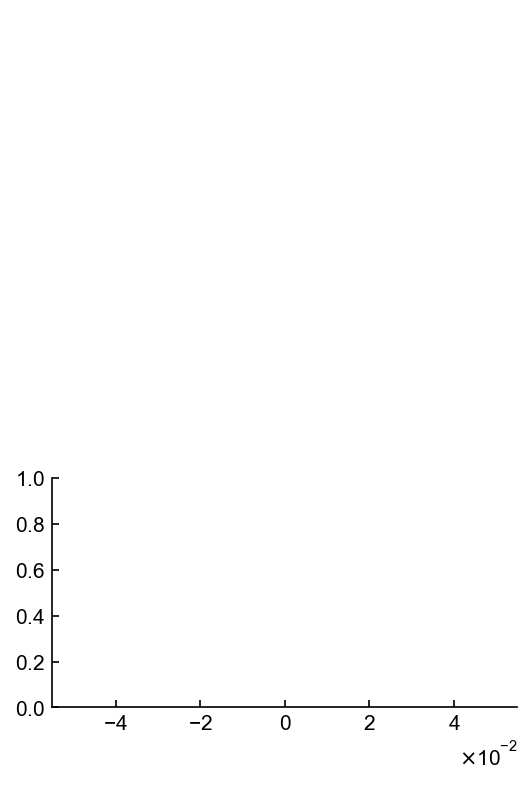

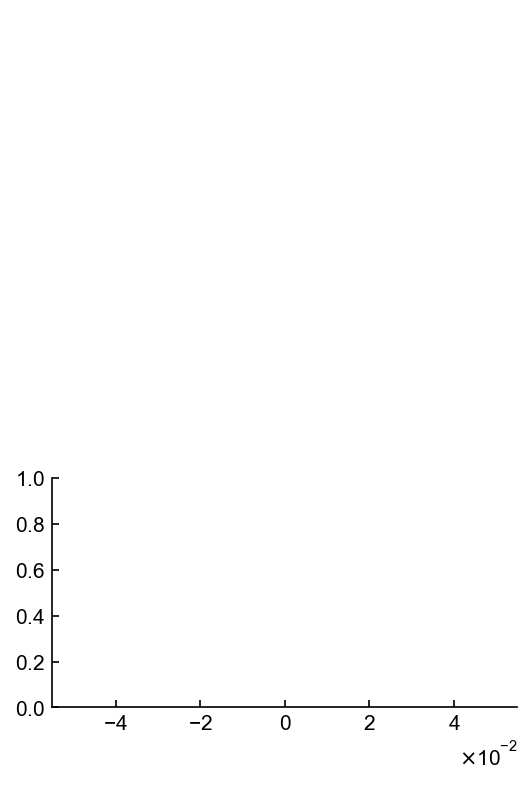

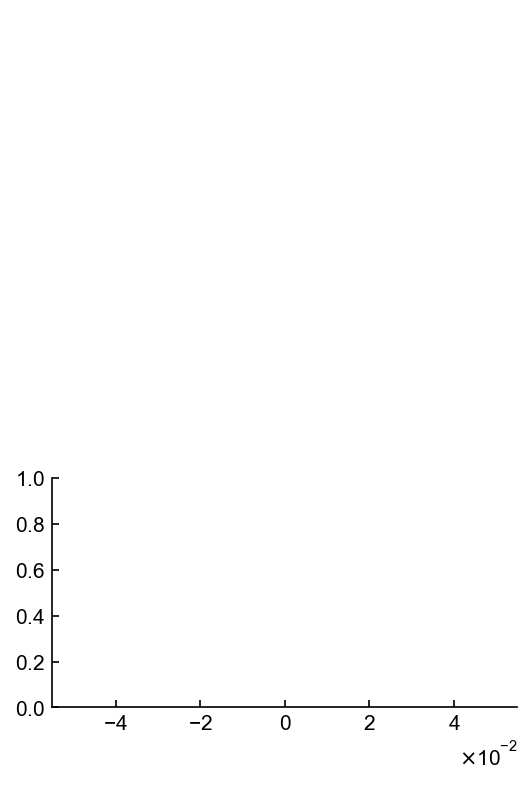

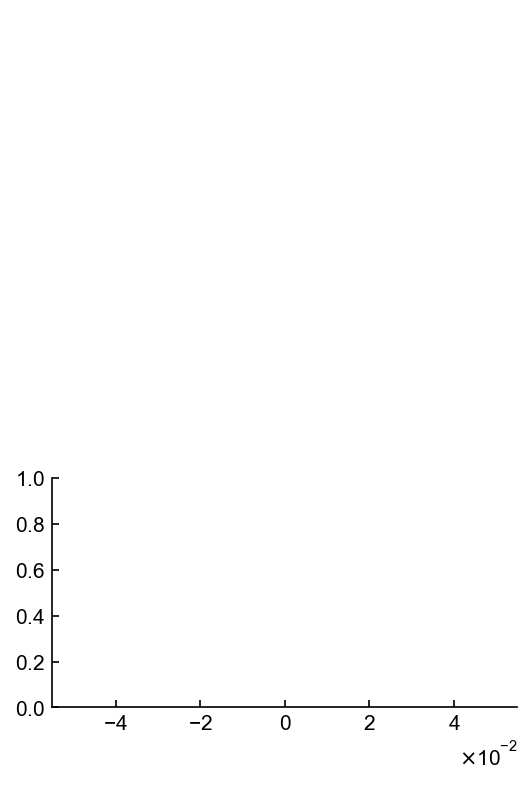

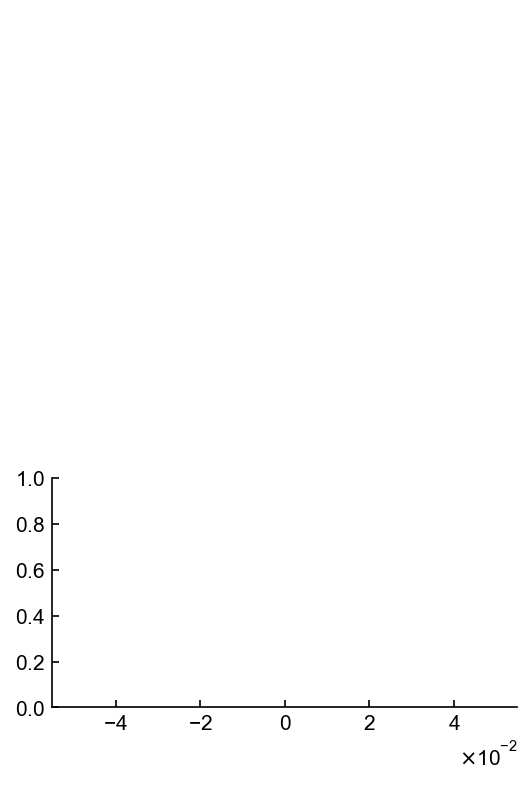

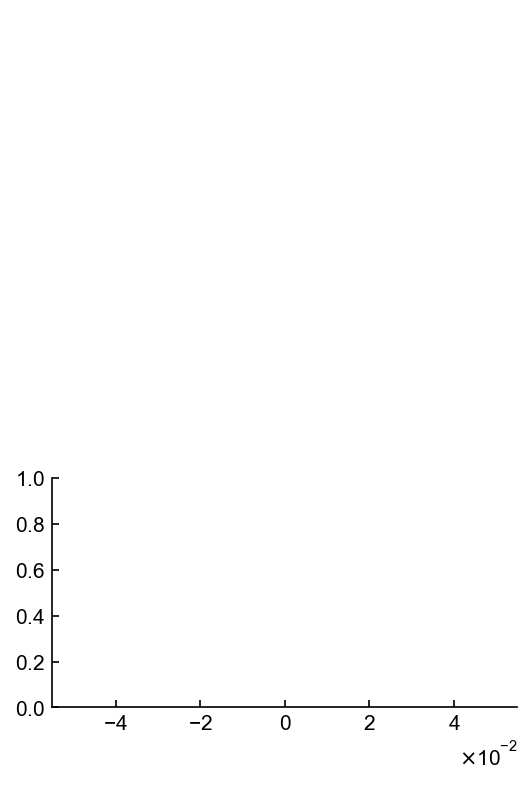

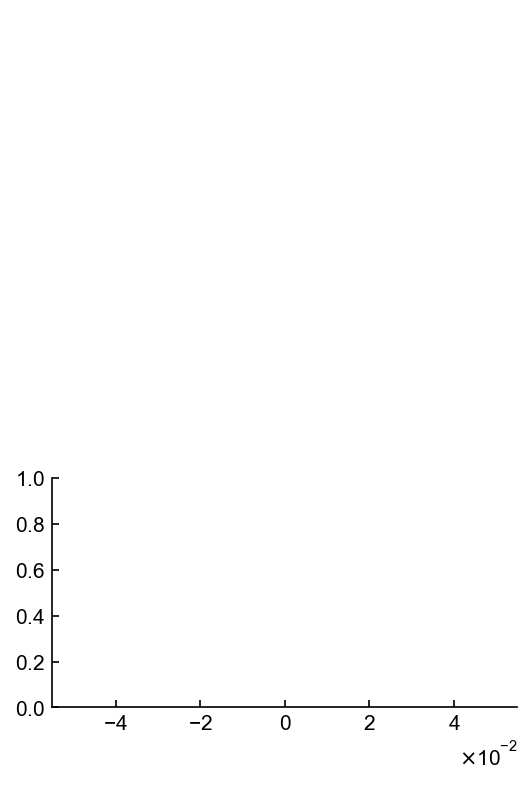

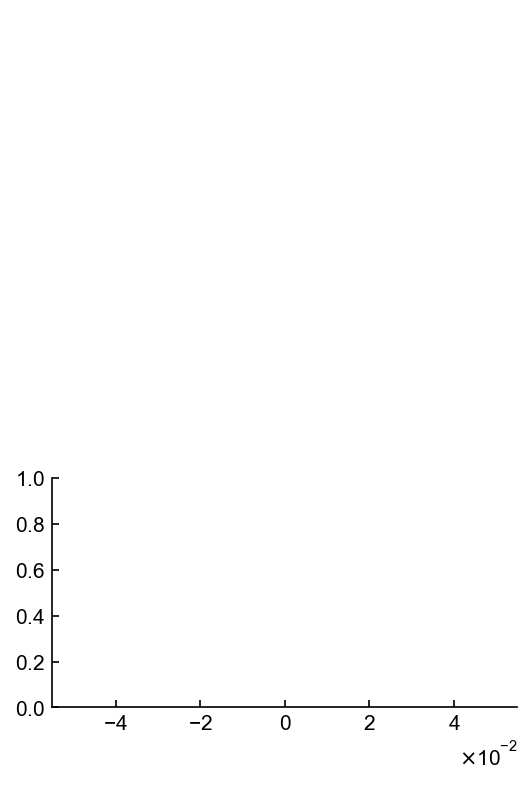

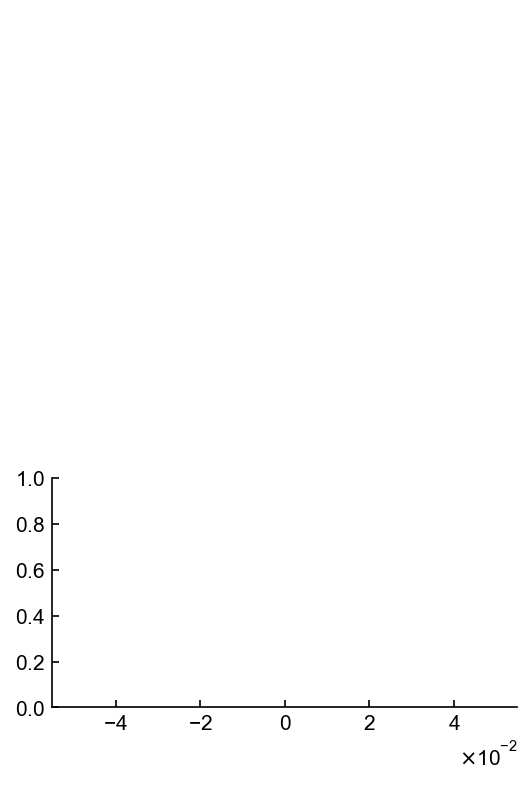

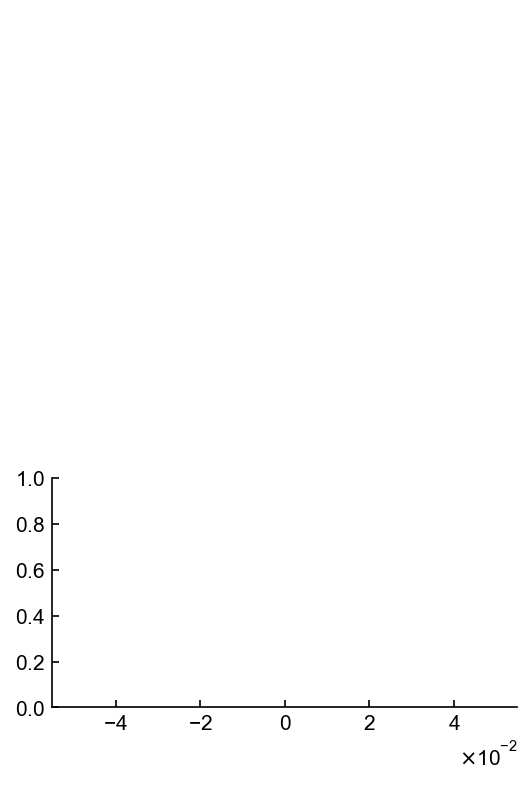

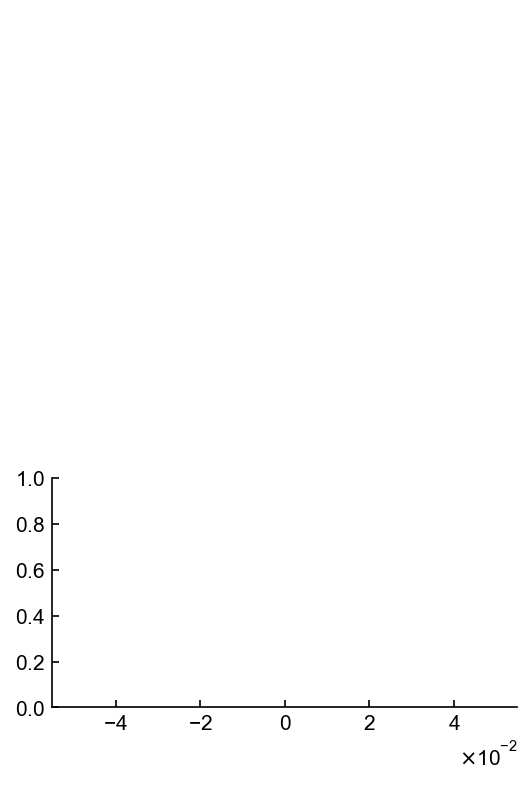

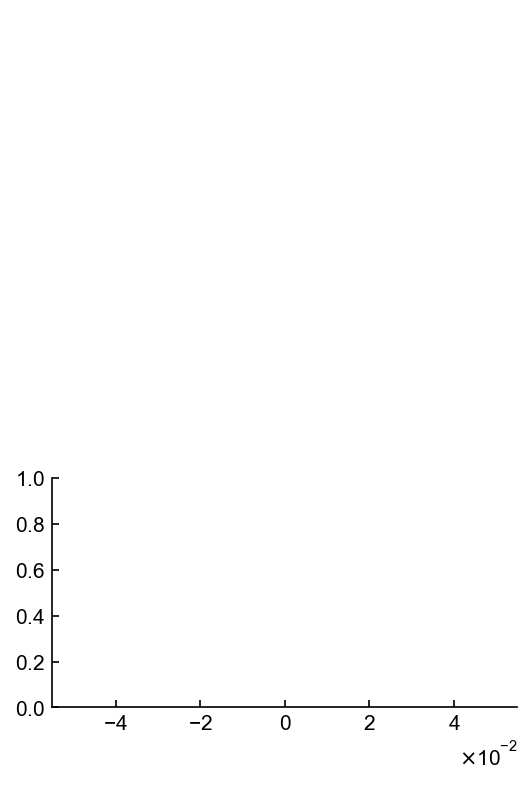

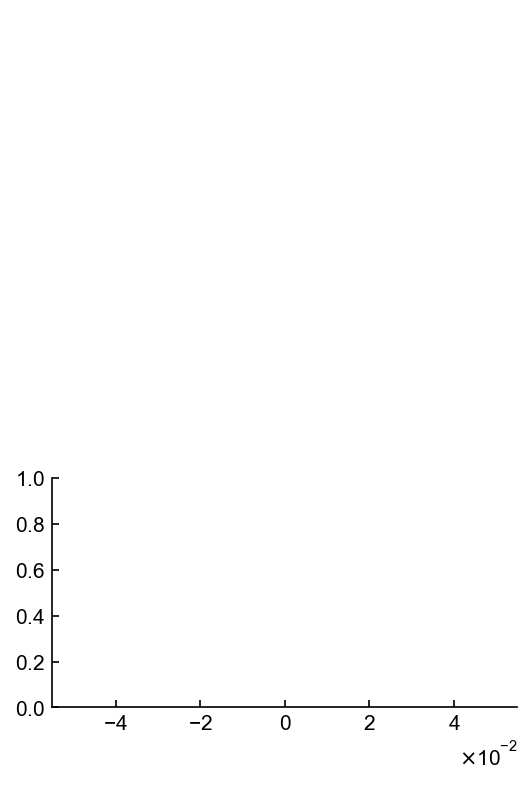

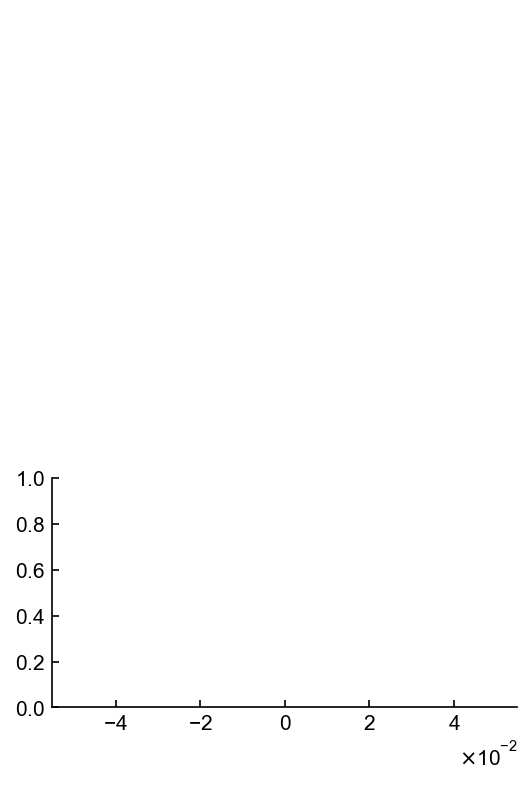

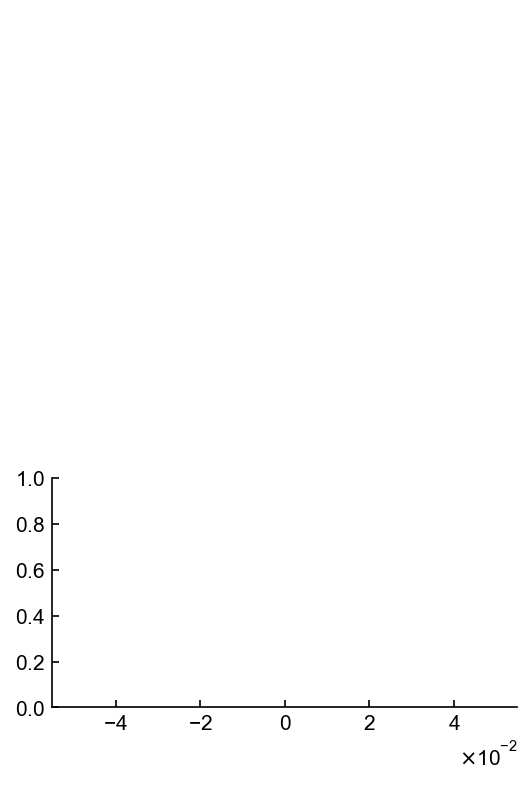

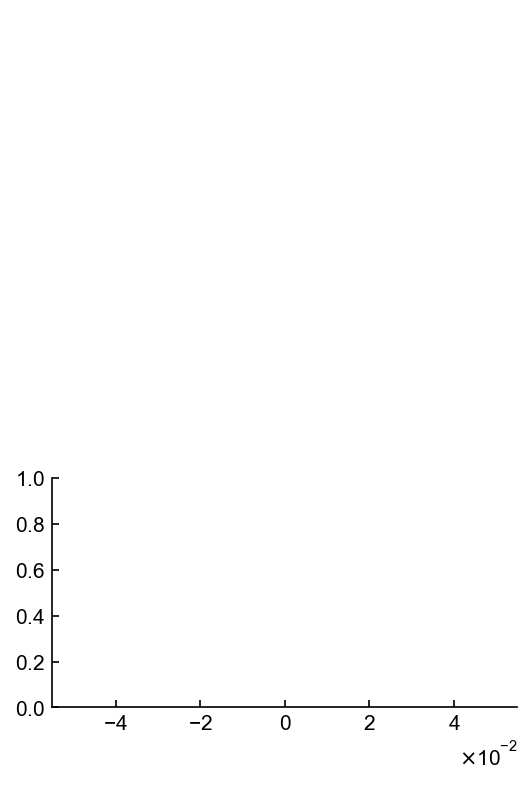

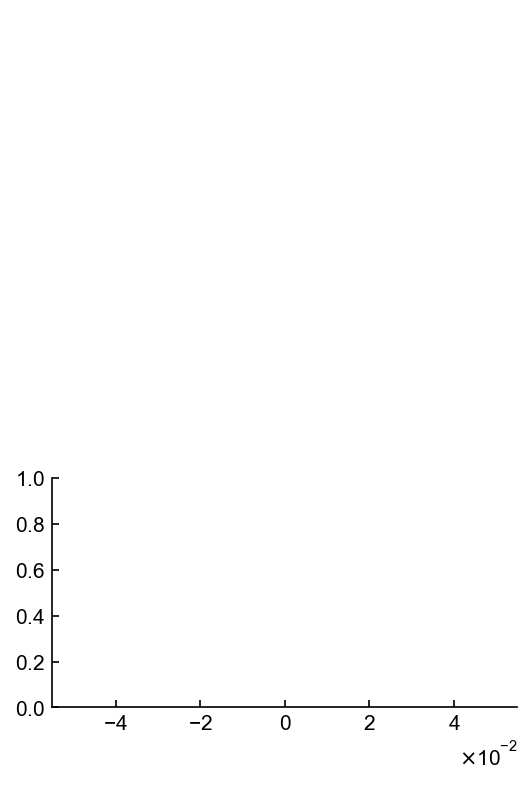

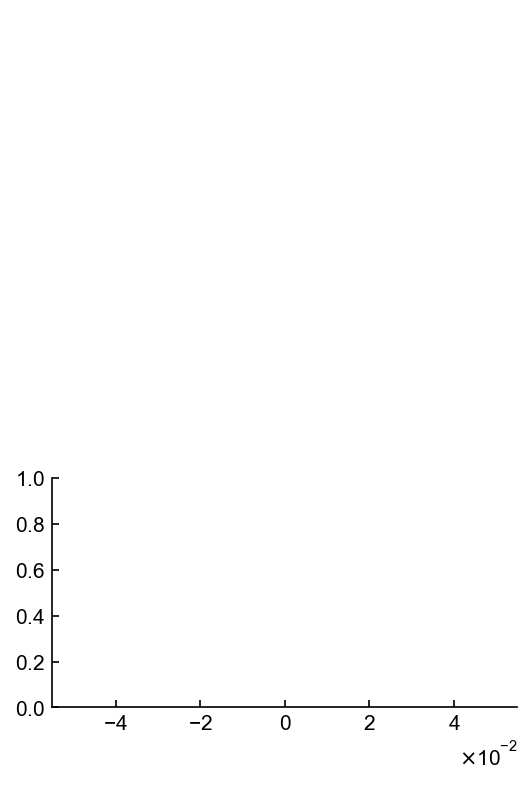

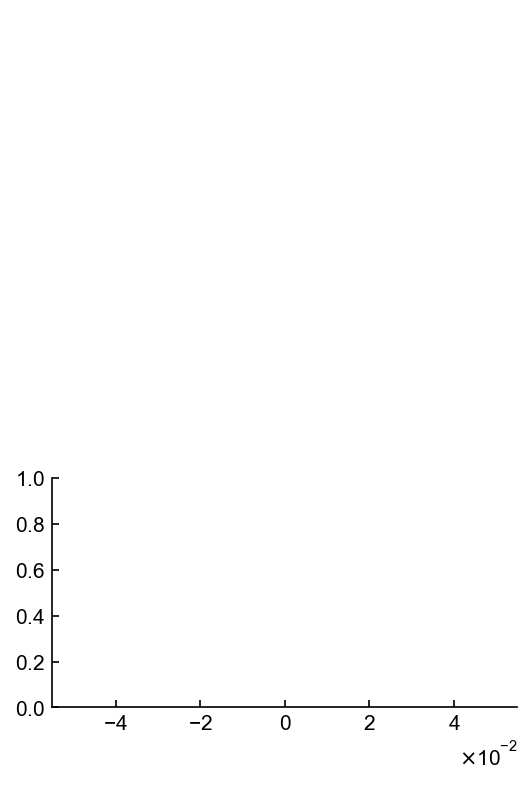

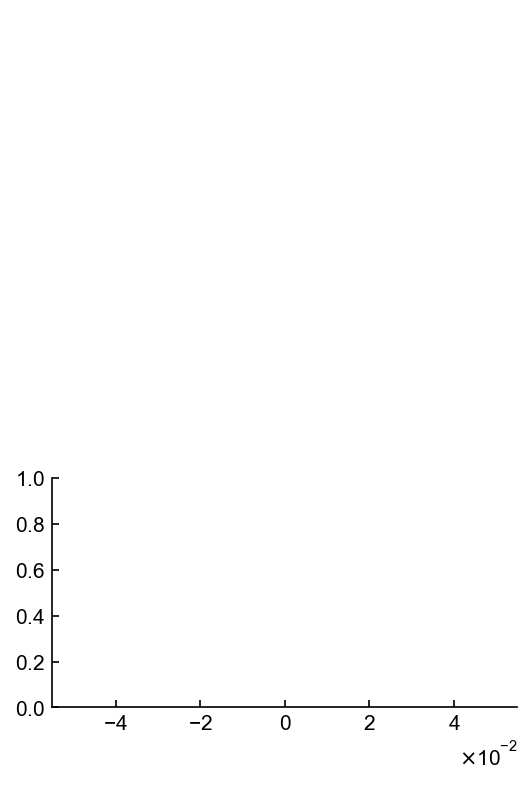

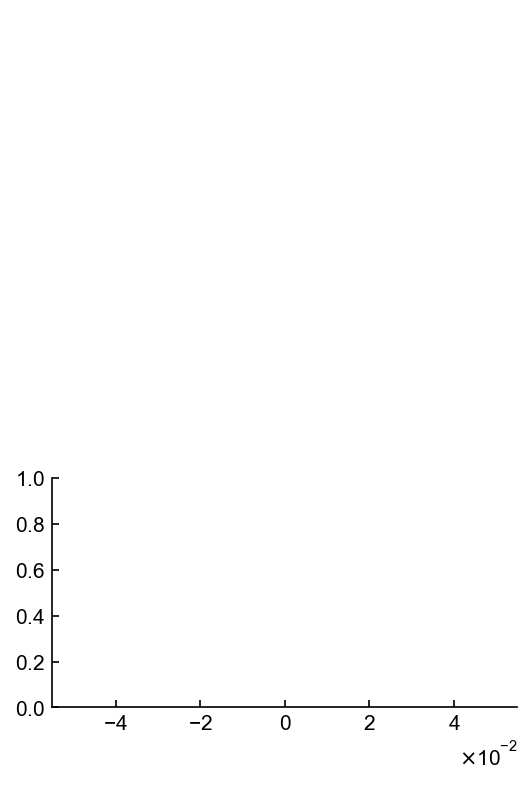

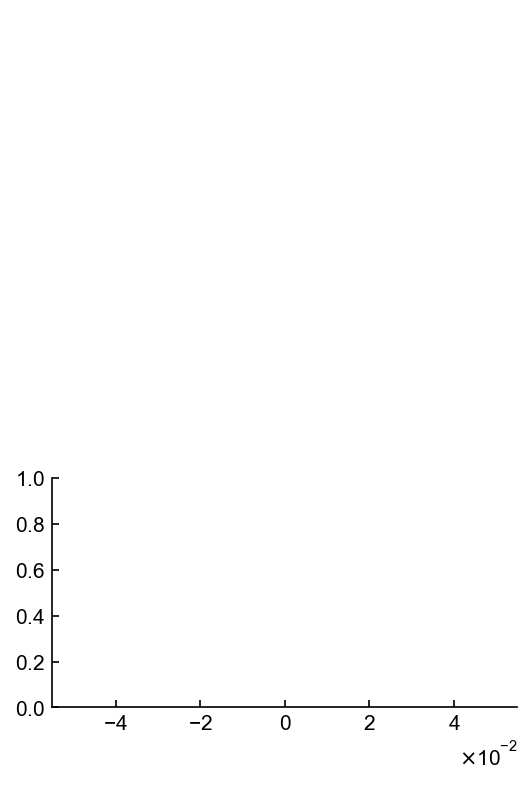

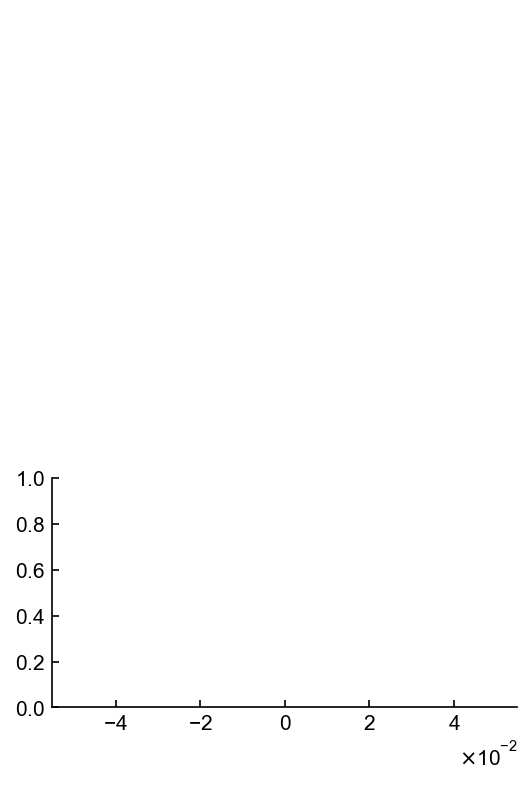

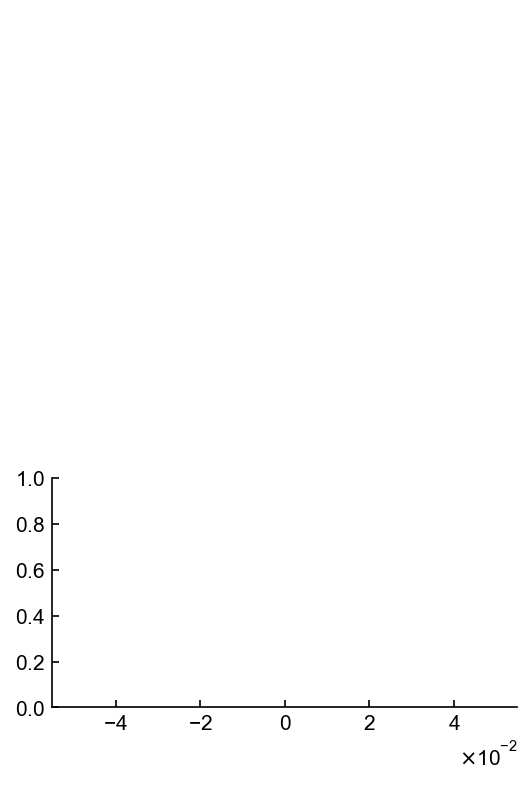

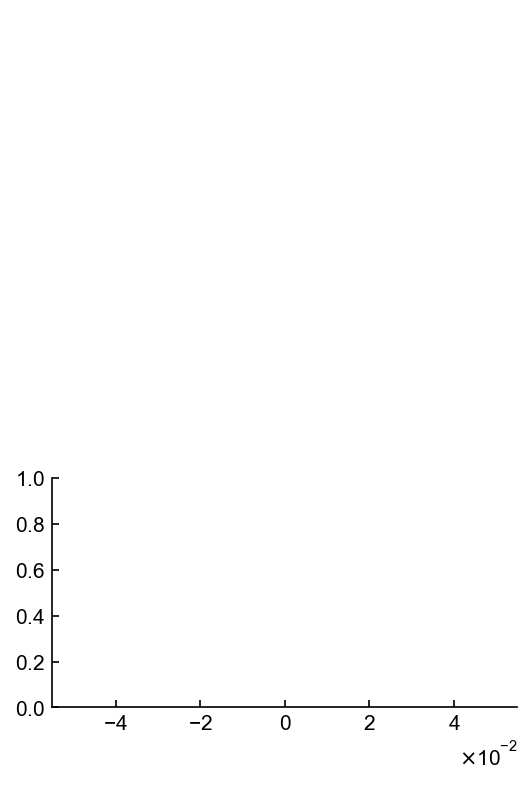

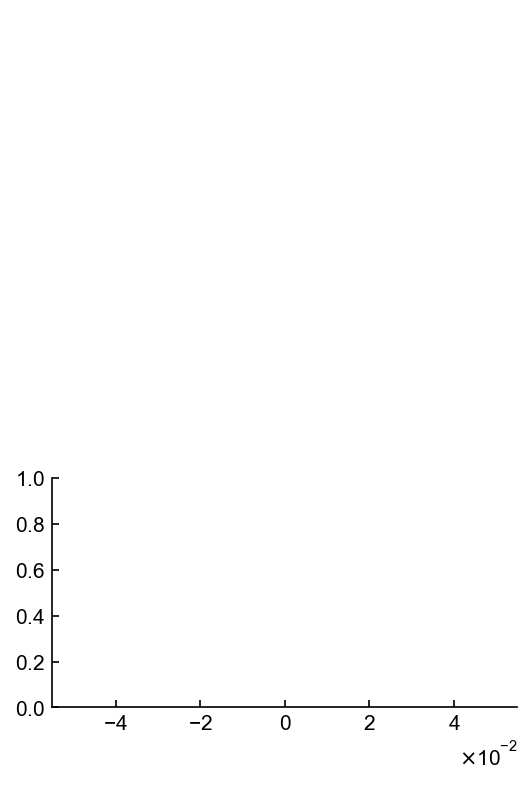

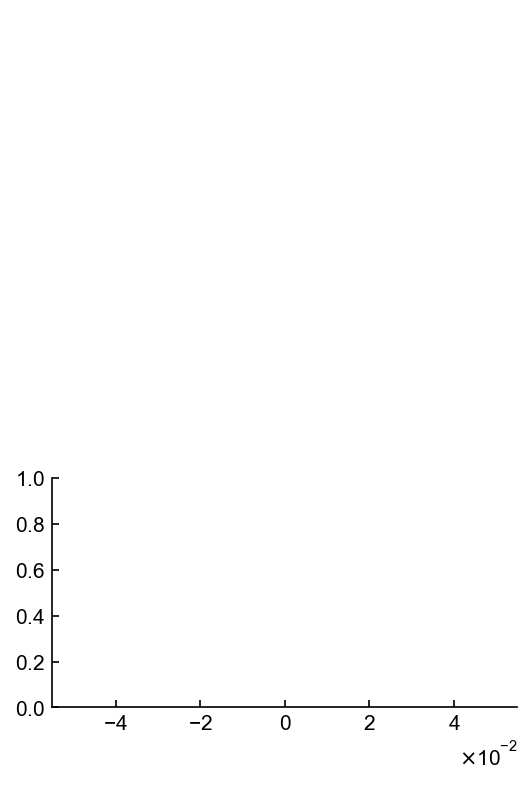

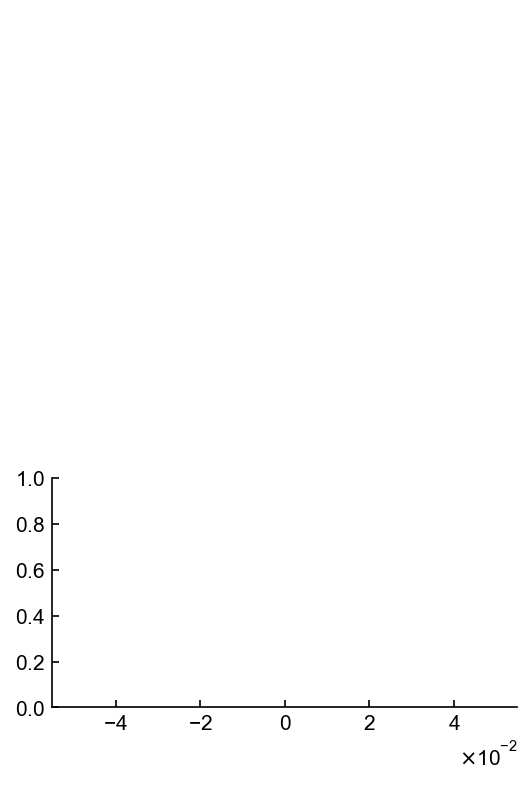

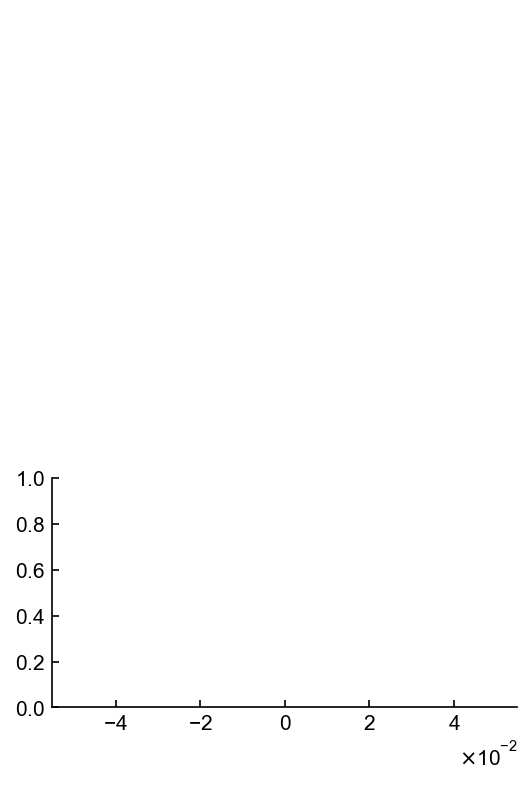

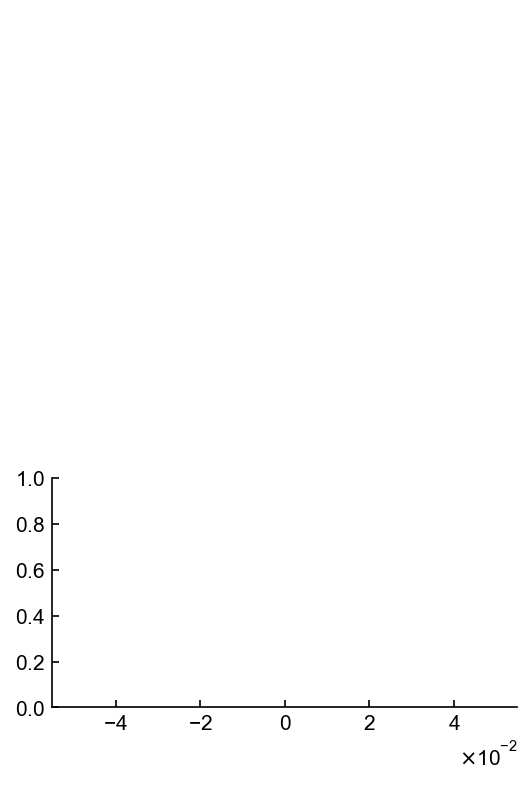

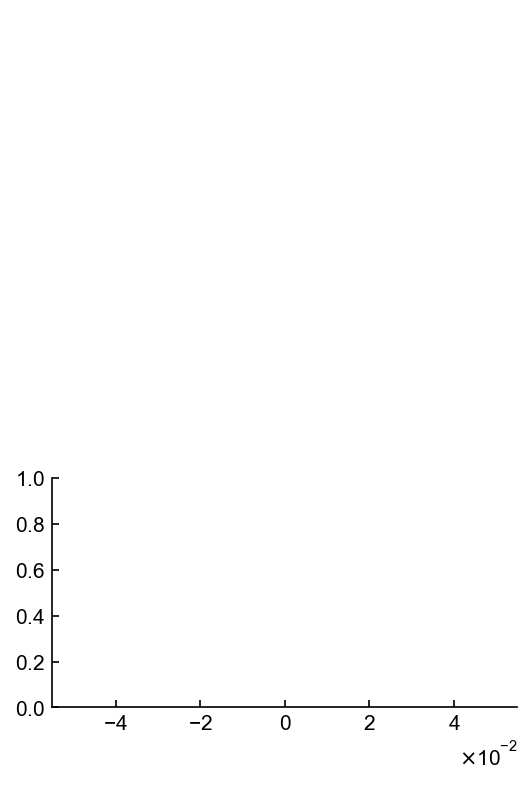

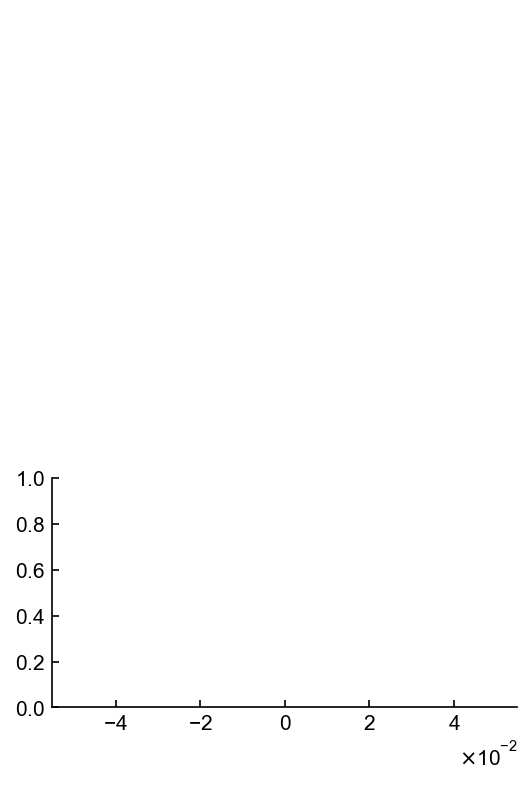

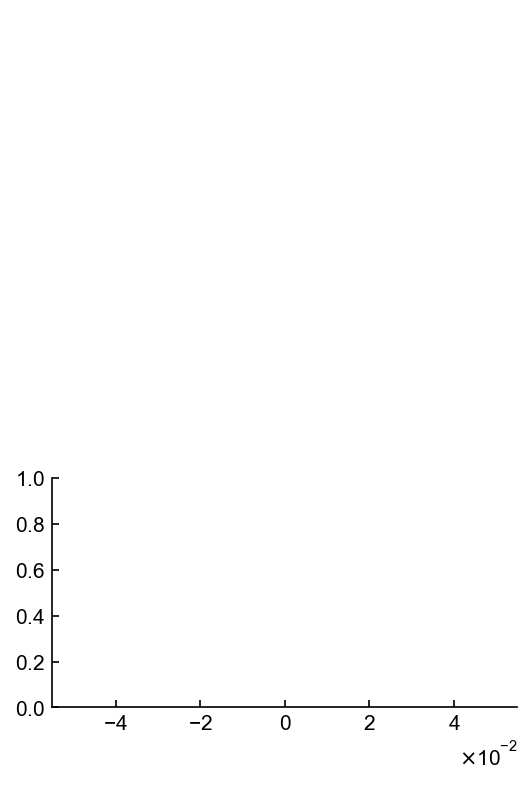

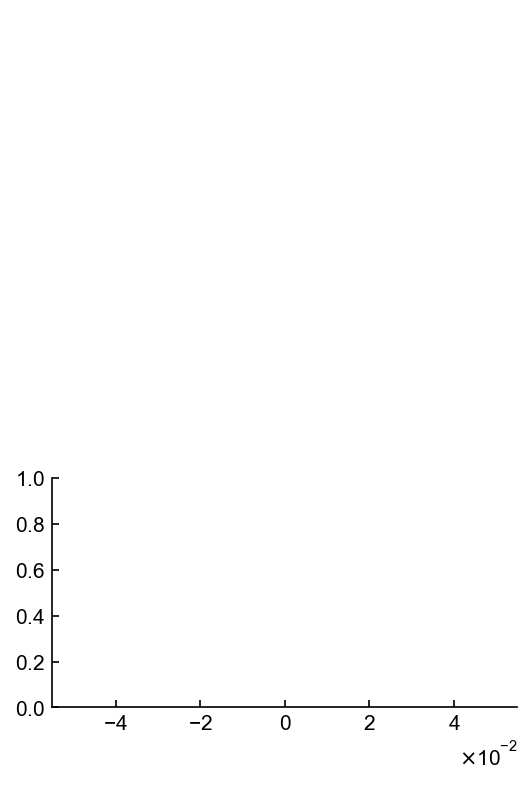

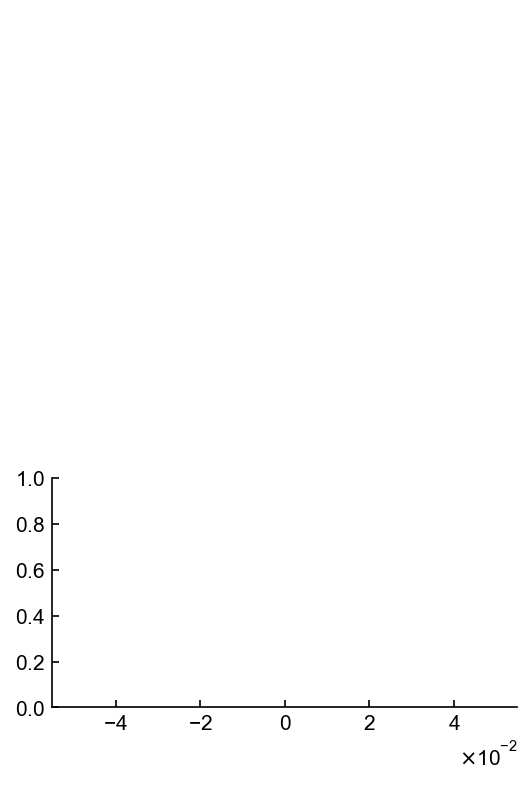

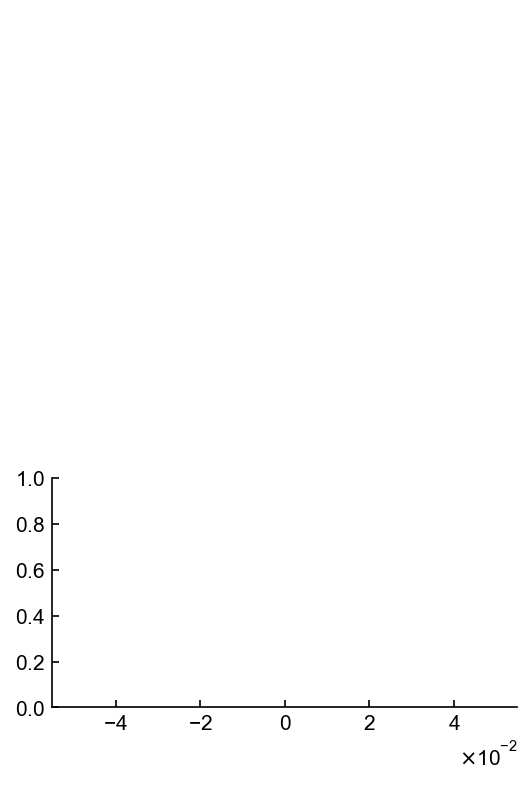

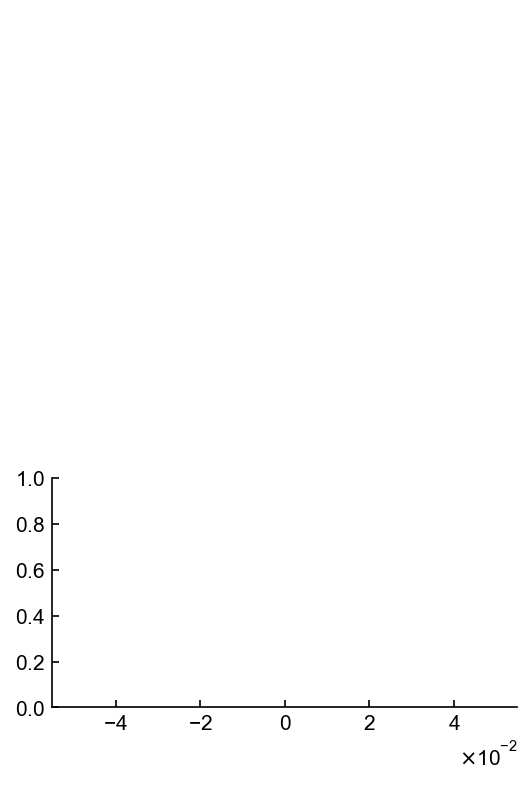

In [42]:
for session in M2_postexpert:
    session_M2 = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_M2 = session_M2.clusters.good
    for clust in clust_M2:
        visualizeClusterInternal(session_M2,clust,sessionname,'Postexpert')
        FRmod = visualizeClusterInternal(session_M2,clust,sessionname,'Postexpert')[-2]
        peak_time = visualizeClusterInternal(session_M2,clust,sessionname,'Postexpert')[-1]
        if FRmod>=M2_FRmod_baseline_median:
            M2_peaklatency_postexpert.append(peak_time)

In [43]:
M2_peaklatency = SimpleNamespace(prereversal_early=M2_peaklatency_preearly,
                      prereversal_late=M2_peaklatency_prelate,
                      prereversal_expert=M2_peaklatency_preexpert,
                      postreversal_early=M2_peaklatency_postearly,
                      postreversal_late=M2_peaklatency_postlate,
                      postreversal_expert=M2_peaklatency_postexpert
                     )

#Save to pickle
filename = 'C:\\Users\insan\\Desktop\\PHRC_Dual\\Peak_latency\\Stimulus\\M2\\M2_peaklatency.pickle'
with open(filename, 'wb') as f:
    pickle.dump(M2_peaklatency, f, protocol=pickle.HIGHEST_PROTOCOL)

### AC

In [44]:
AC_peaklatency_preearly = []
AC_peaklatency_prelate = []
AC_peaklatency_preexpert = []
AC_peaklatency_postearly = []
AC_peaklatency_postlate = []
AC_peaklatency_postexpert = []

In [45]:
def visualizeClusterInternal(sessionfile,clust,sessionname, Phase):
    bw_scott_factor = 3
    
    fig = plt.figure(figsize=(4,6))
    gs = fig.add_gridspec(2,1,height_ratios=[2,1],hspace=0.0125)
    ax1 = plt.subplot(gs[0,0])#Raster
    ax2 = plt.subplot(gs[1,0],sharex=ax1)#PSTH
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
 
    mn = AC_FRmod_baseline_median 
    spread = 2.5
    FRmod_color = NCR_CR_cmap( (FRmod-(mn-spread/2))/ (spread) )
    color_to_use = FRmod_color
    
    ##################
    allConditions = ilep.getAllConditions(sessionfile,clust)
    trialsToPlot = allConditions['all_trials'].trials

    tone_times = sessionfile.trials.starts
    clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    trialSpikes = []
    
    for trial in trialsToPlot:

        #Need to get spike times for each trail...
        starttime = tone_times[trial]-0.35*sessionfile.meta.fs #0.25
        endtime = tone_times[trial]+1.6*sessionfile.meta.fs #1.5

        this_trial_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        this_trial_spikes = this_trial_spikes - tone_times[trial]
        this_trial_spikes = this_trial_spikes * 1000 / sessionfile.meta.fs

        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')
    
    #Plot Raster
    for idx,trial in enumerate(trialsToPlot):
        ax1.scatter(trialSpikes[idx],np.ones_like(trialSpikes[idx])*idx,color=color_to_use,s=5,marker='o',lw=0)
    ax1.fill_betweenx(range(len(trialsToPlot)), 0, 100, alpha=0.3, color=FRmod_color, lw=0,) #shading stim
    
    #Plot PSTH
    starttime = -250-100 #-350
    endtime = 1500+100 #1600
    PSTHstart = starttime - 100
    PSTHend = endtime + 100
    xrange = np.linspace(starttime,endtime,num=1950)
    #numSplits=10
    numSplits = min(10,len(trialSpikes))
    if numSplits < 2:
        return False,[] ### Return a failure
    
    FR = np.full((numSplits,len(xrange)),np.nan)
    kf = KFold(n_splits=numSplits)
    for idx,(train_index,_) in enumerate(kf.split(trialSpikes)):
        PSTHspikes = np.concatenate(trialSpikes[train_index])
        if len(PSTHspikes) == 0:
            FR[idx,:] = np.zeros(len(xrange))
            continue
        bw = len(PSTHspikes)**(-1./5) / bw_scott_factor
        KDE = gaussian_kde(PSTHspikes,bw_method=bw)
        FR[idx,:] = KDE.evaluate(xrange)
        FR[idx,:] = FR[idx,:] * len(PSTHspikes) / len(train_index) * 1000 #1000 is conversion to s/s because units are all in ms for this plot
    avg_FR = np.mean(FR,axis=0)
    sem_FR = np.std(FR,axis=0)
    
    ax2.plot(xrange,avg_FR,lw=1,color=color_to_use)
    ax2.fill_between(xrange,avg_FR-sem_FR,avg_FR+sem_FR,color=color_to_use,alpha=0.5,zorder=-10,lw=0)
    
    max_FR_value = np.max(avg_FR+sem_FR) * 1.1
    sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
    idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
    valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
    limit = np.min(valid_limits)
    ax2.set_ylim([0,limit])
    ax2.set_yticks([0,limit/2,limit])
    ax2.set_yticklabels(['0',str(int(limit/2)),str(limit)],size=12)
    
    
    ax2.set_ylabel('Firing rate (spikes/s)',size=12)

    ax2.plot([0,100],[limit,limit],color='k',lw=2,linestyle='-') #zorder = 10 line of tone

    
    ax2.set_xlim([-250,1500])
    ax2.set_xticks([0,500,1000,1500])
    ax2.set_xticklabels(['0','500','1000','1500'],size=12)
    ax2.set_xlabel('Time (ms)',size=12)
    
    ######
    baseline_FR = sessionfile.responsiveness[clust]['all_trials'].FRbaseline

    diff_from_baseline = np.abs(avg_FR[350:1350] - baseline_FR)
    
    peak = np.max(diff_from_baseline) #len=1000
    peak_time = np.argmax(diff_from_baseline) #ms
    
    #print(peak_time)
    
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    
    if FRmod>=AC_FRmod_baseline_median:
        ax2.axvline(x=peak_time,color='green')
    
    fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Peak_latency\\Stimulus\\AC\\'+Phase+str(sessionname)+',clust'+str(clust)+'.pdf'),transparent=False,facecolor="white", bbox_inches = 'tight')
    
    plt.close(fig)
    return fig,[ax1,ax2],FRmod,peak_time

In [46]:
for session in AC_preearly:
    session_AC = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_AC = session_AC.clusters.good
    for clust in clust_AC:
        visualizeClusterInternal(session_AC,clust,sessionname,'Preearly')
        FRmod = visualizeClusterInternal(session_AC,clust,sessionname,'Preearly')[-2]
        peak_time = visualizeClusterInternal(session_AC,clust,sessionname,'Preearly')[-1]
        if FRmod>=AC_FRmod_baseline_median:
            AC_peaklatency_preearly.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

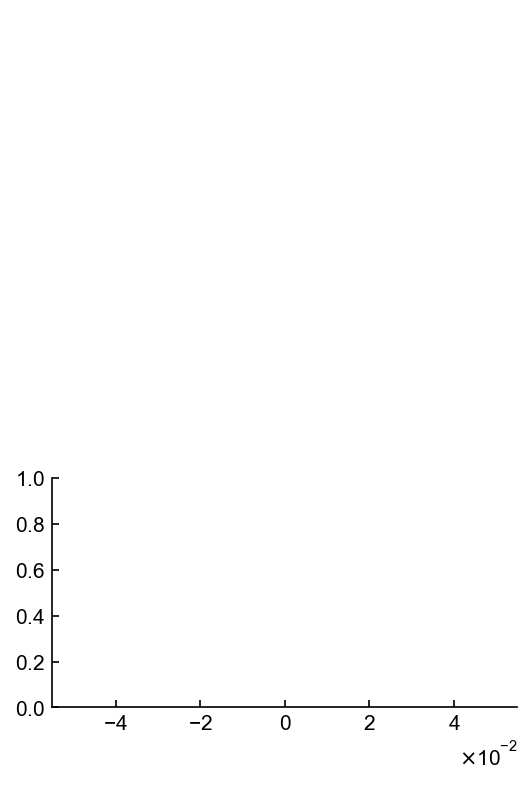

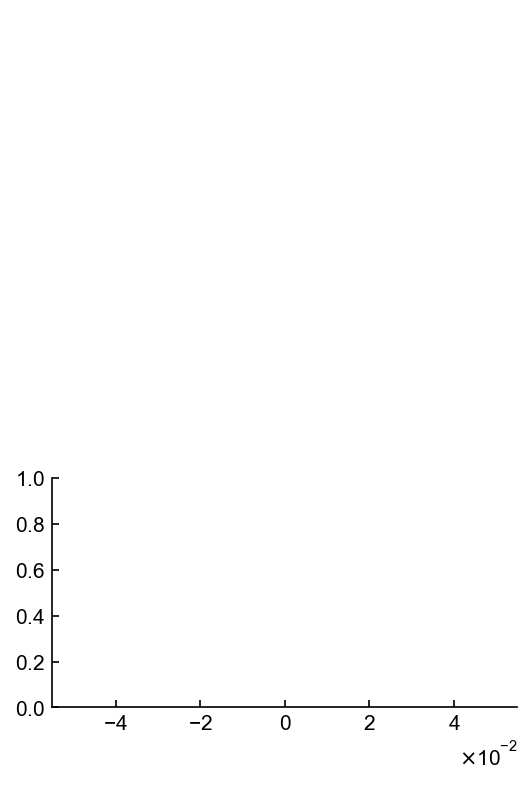

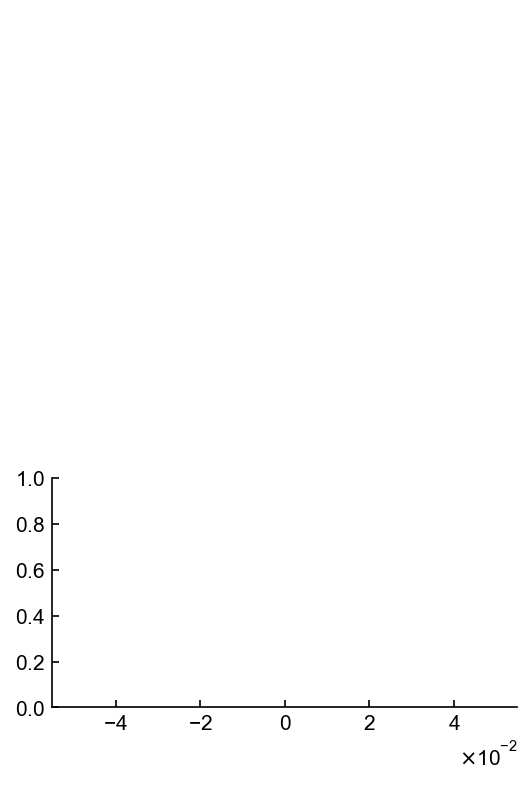

In [47]:
for session in AC_prelate:
    session_AC = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_AC = session_AC.clusters.good
    for clust in clust_AC:
        visualizeClusterInternal(session_AC,clust,sessionname,'Prelate')
        FRmod = visualizeClusterInternal(session_AC,clust,sessionname,'Prelate')[-2]
        peak_time = visualizeClusterInternal(session_AC,clust,sessionname,'Prelate')[-1]
        if FRmod>=AC_FRmod_baseline_median:
            AC_peaklatency_prelate.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

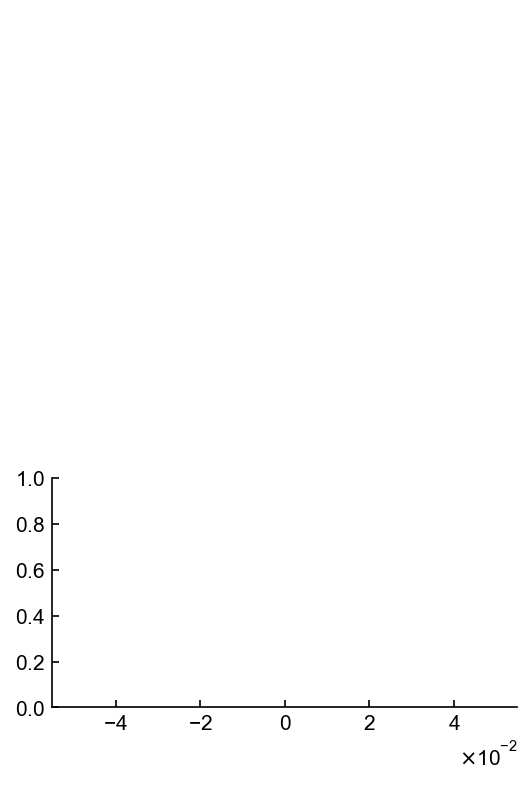

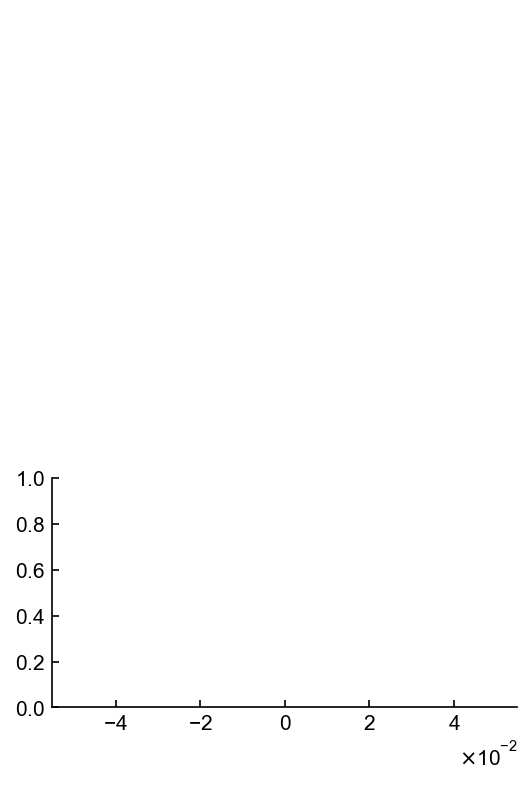

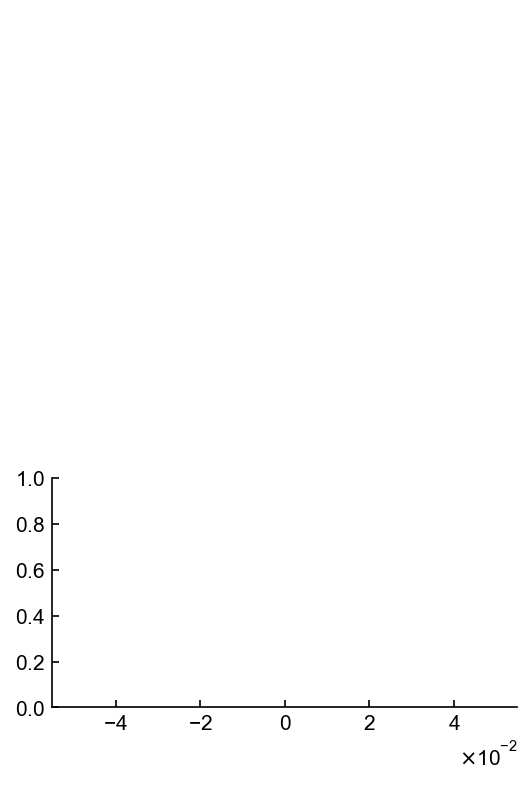

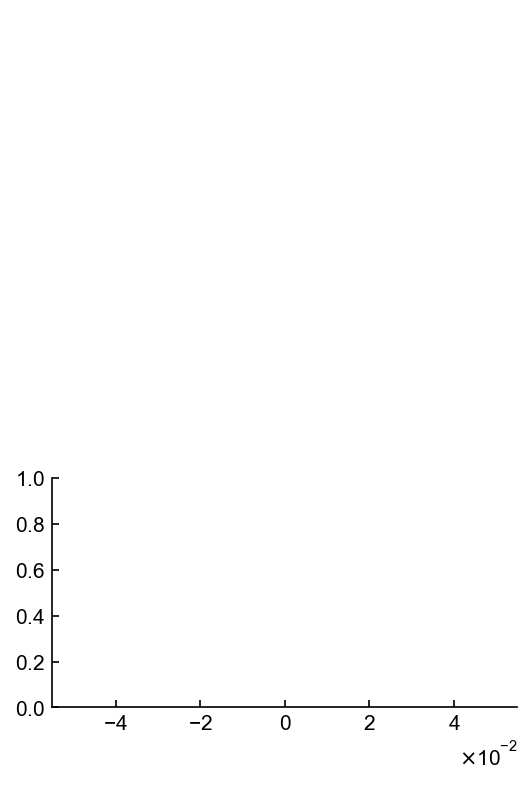

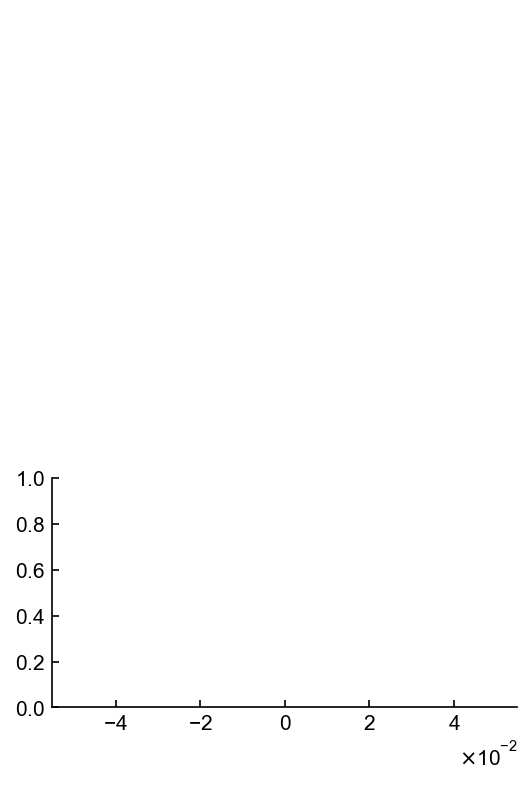

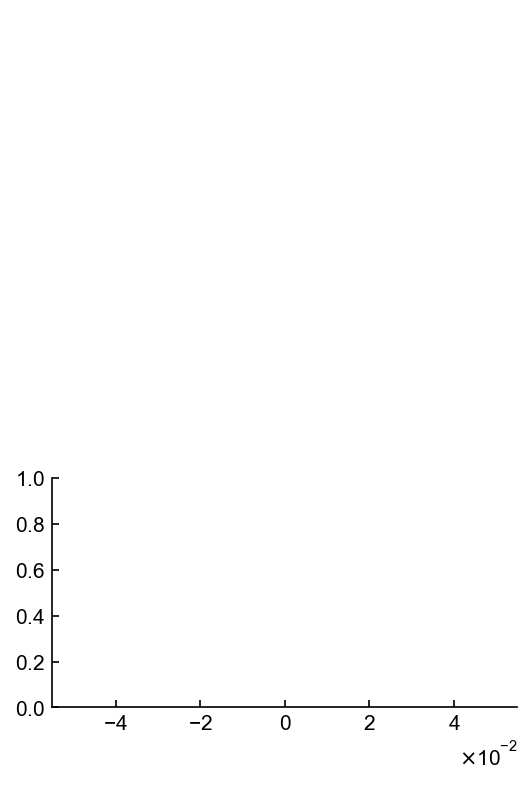

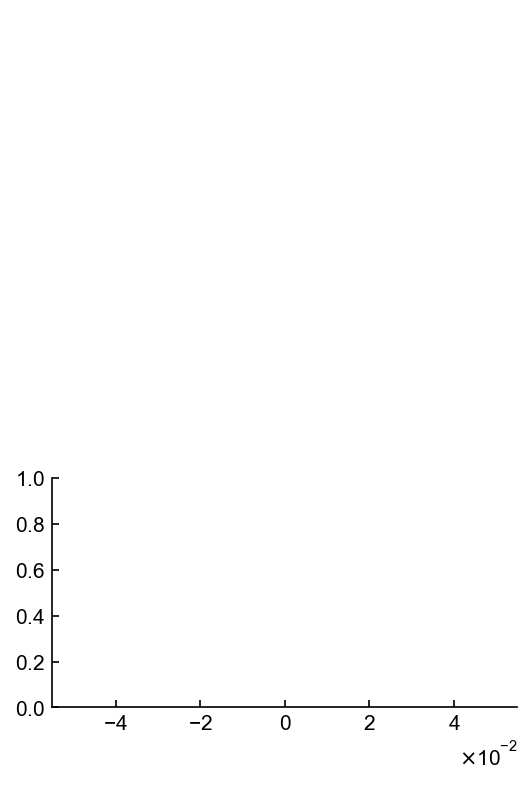

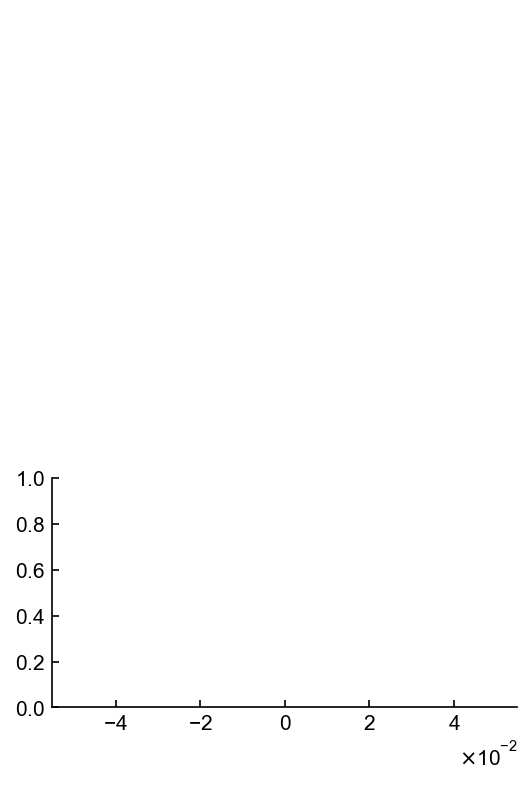

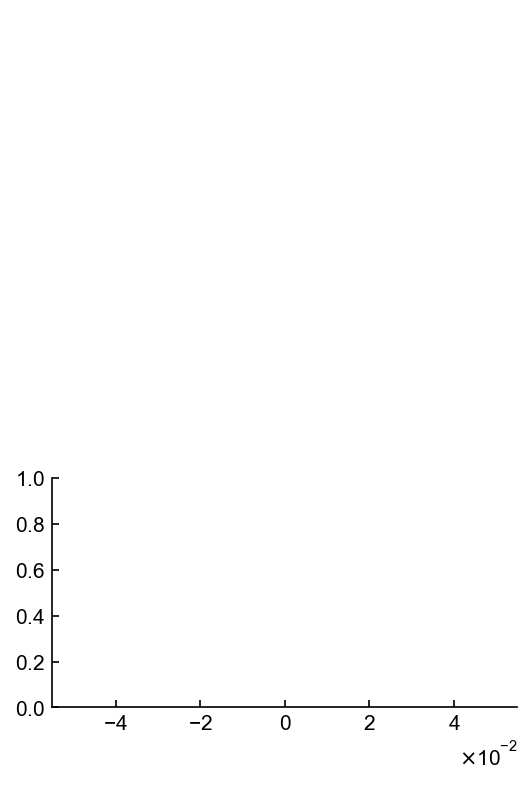

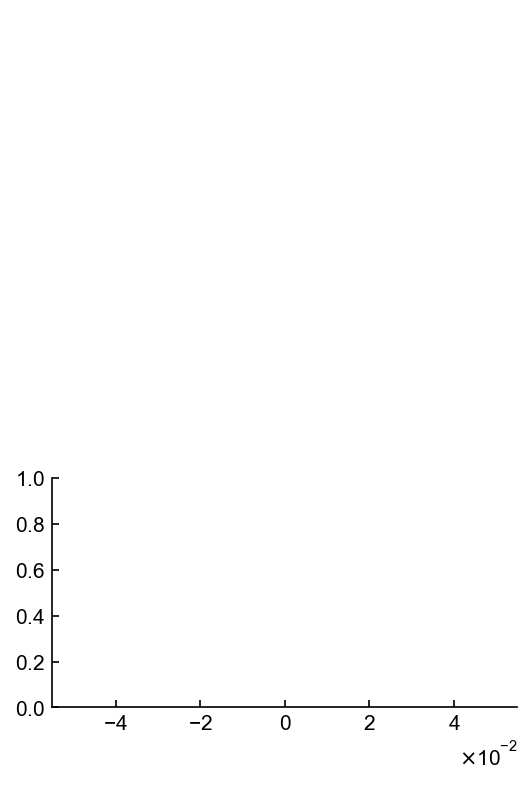

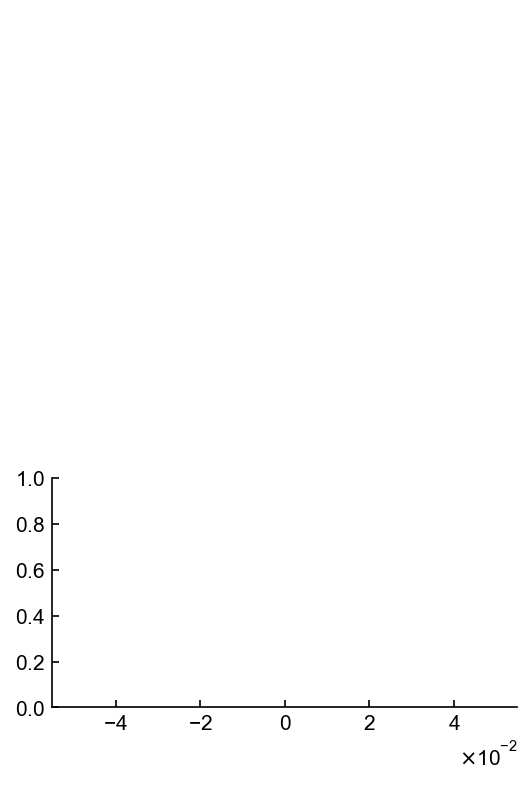

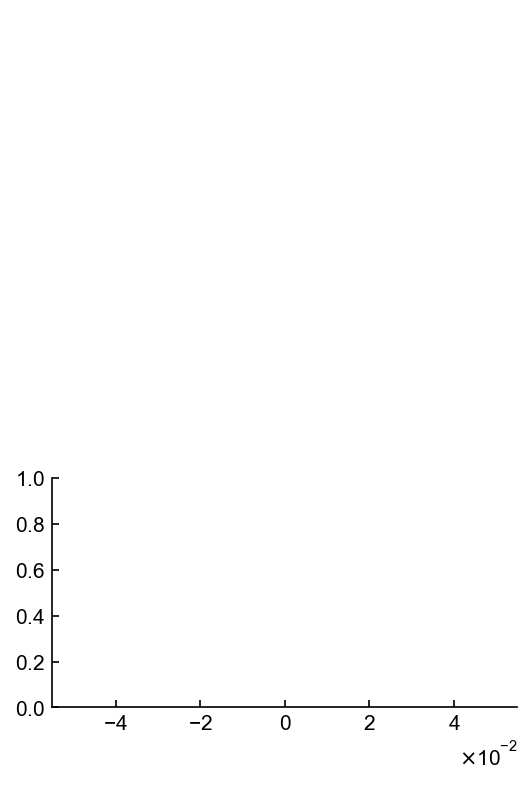

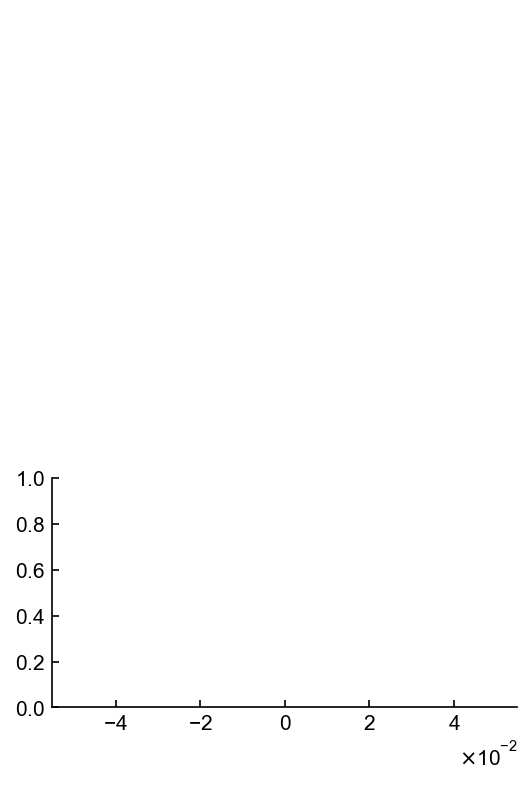

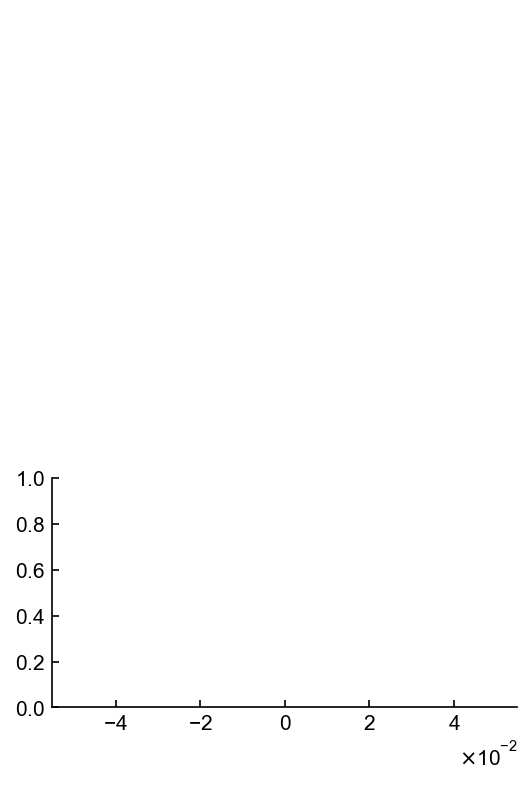

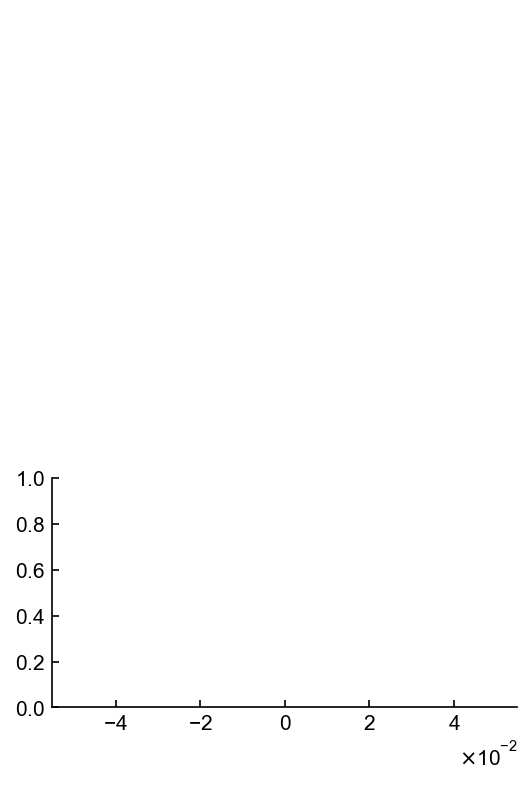

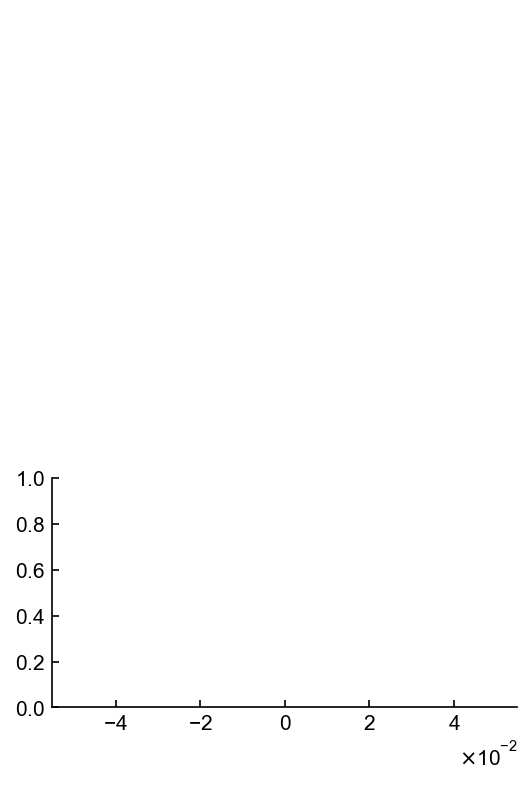

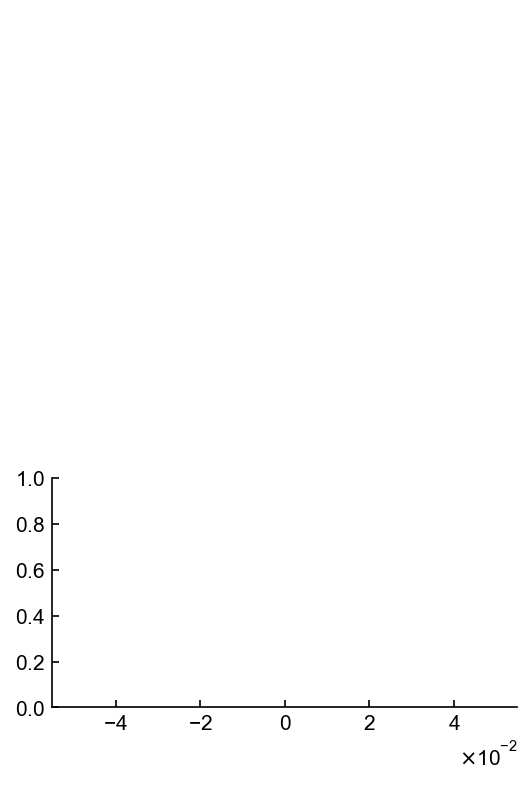

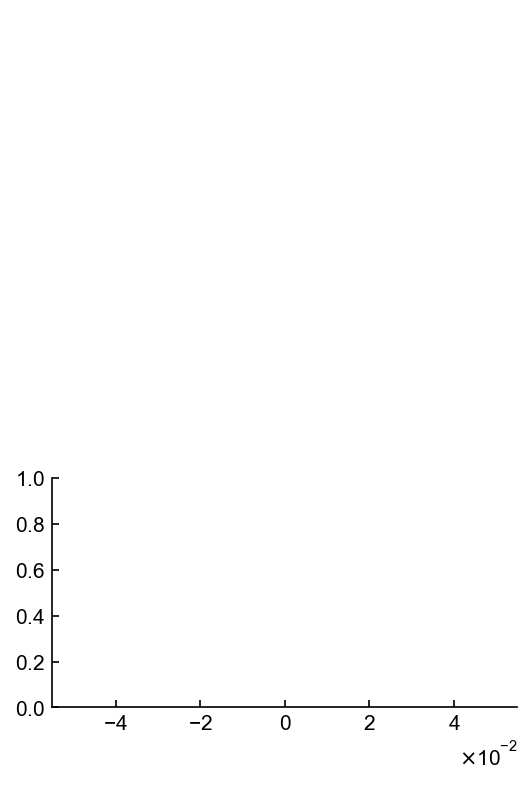

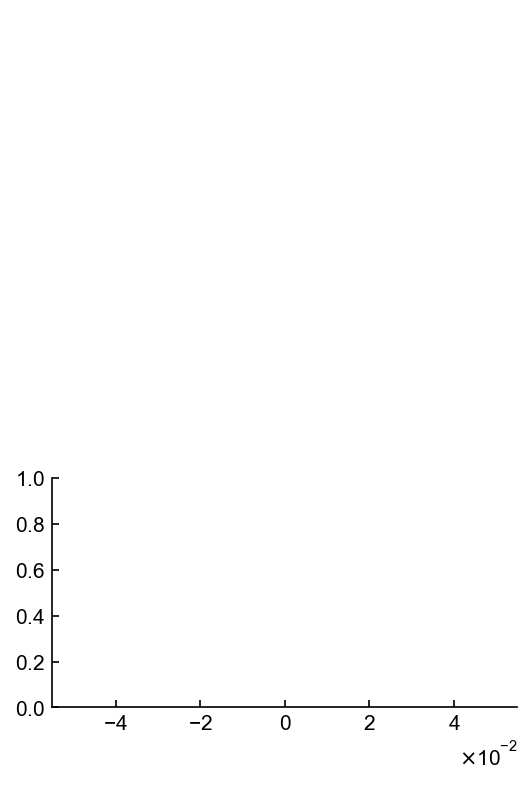

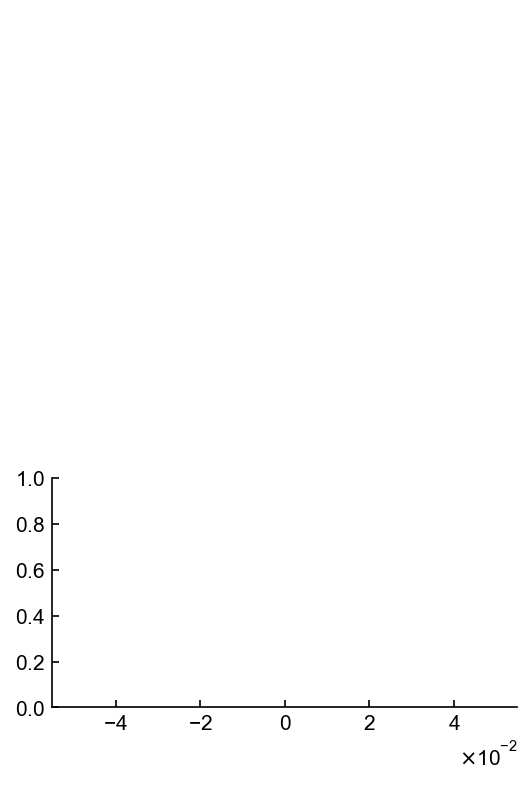

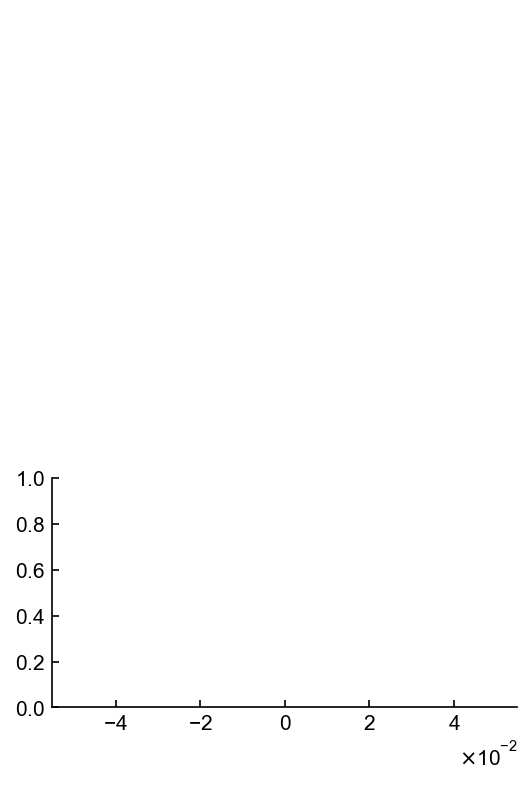

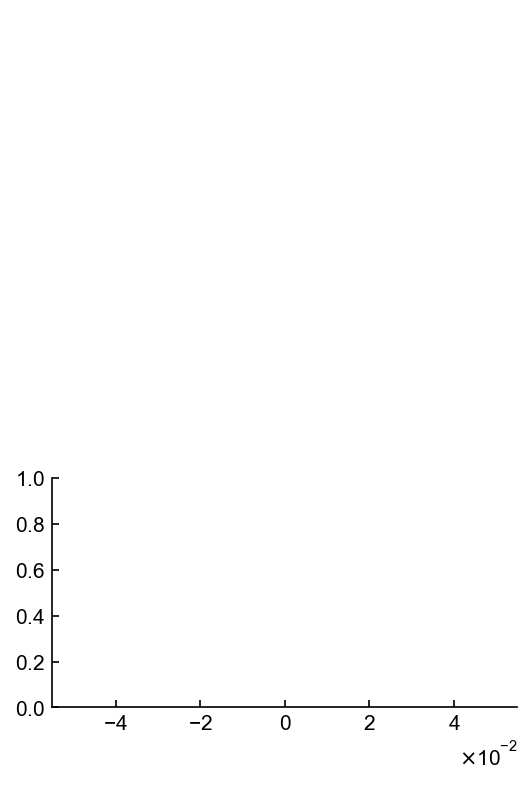

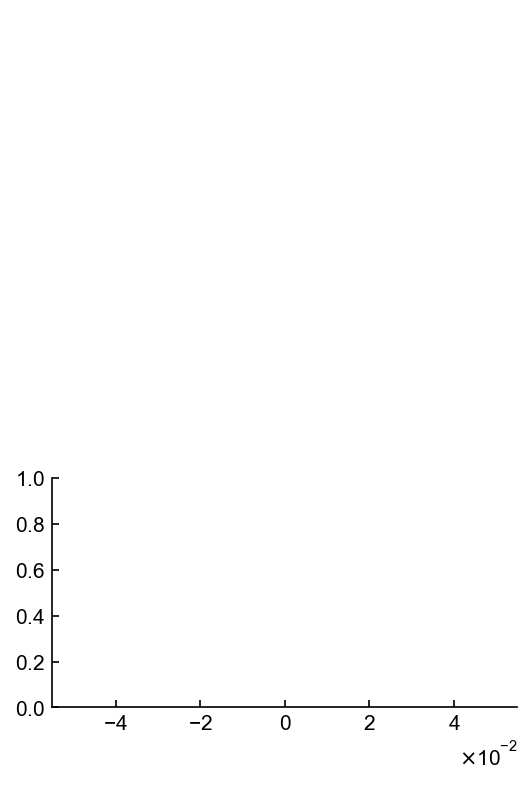

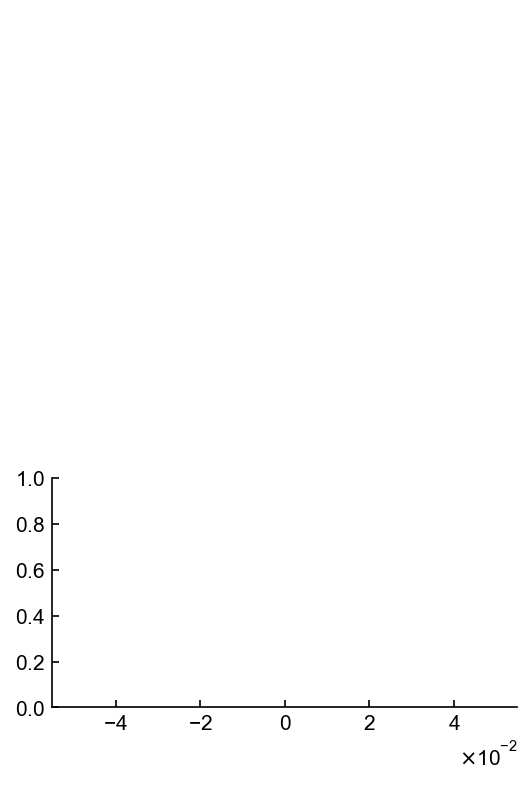

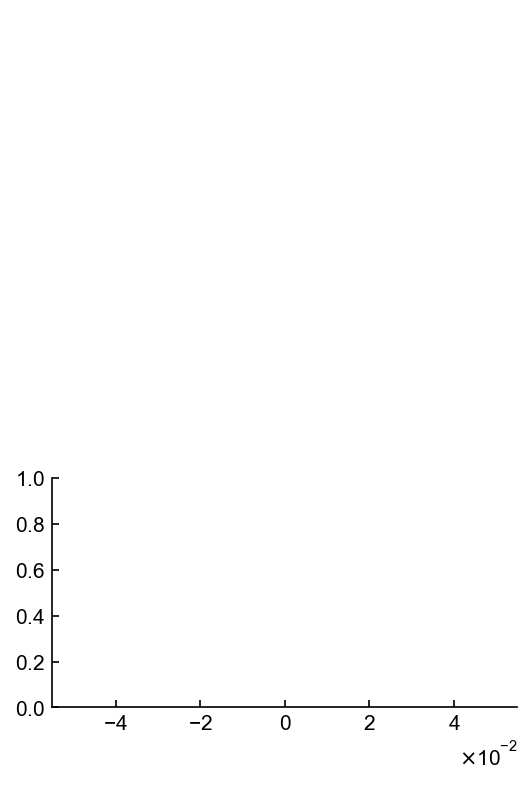

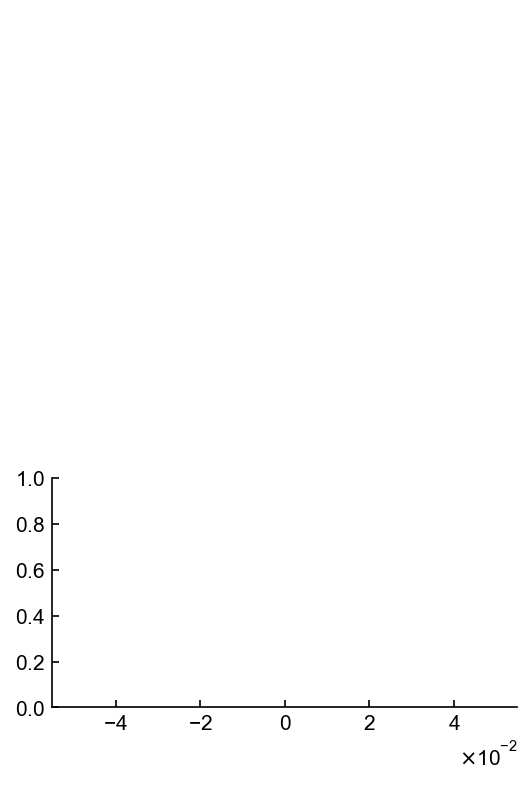

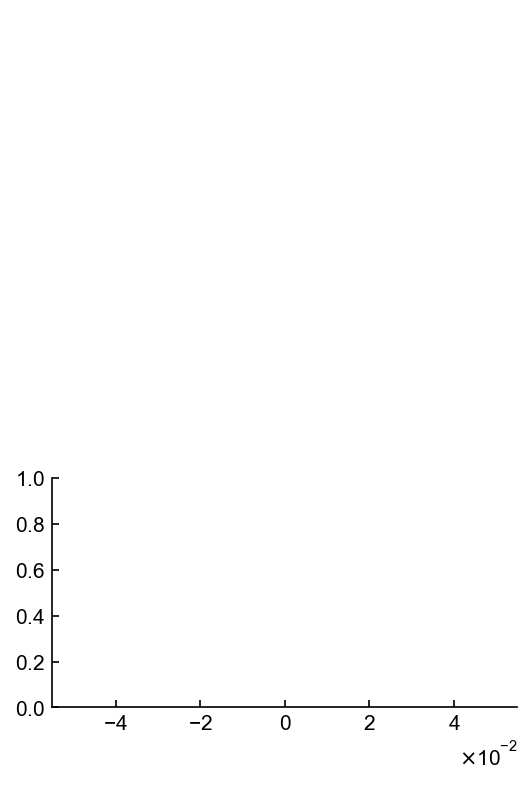

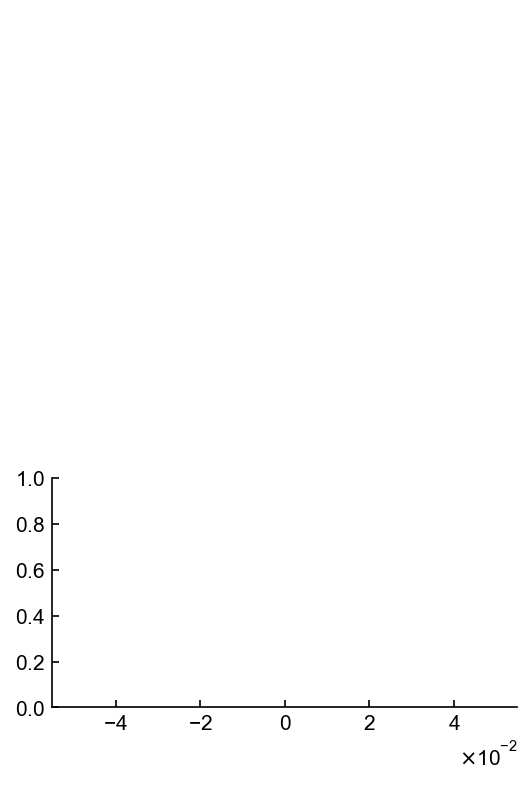

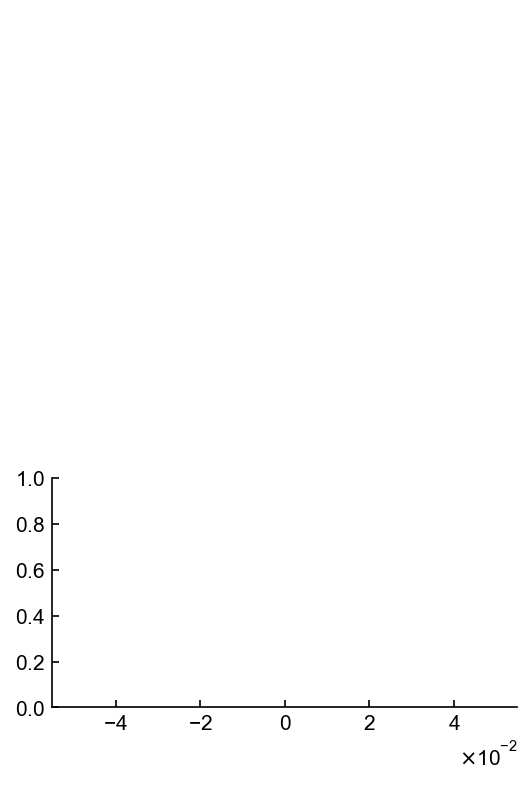

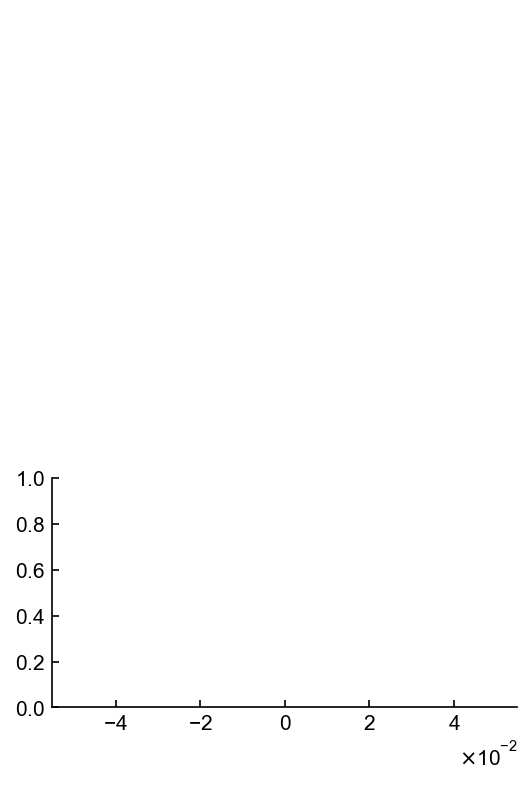

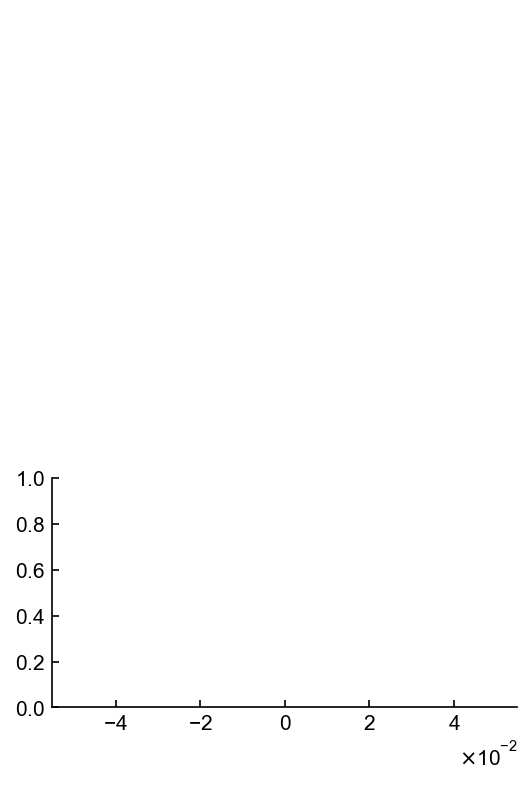

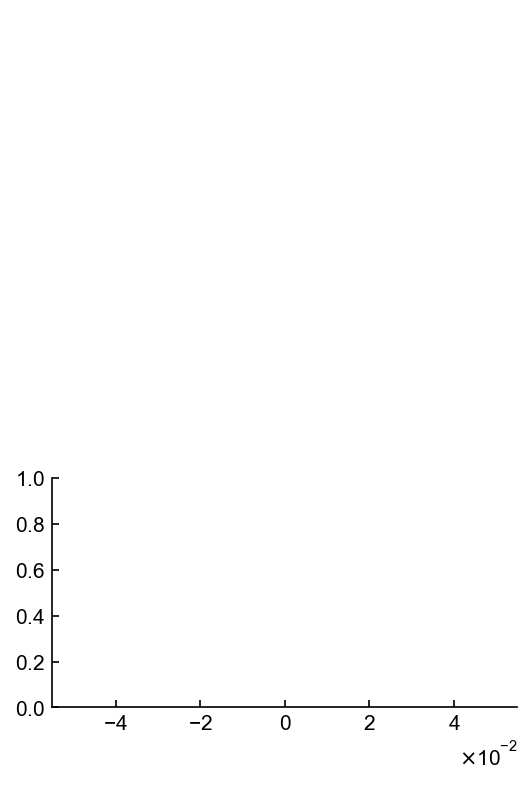

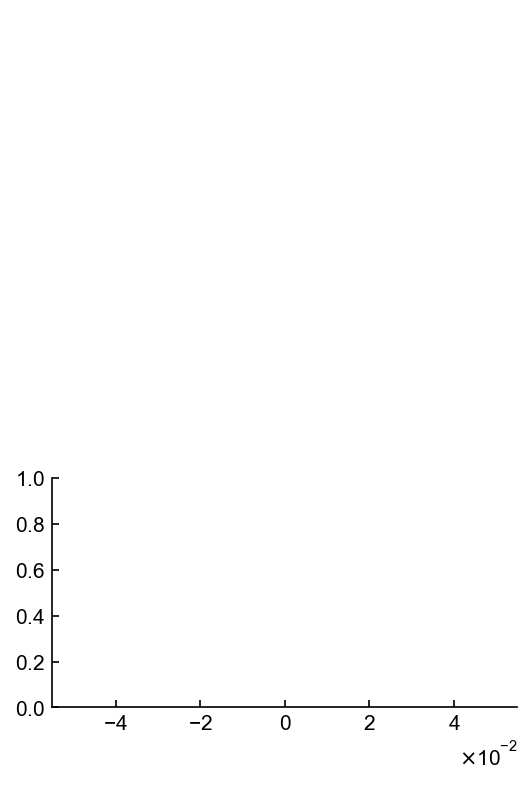

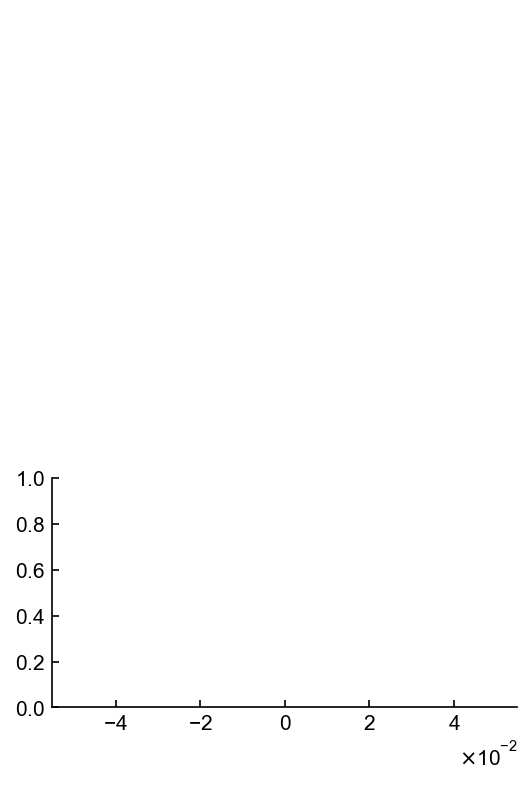

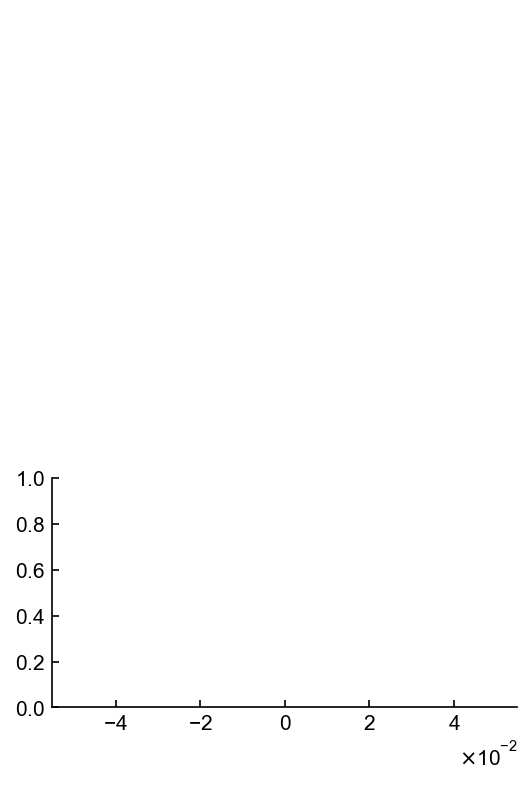

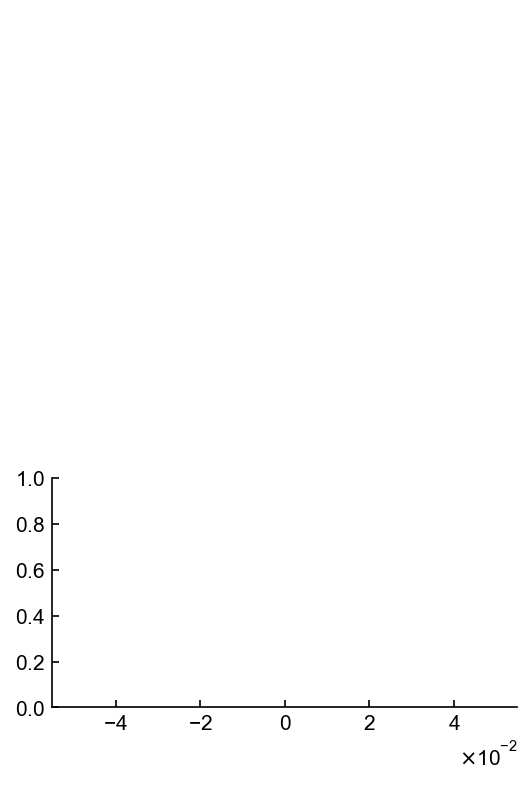

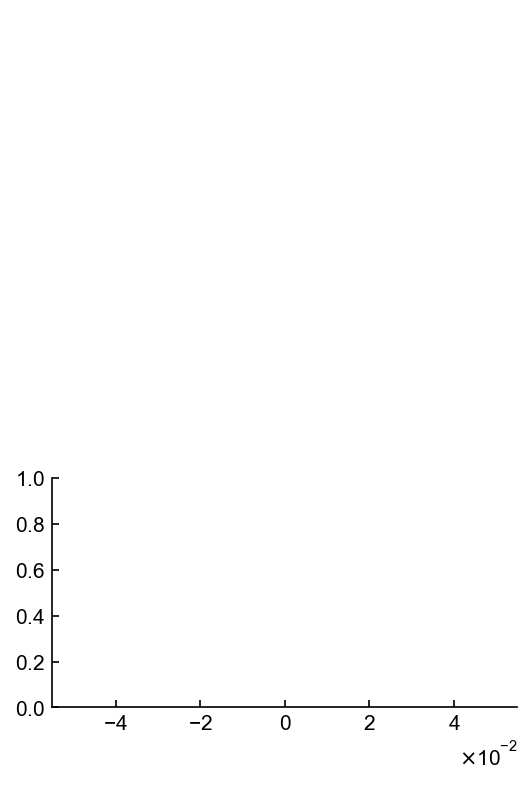

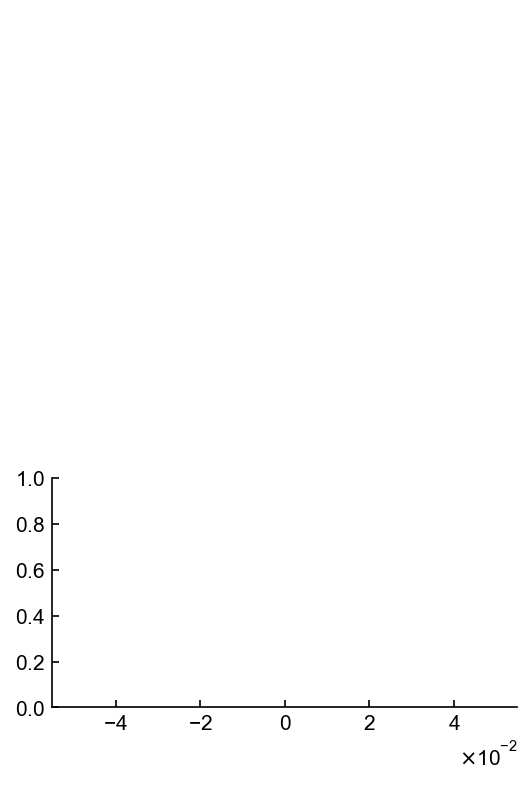

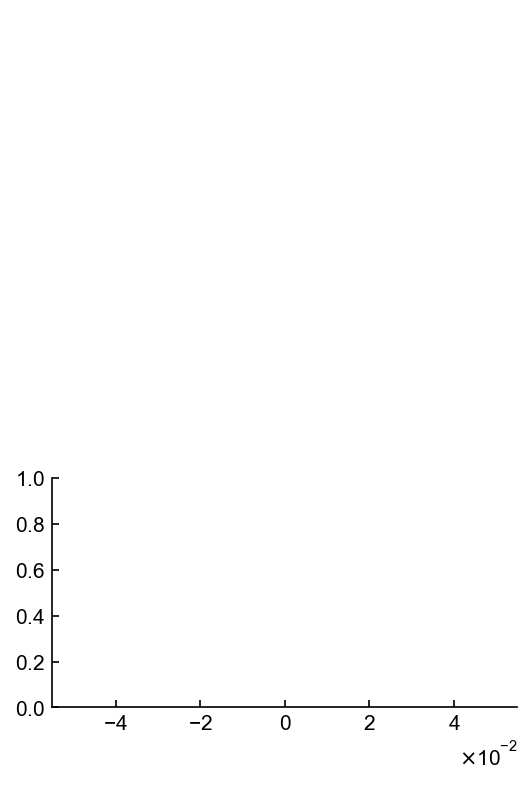

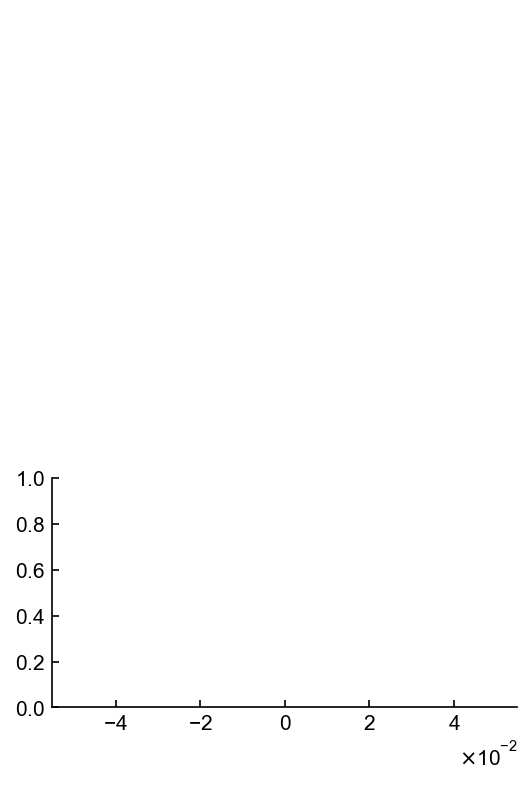

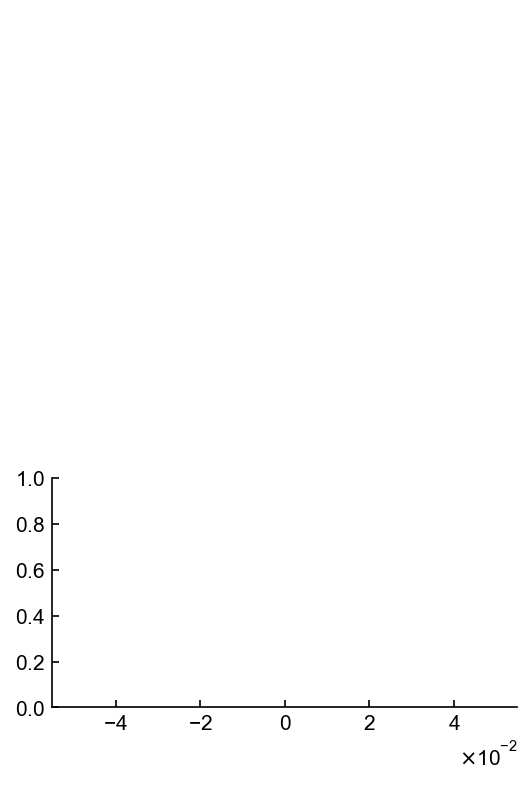

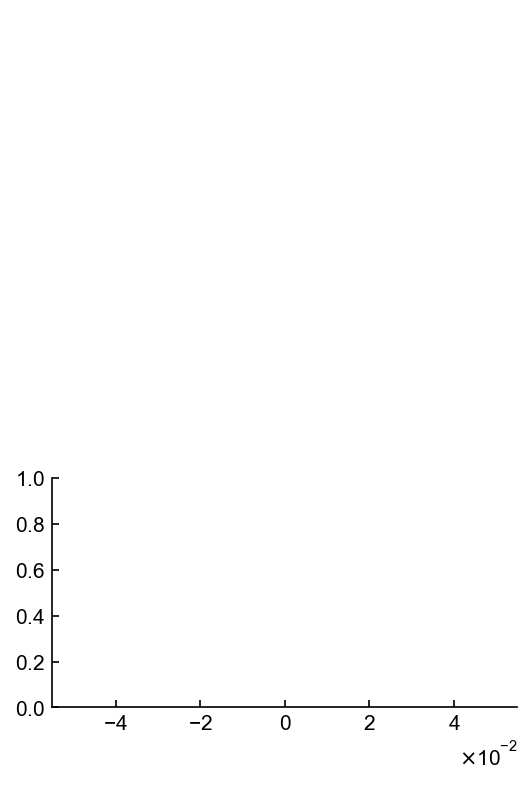

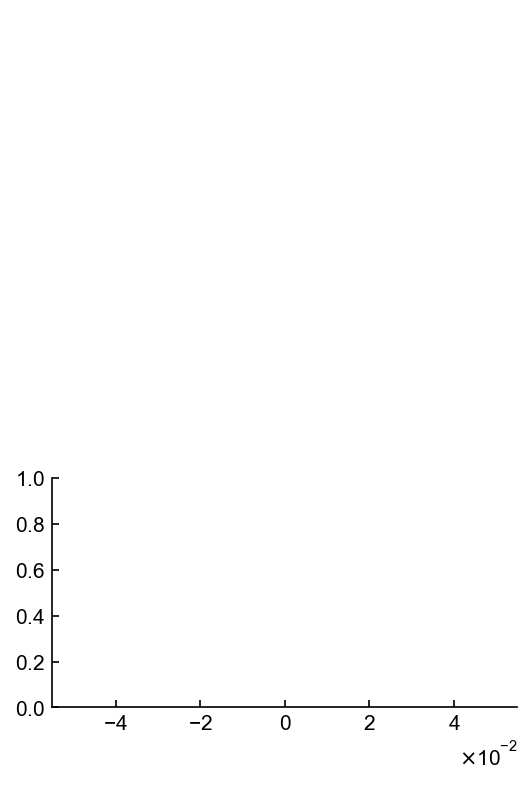

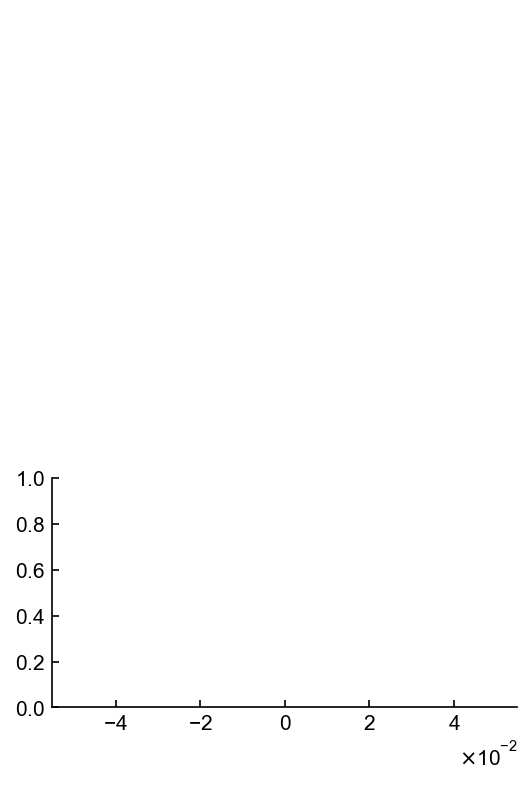

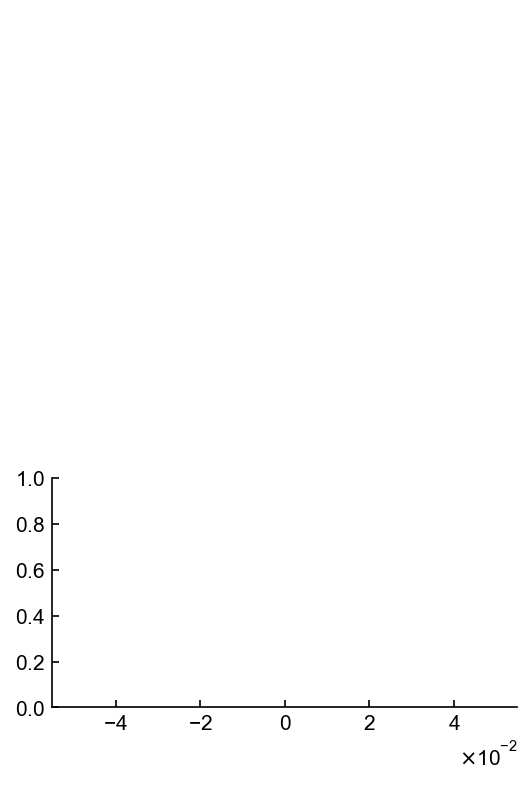

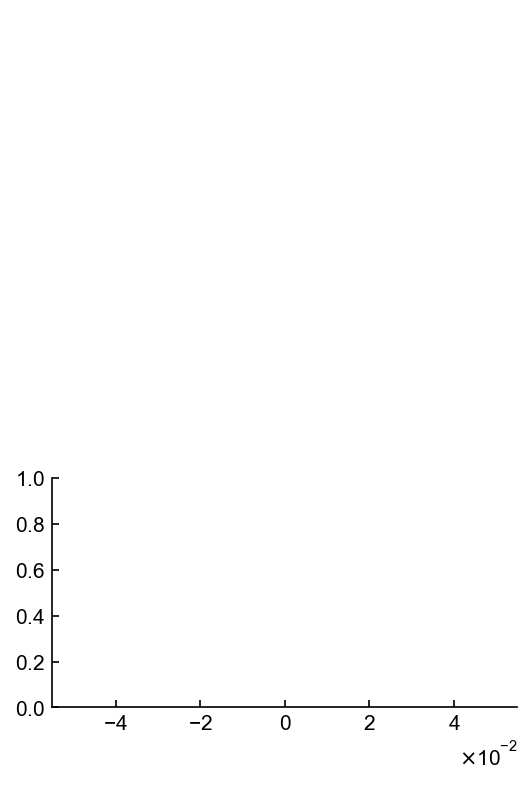

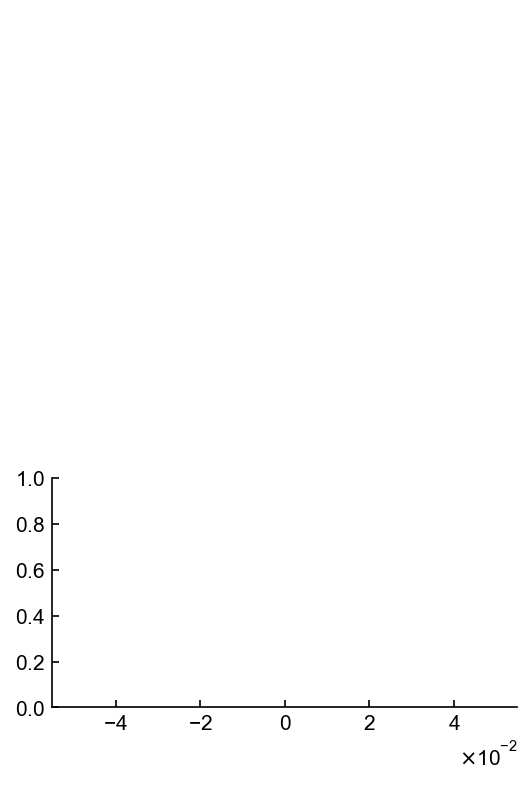

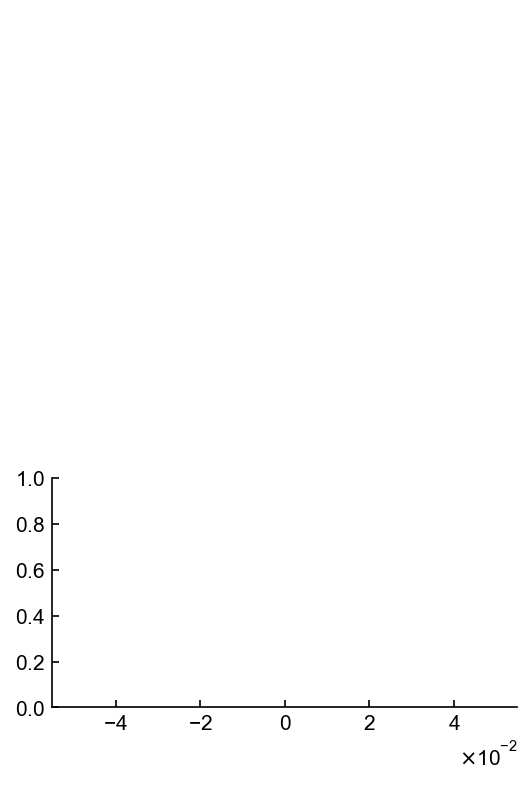

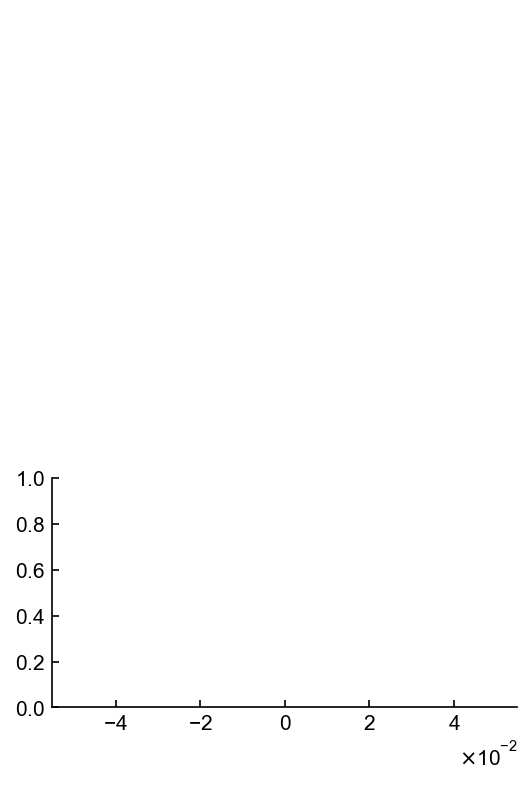

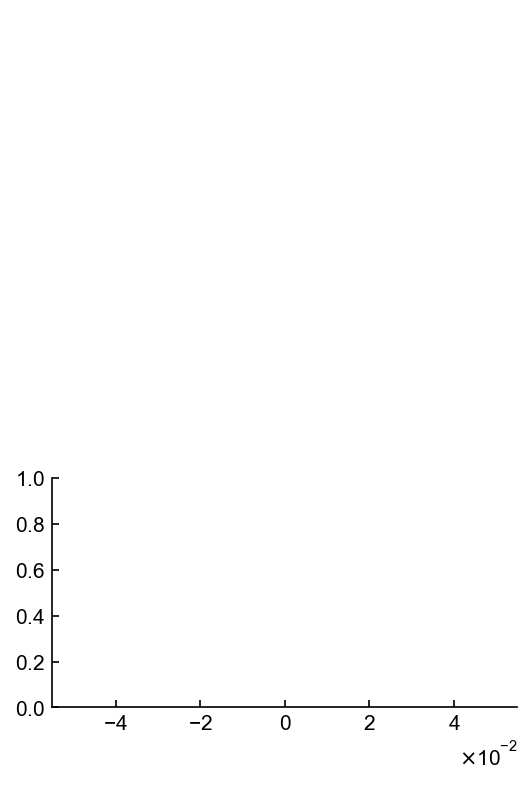

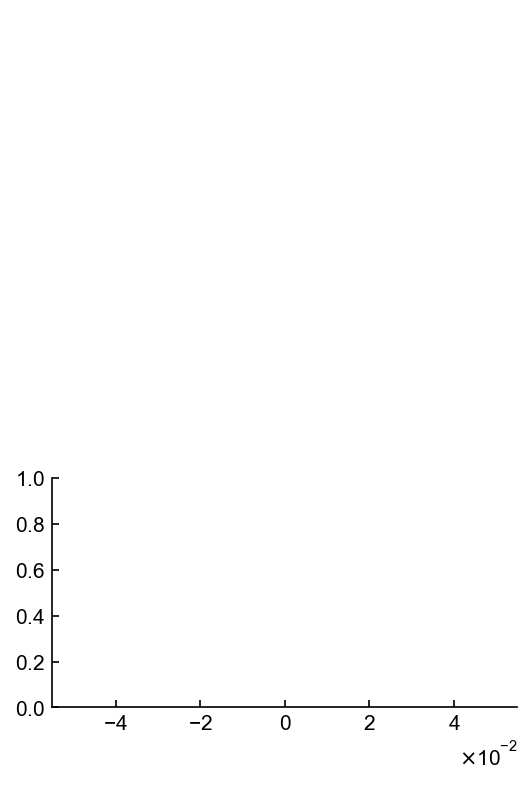

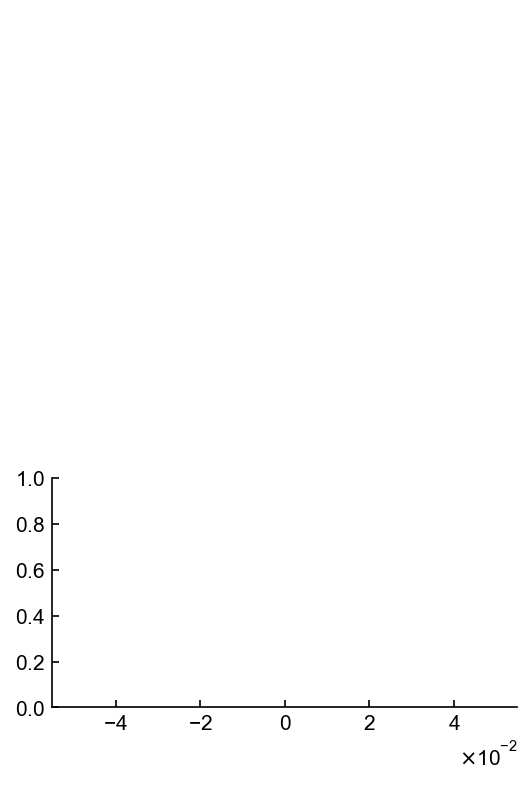

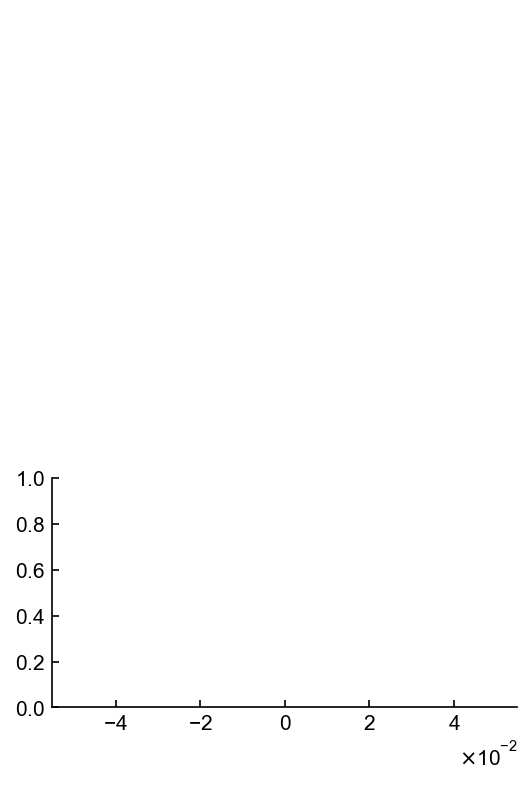

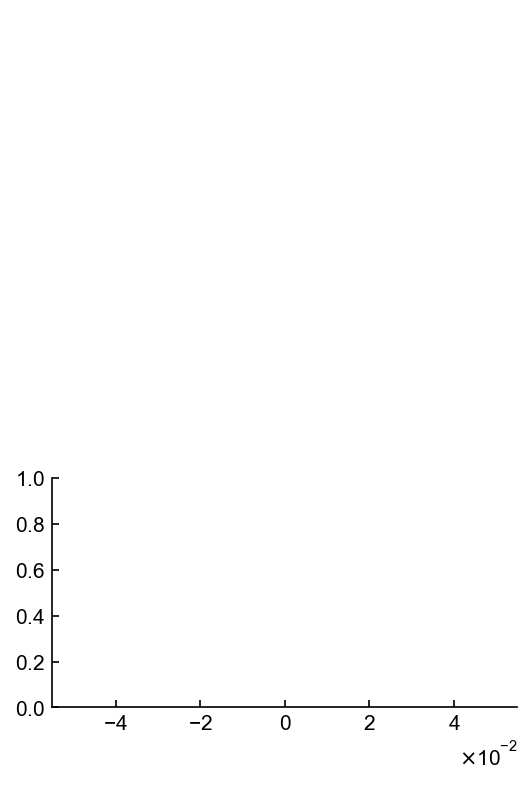

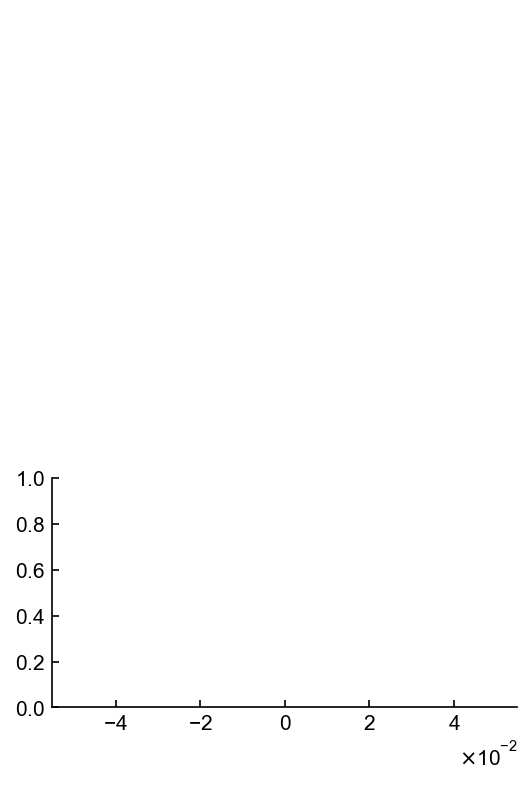

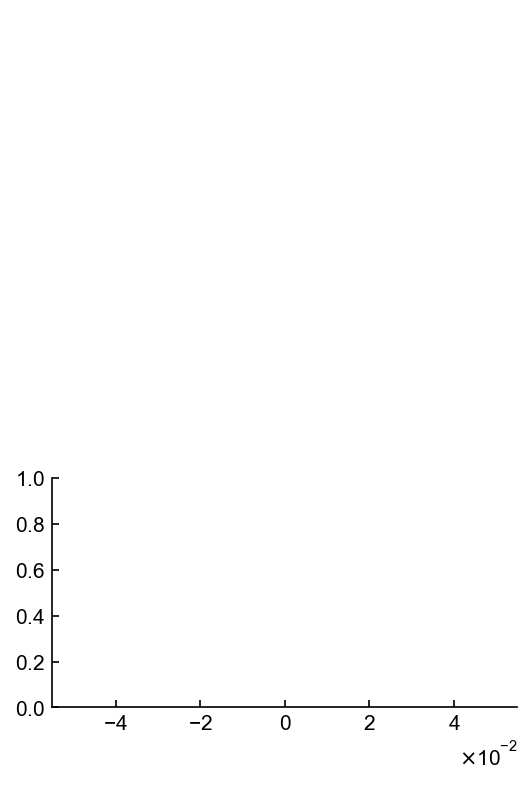

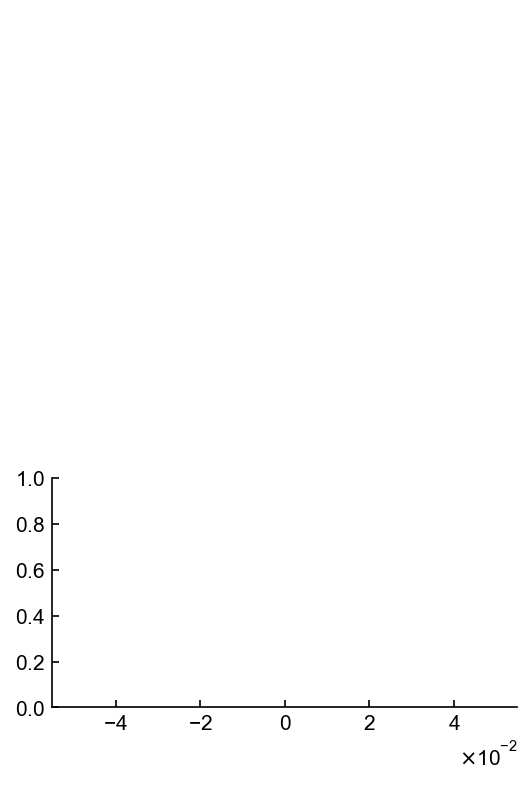

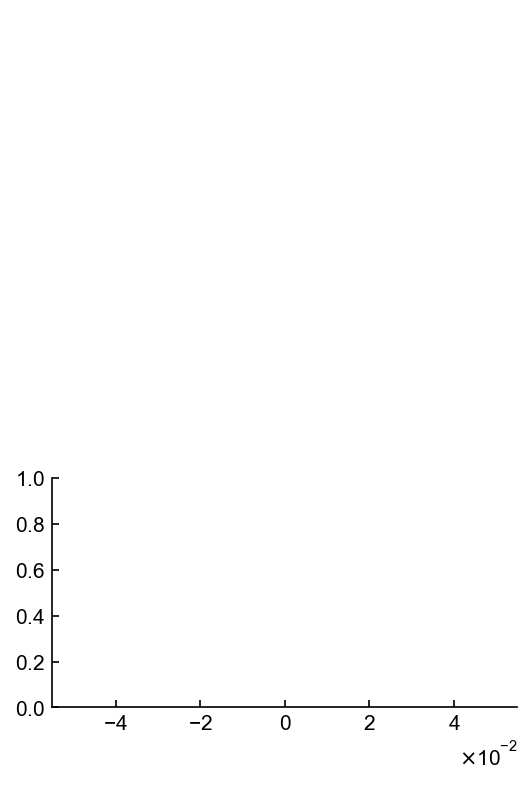

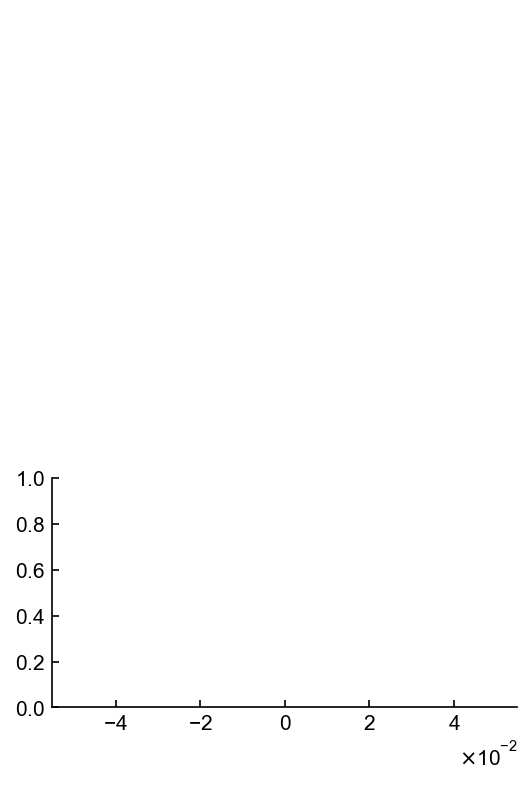

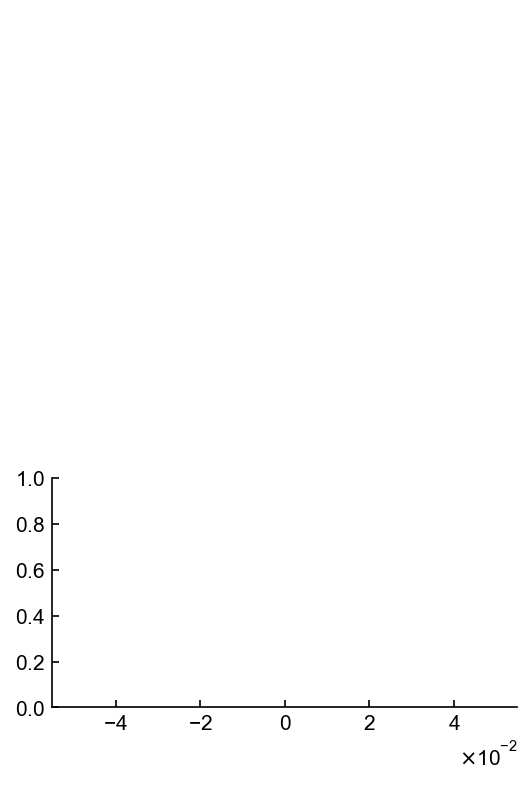

In [48]:
for session in AC_preexpert:
    session_AC = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_AC = session_AC.clusters.good
    for clust in clust_AC:
        visualizeClusterInternal(session_AC,clust,sessionname,'Preexpert')
        FRmod = visualizeClusterInternal(session_AC,clust,sessionname,'Preexpert')[-2]
        peak_time = visualizeClusterInternal(session_AC,clust,sessionname,'Preexpert')[-1]
        if FRmod>=AC_FRmod_baseline_median:
            AC_peaklatency_preexpert.append(peak_time)

In [49]:
for session in AC_postearly:
    session_AC = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_AC = session_AC.clusters.good
    for clust in clust_AC:
        visualizeClusterInternal(session_AC,clust,sessionname,'Postearly')
        FRmod = visualizeClusterInternal(session_AC,clust,sessionname,'Postearly')[-2]
        peak_time = visualizeClusterInternal(session_AC,clust,sessionname,'Postearly')[-1]
        if FRmod>=AC_FRmod_baseline_median:
            AC_peaklatency_postearly.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

In [50]:
for session in AC_postlate:
    session_AC = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_AC = session_AC.clusters.good
    for clust in clust_AC:
        visualizeClusterInternal(session_AC,clust,sessionname,'Postlate')
        FRmod = visualizeClusterInternal(session_AC,clust,sessionname,'Postlate')[-2]
        peak_time = visualizeClusterInternal(session_AC,clust,sessionname,'Postlate')[-1]
        if FRmod>=AC_FRmod_baseline_median:
            AC_peaklatency_postlate.append(peak_time)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

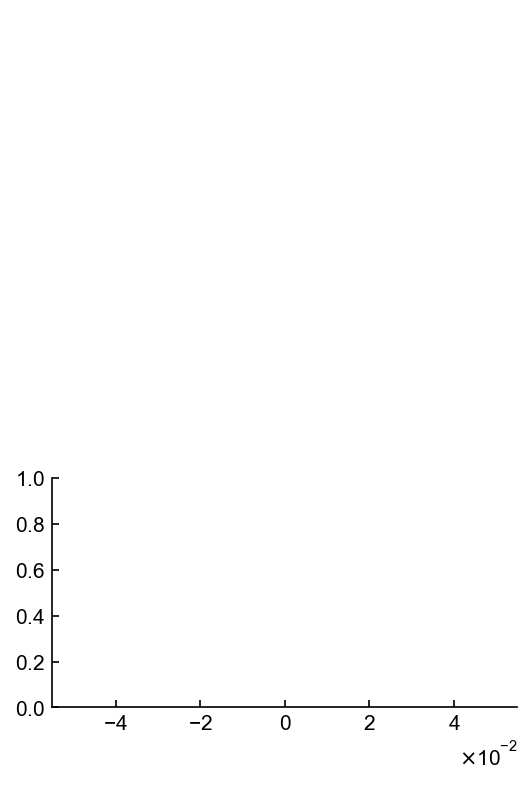

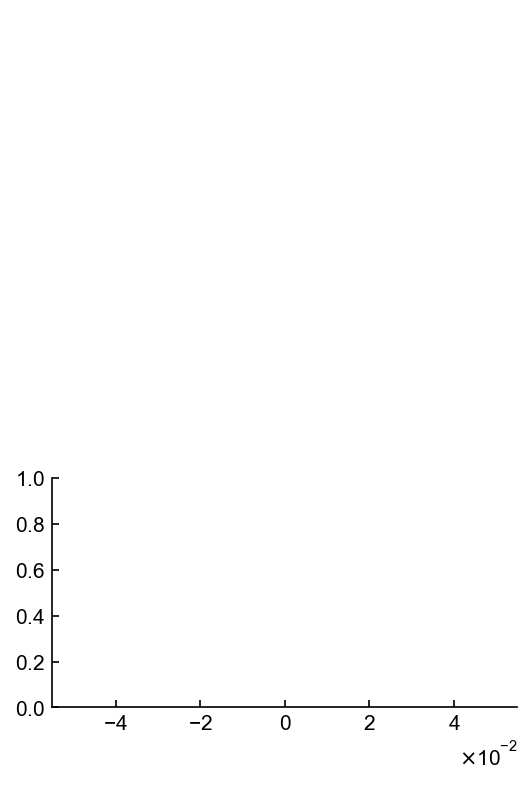

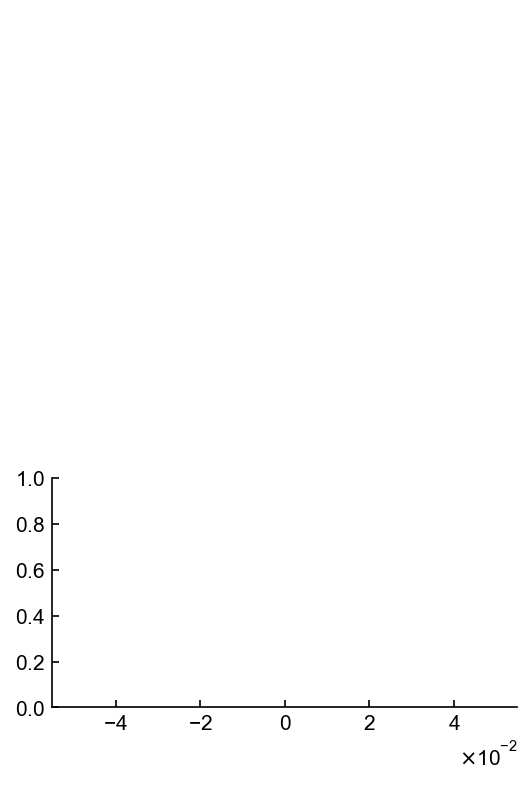

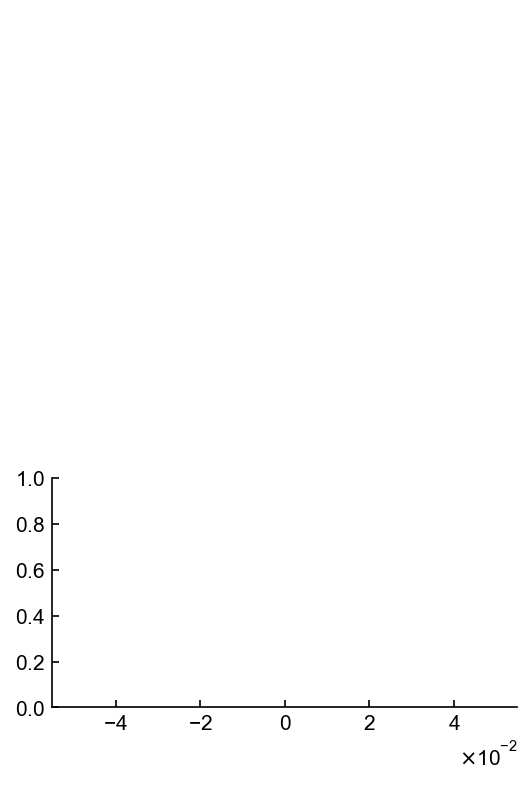

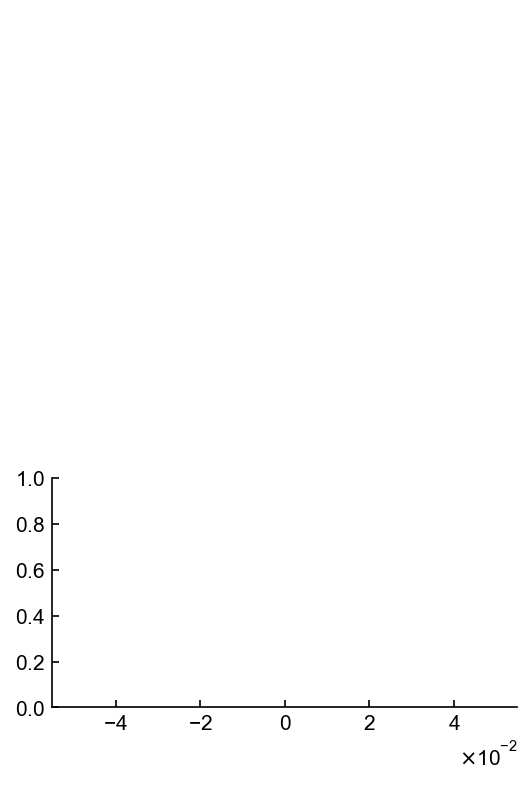

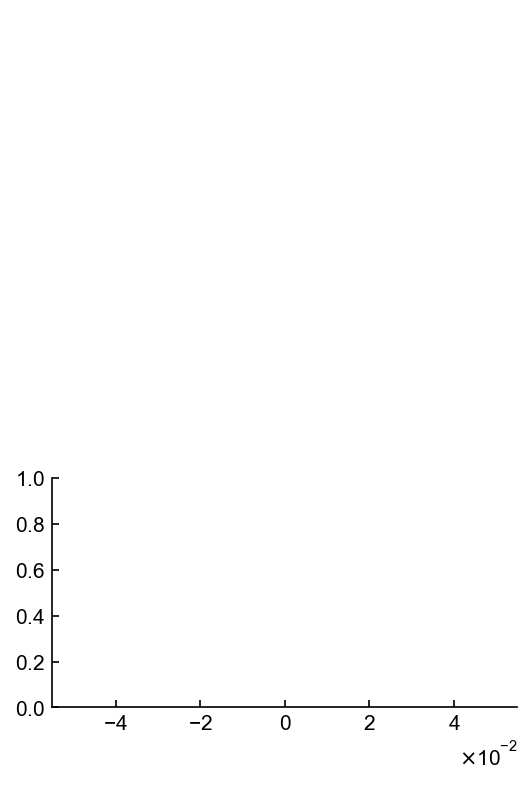

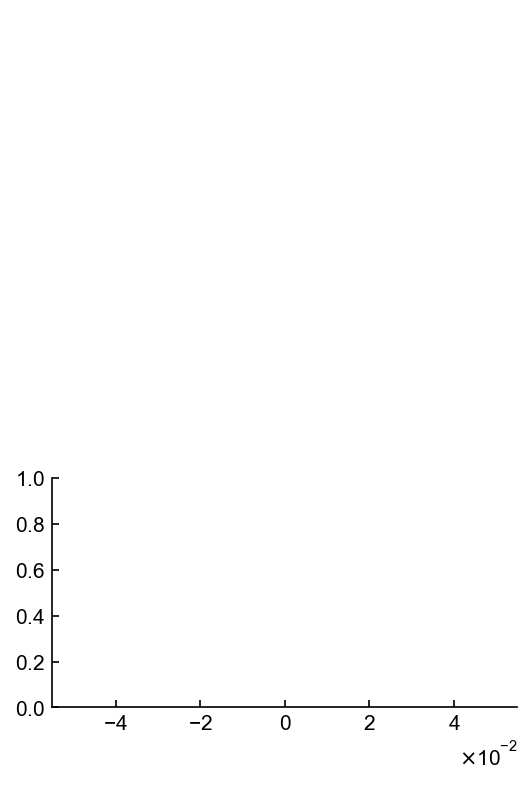

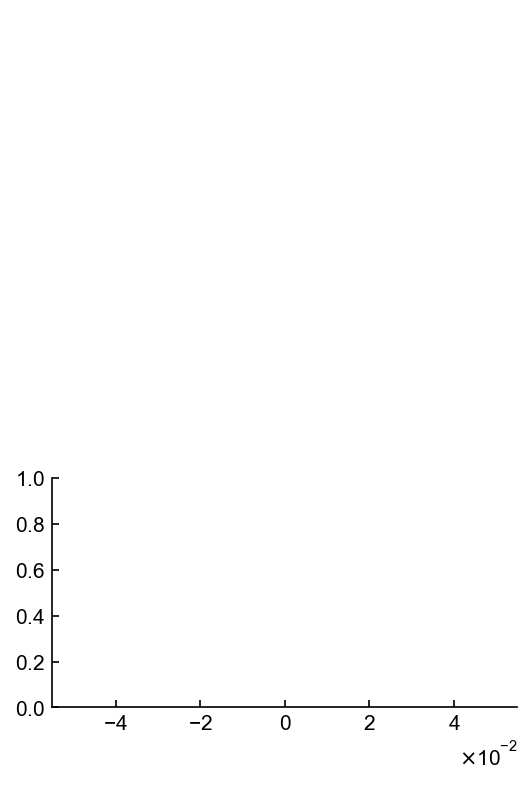

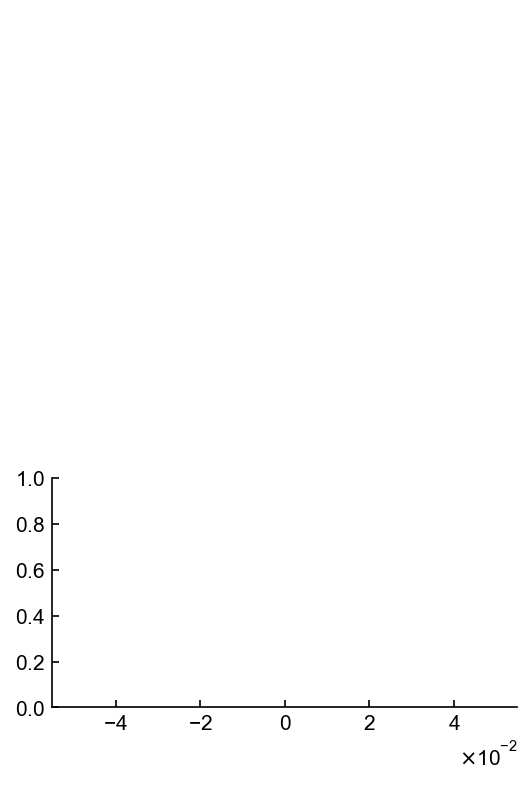

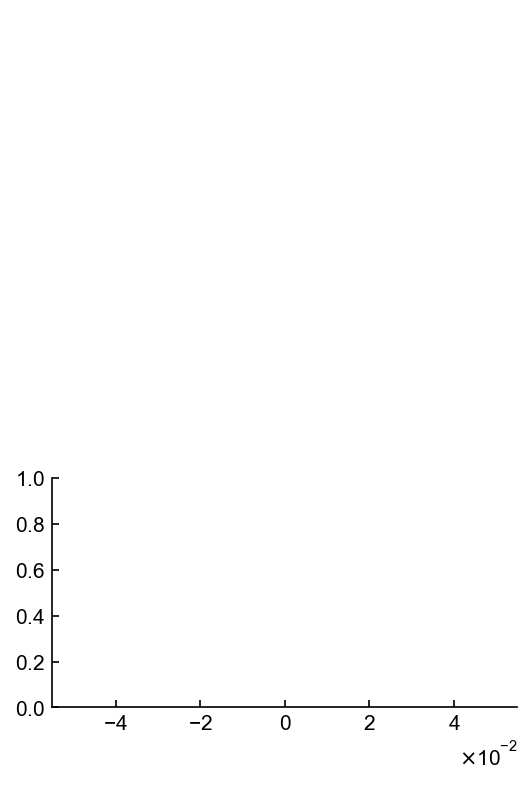

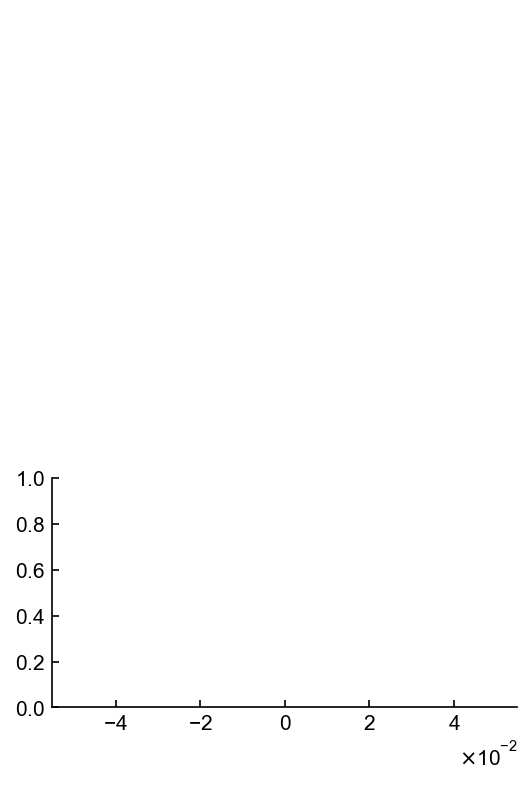

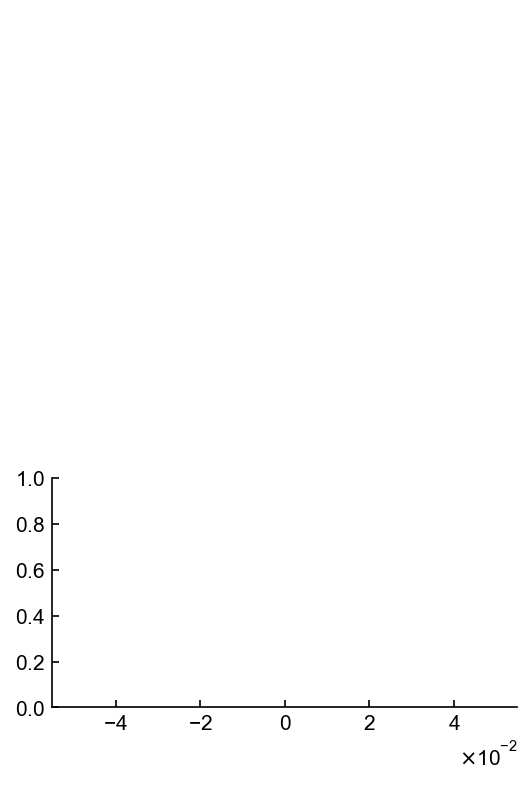

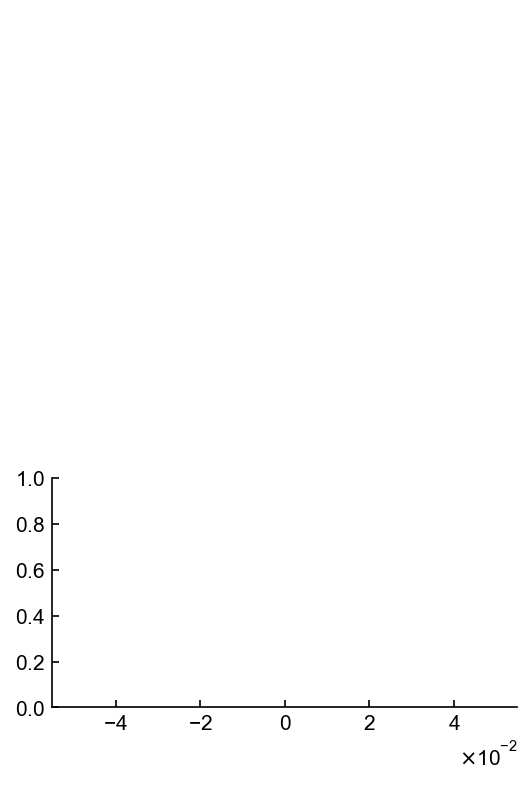

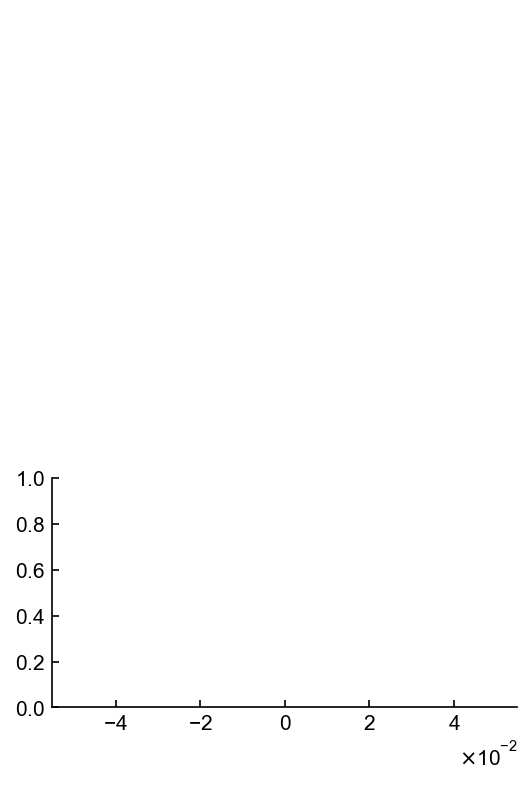

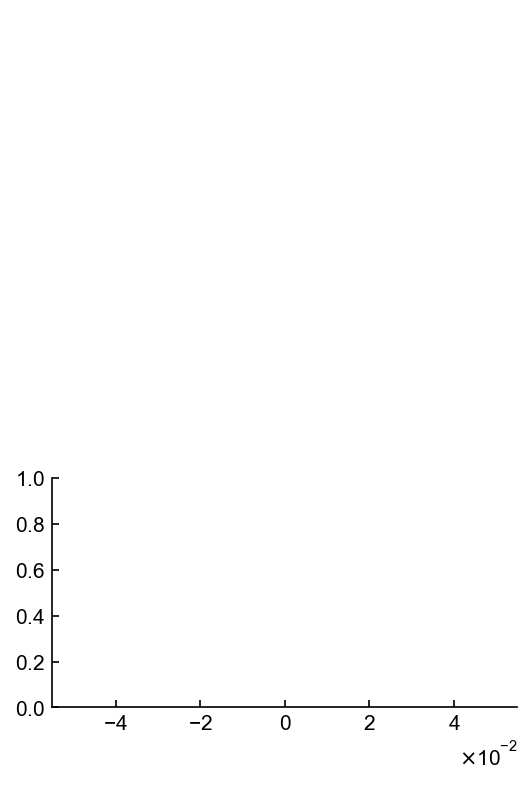

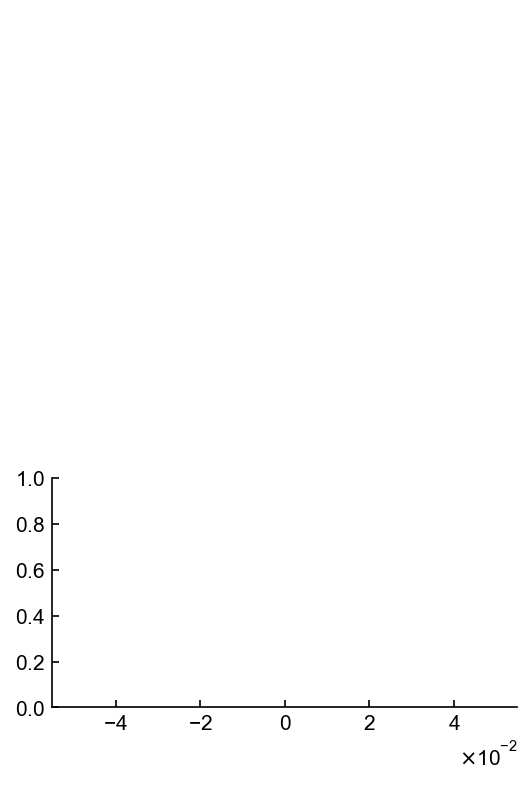

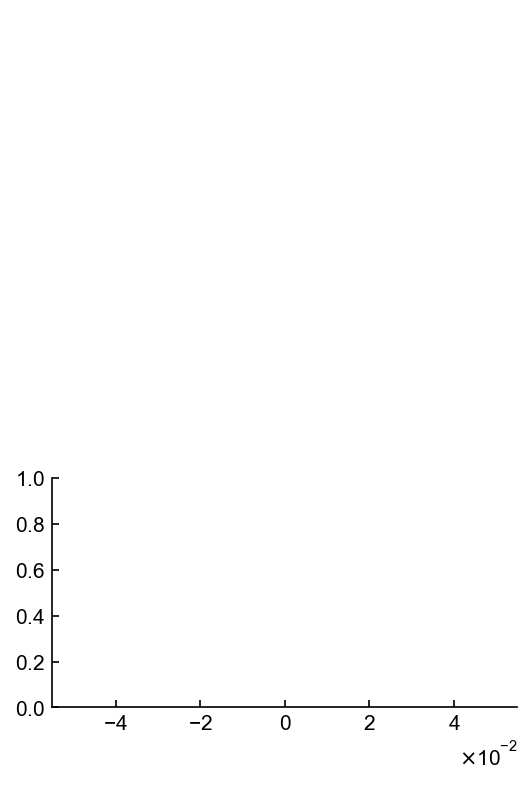

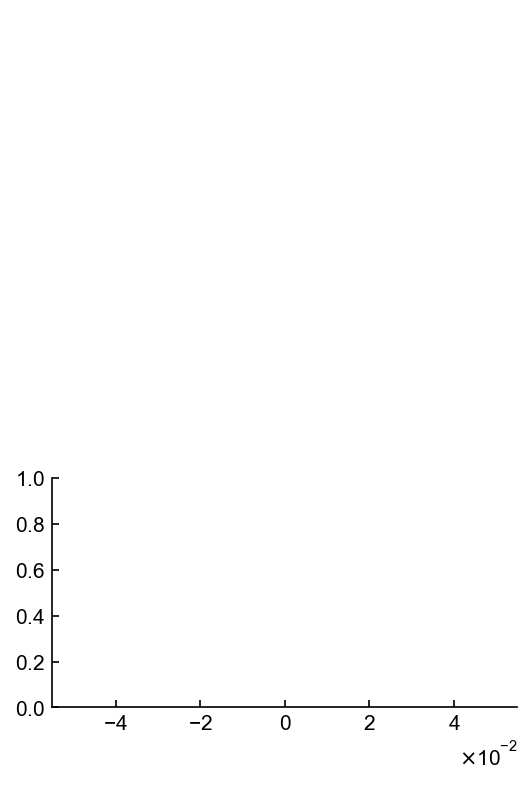

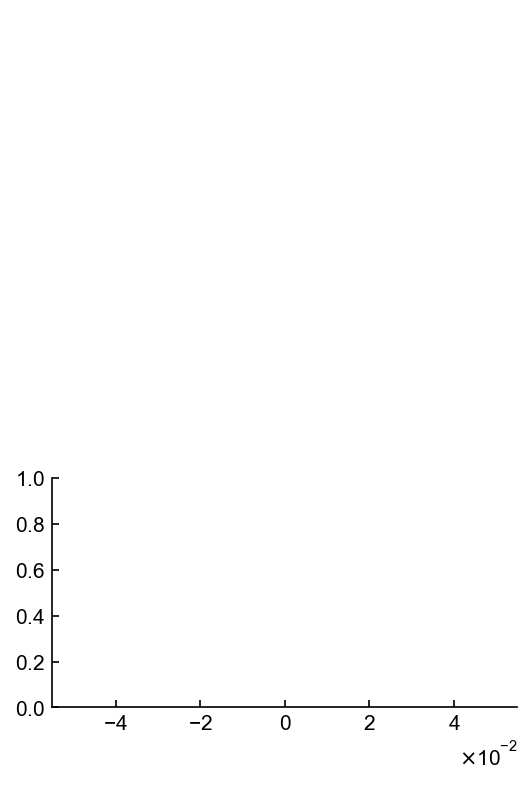

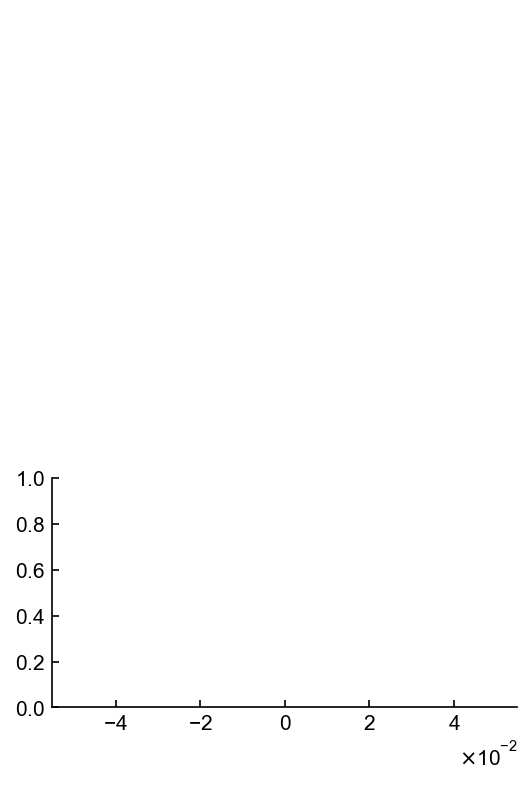

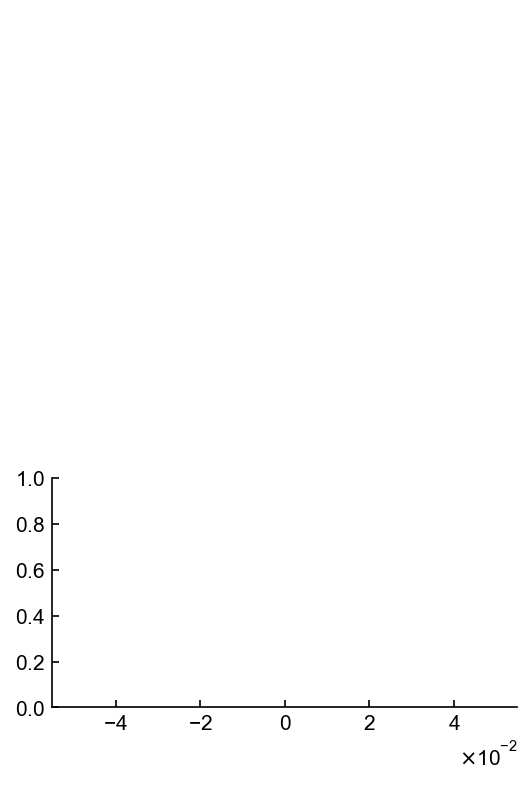

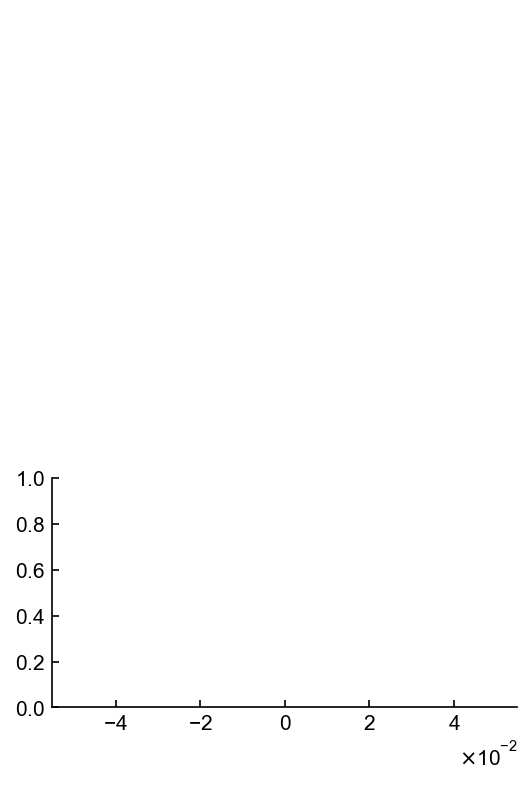

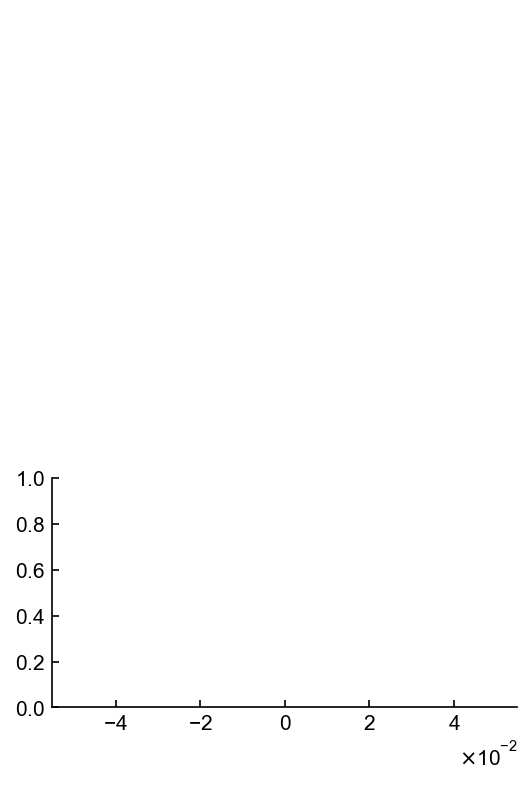

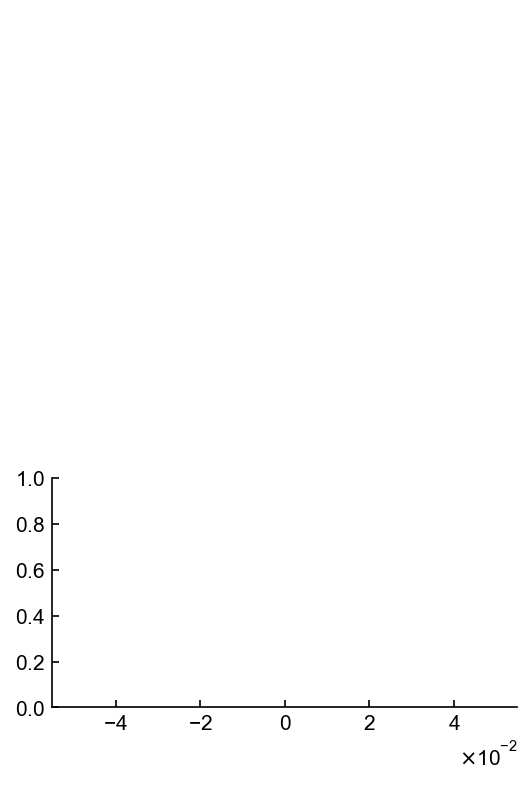

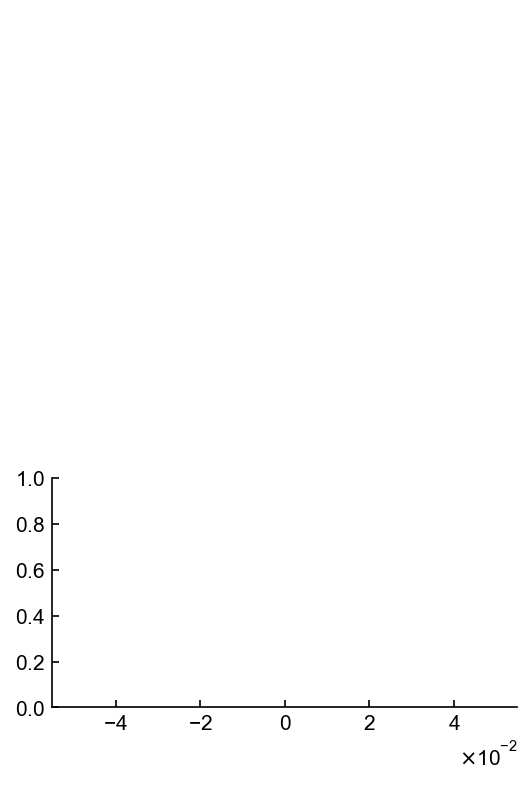

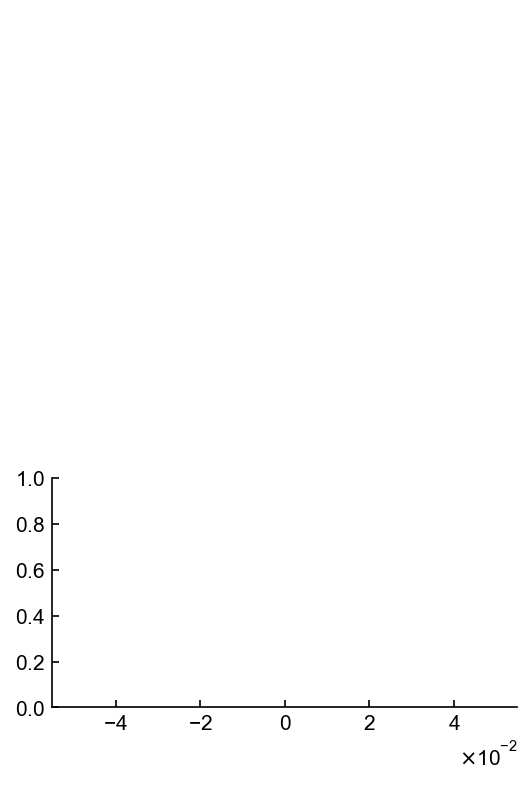

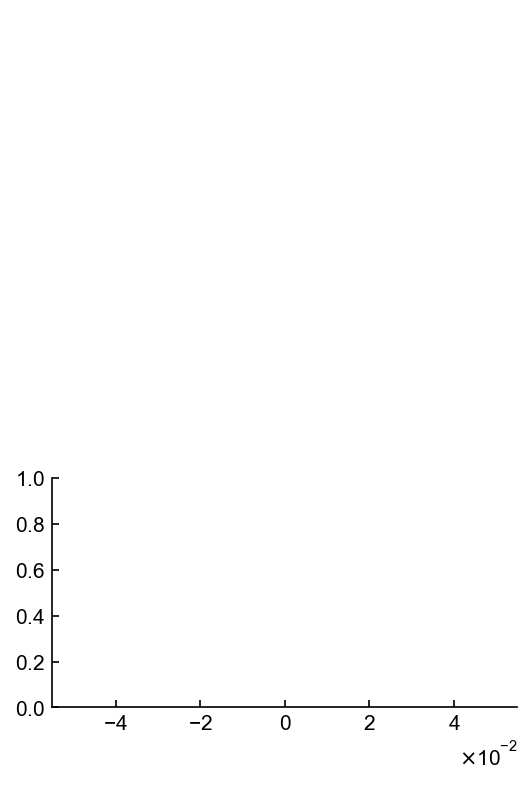

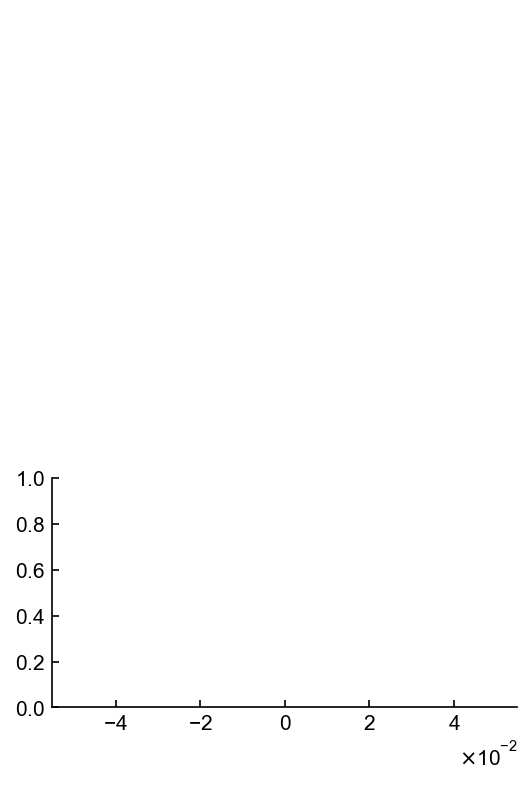

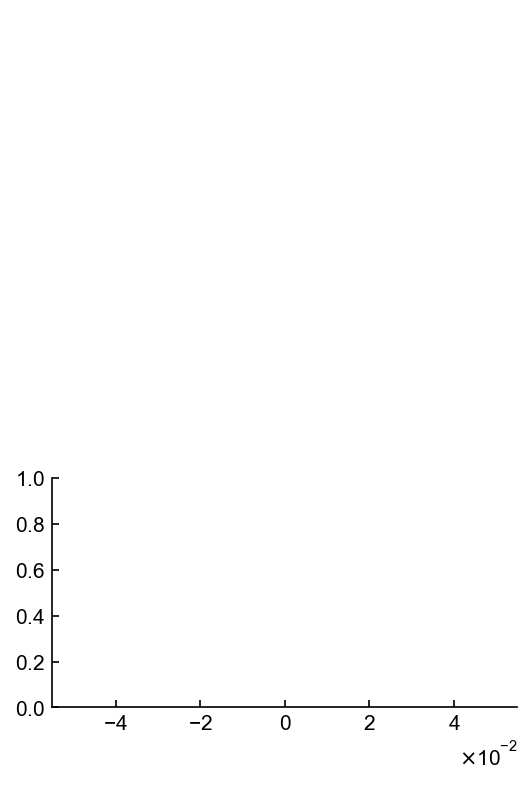

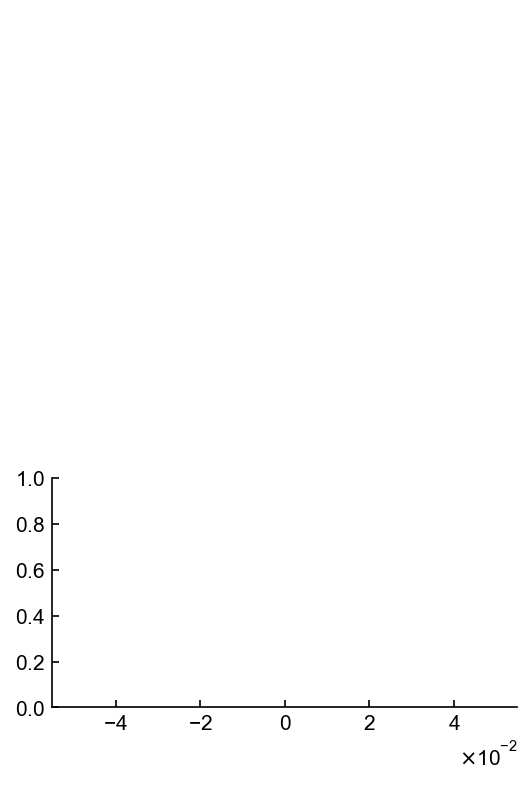

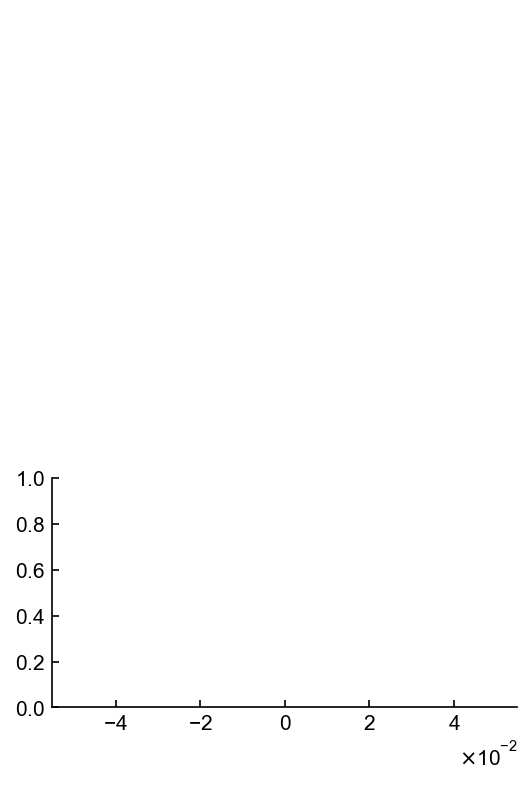

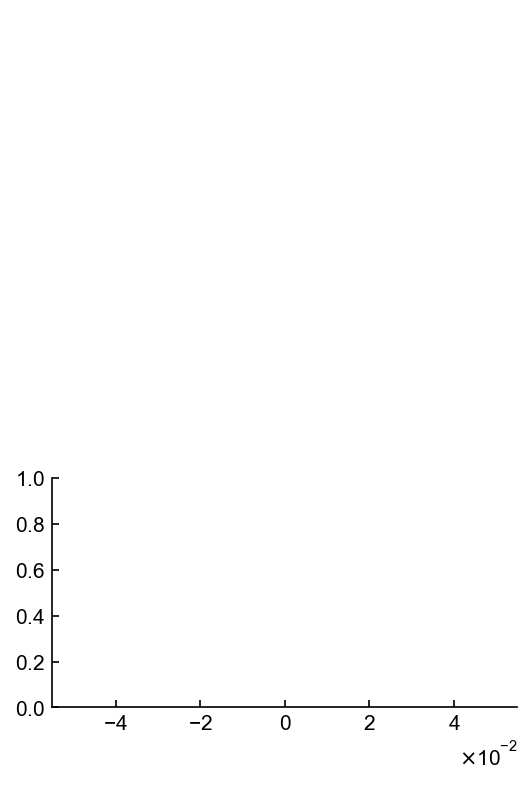

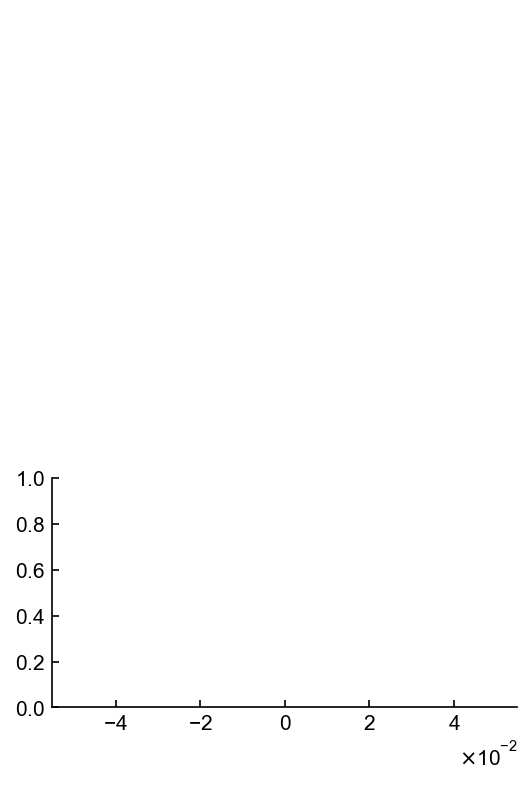

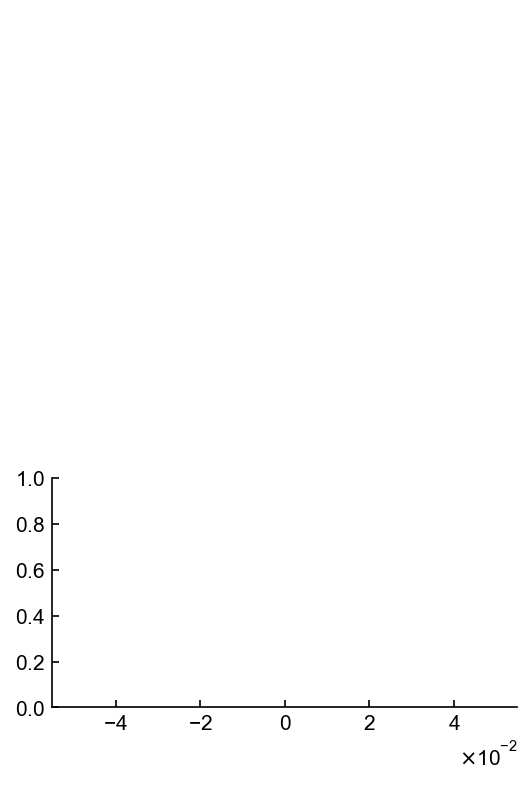

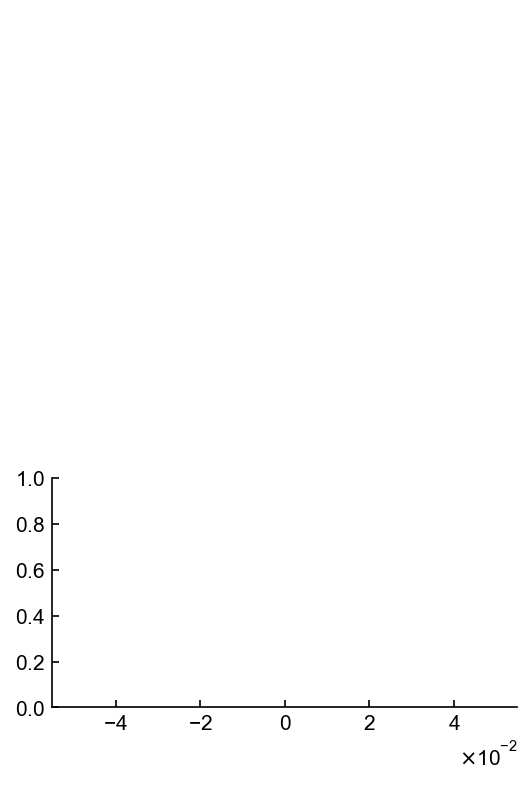

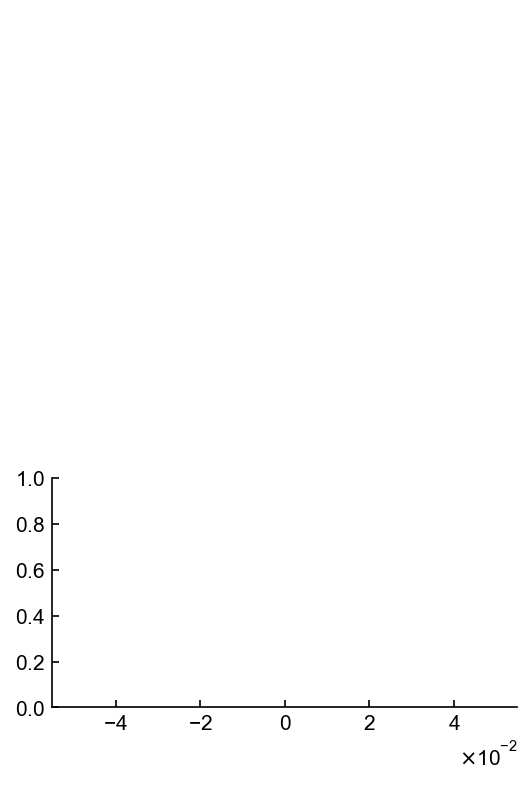

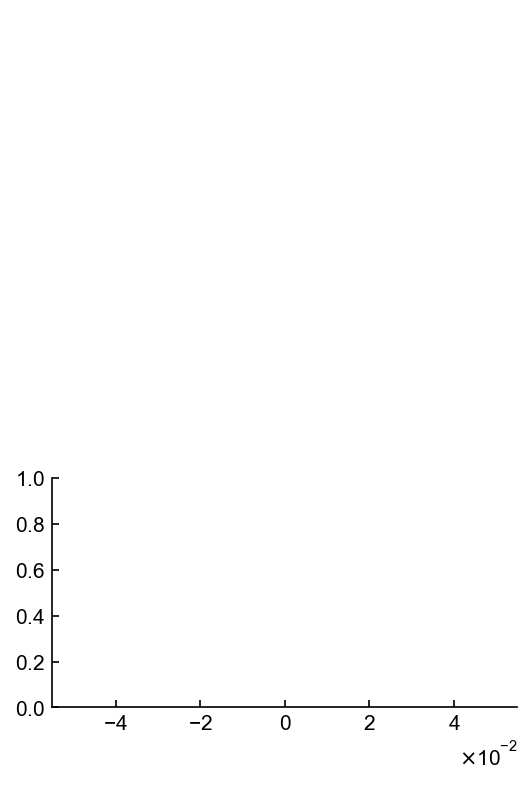

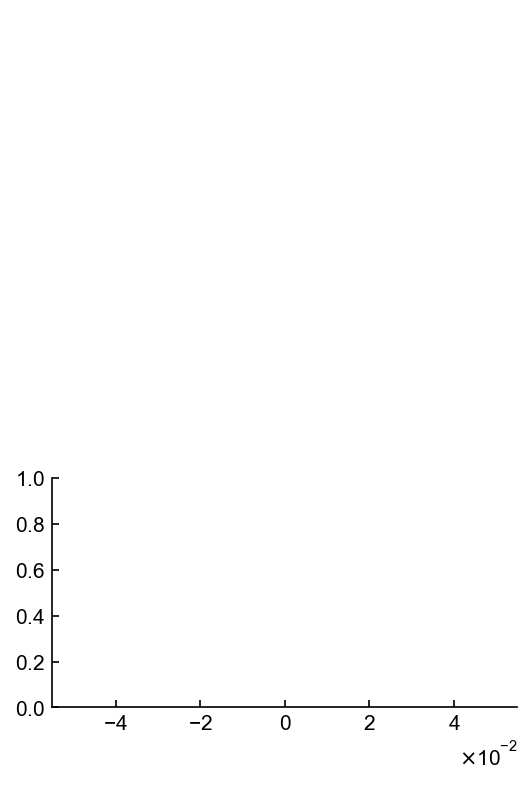

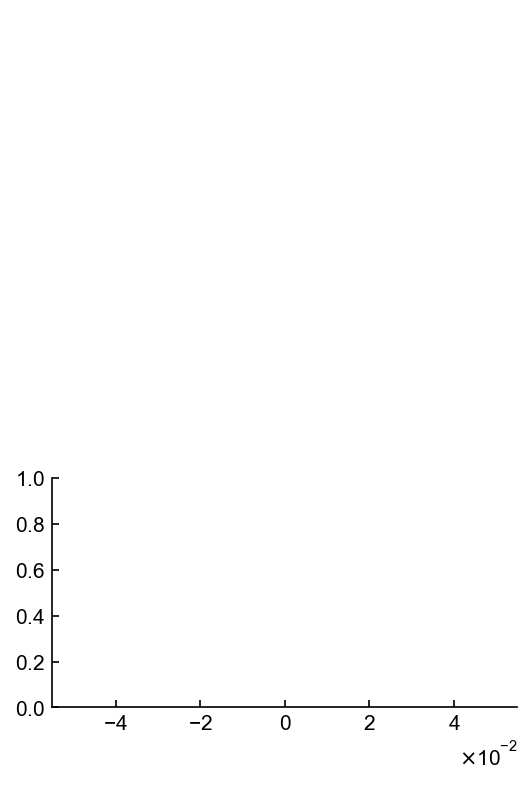

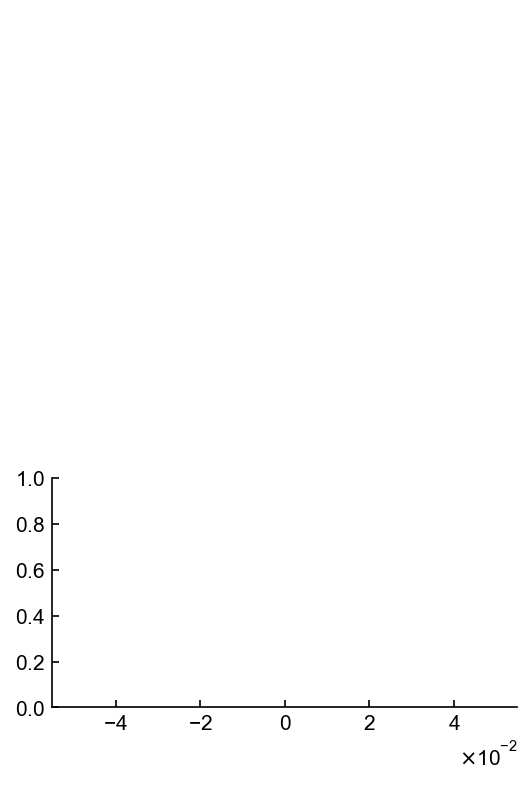

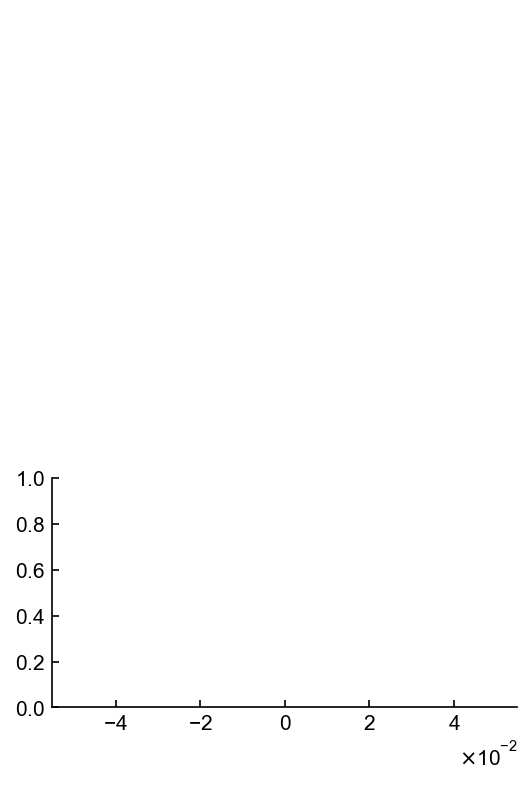

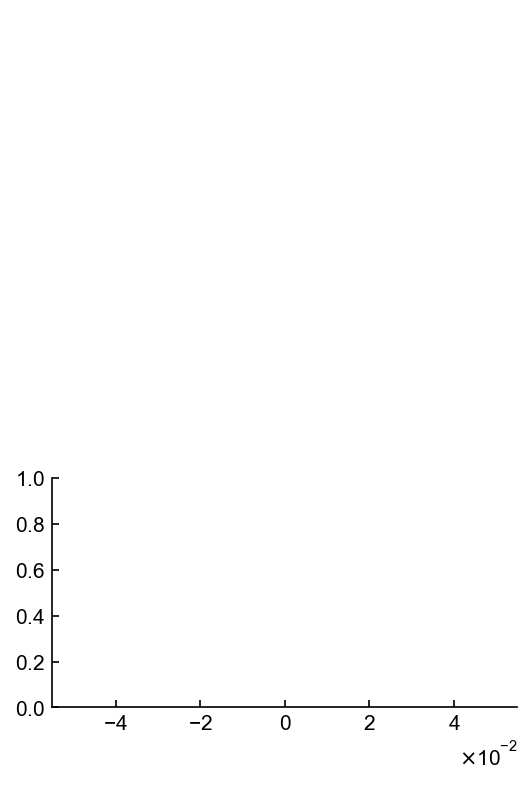

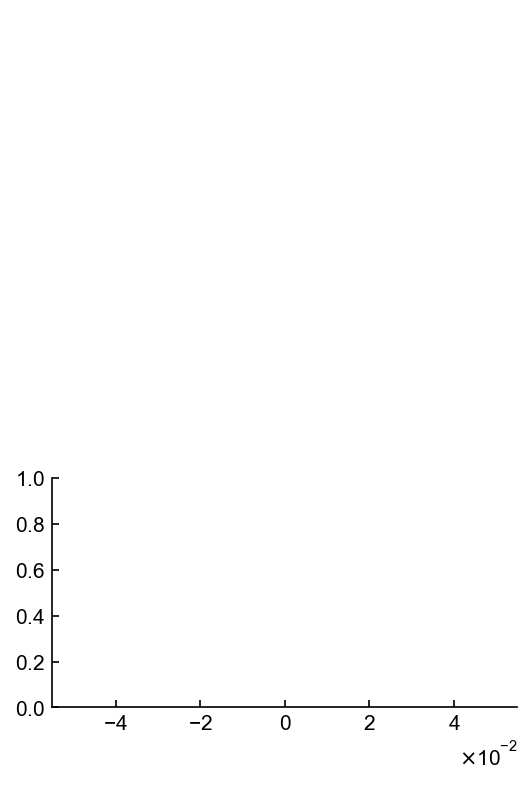

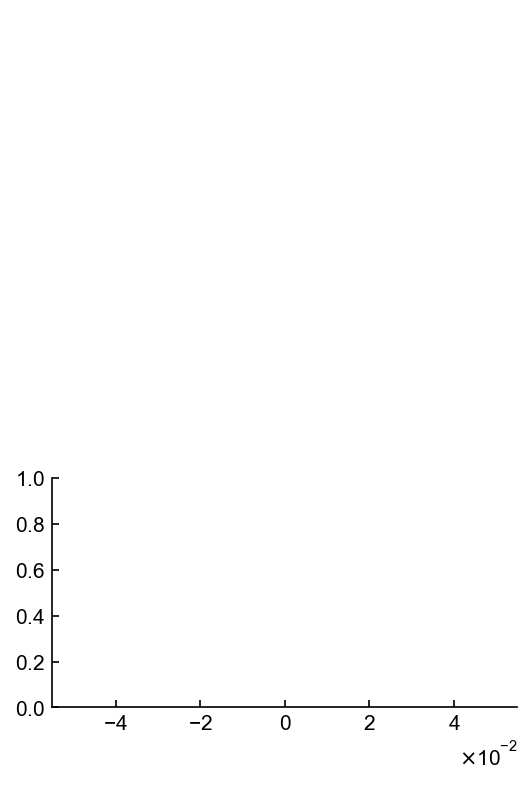

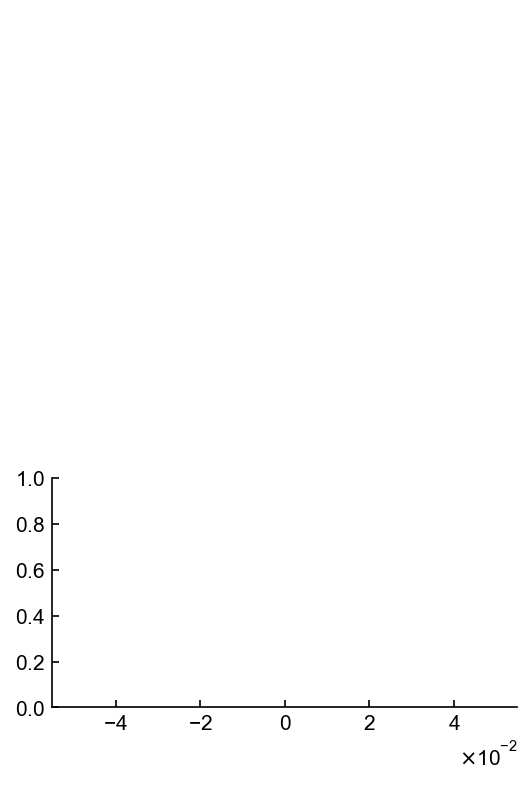

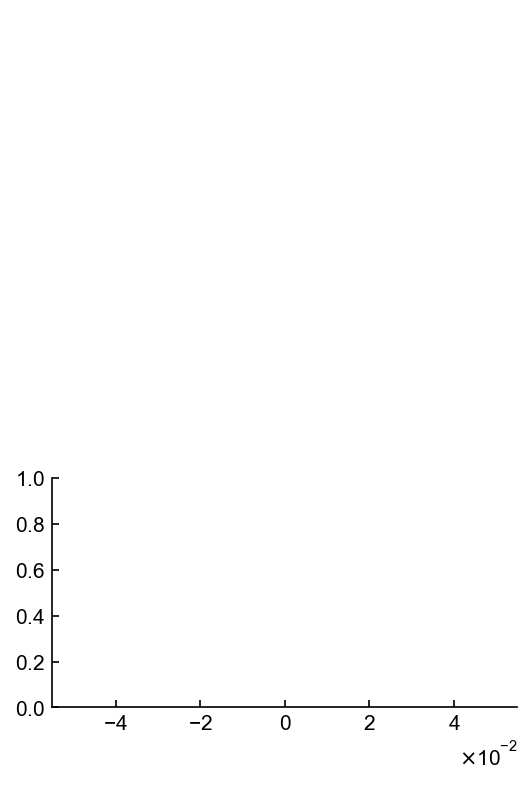

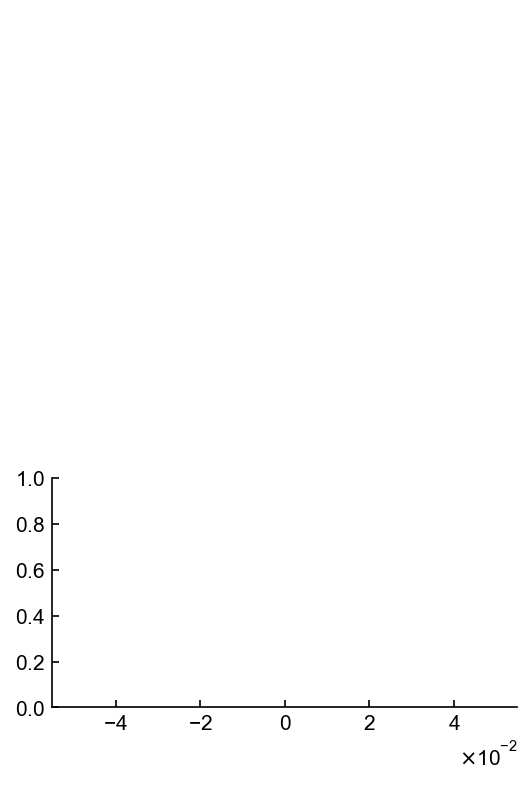

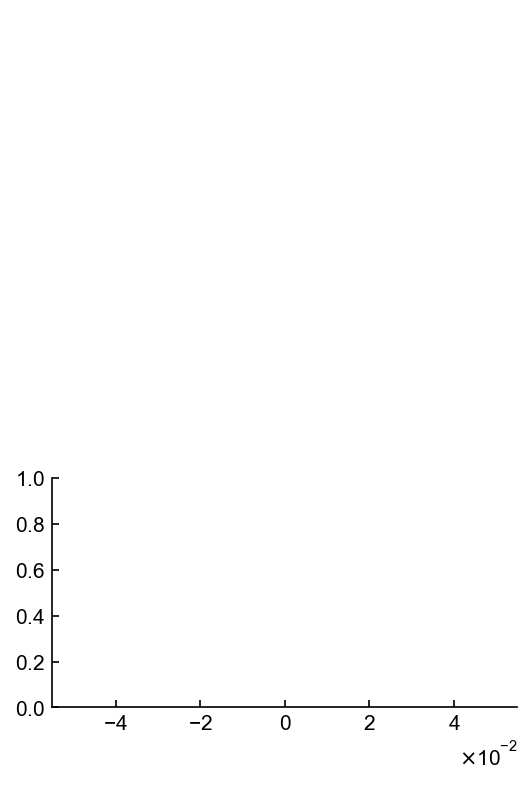

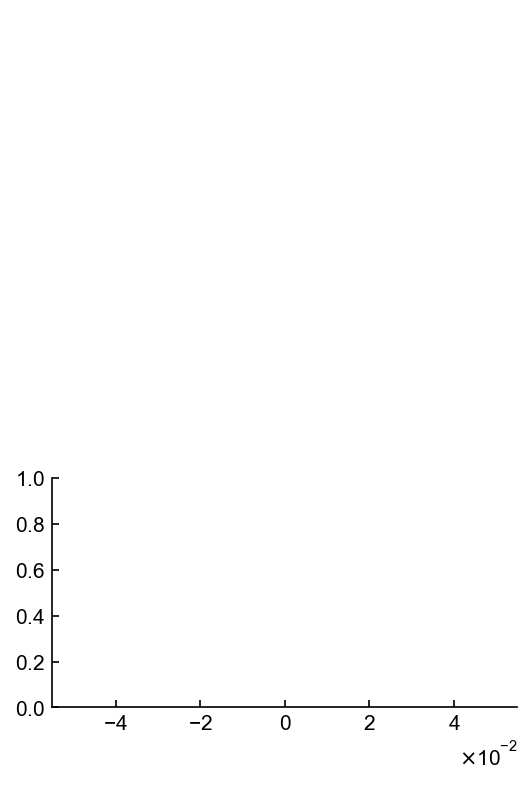

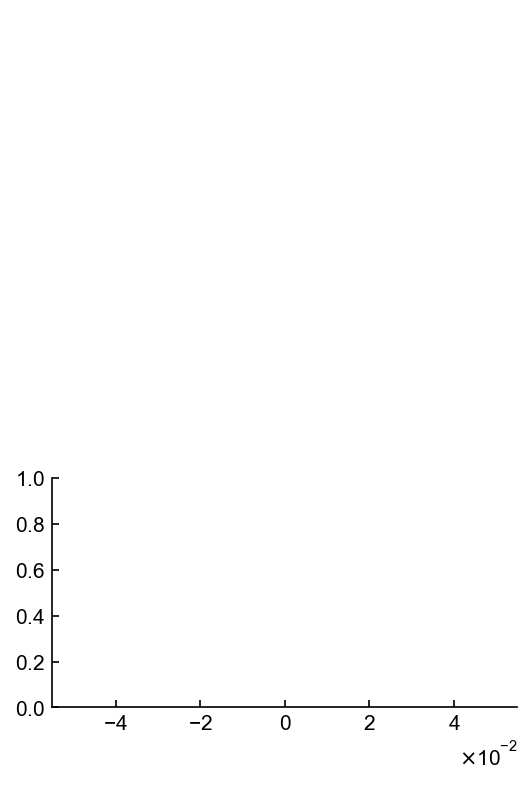

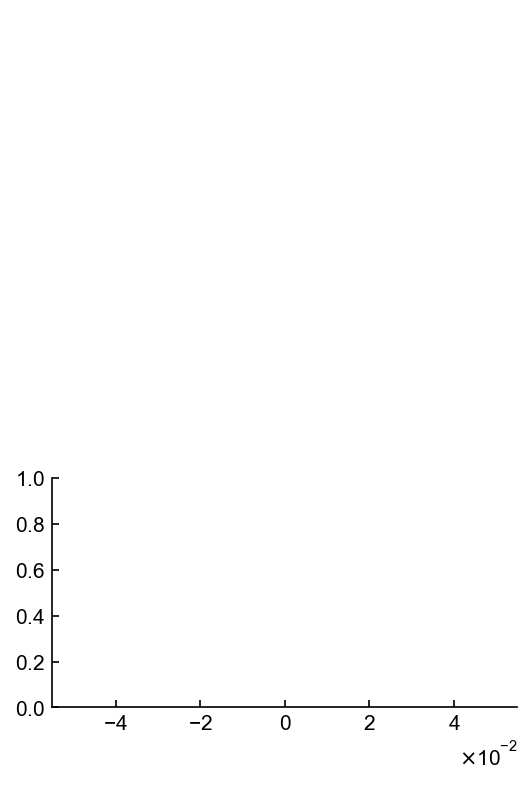

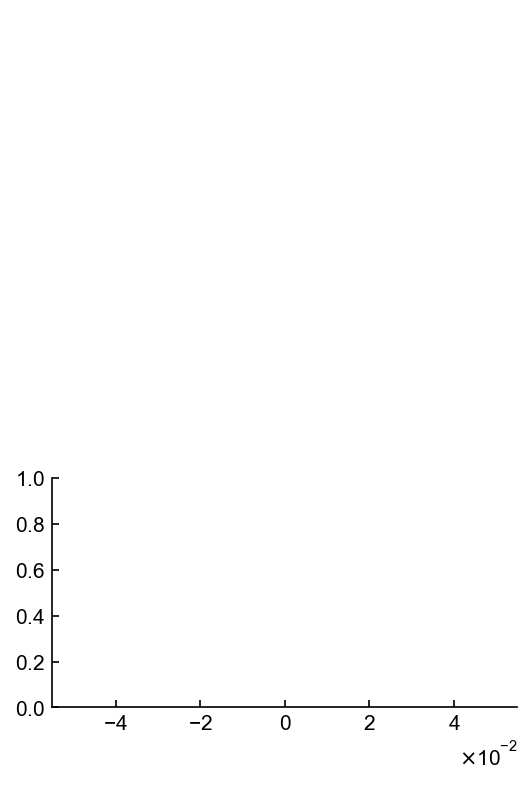

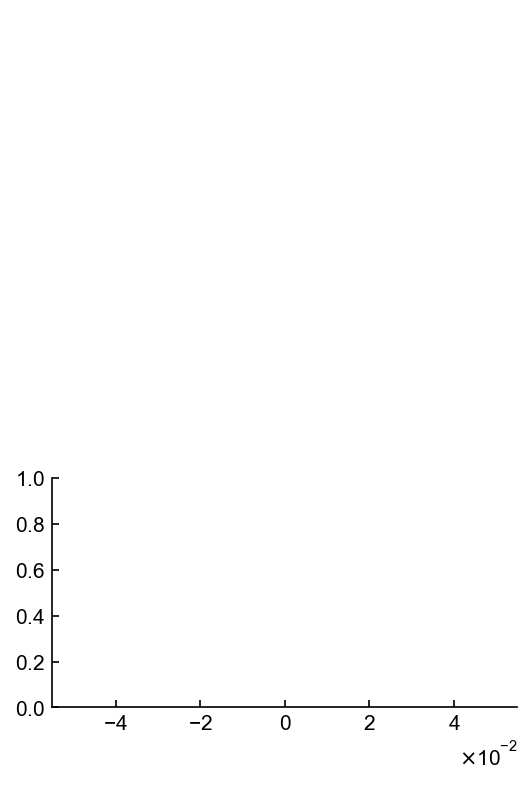

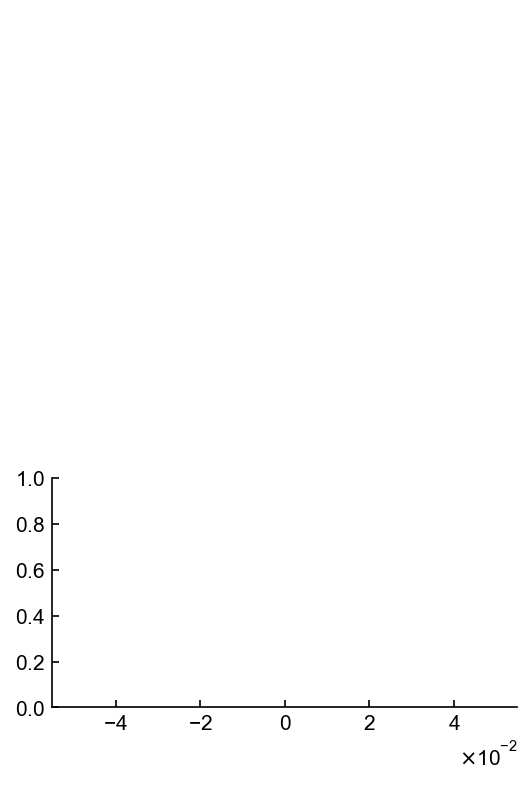

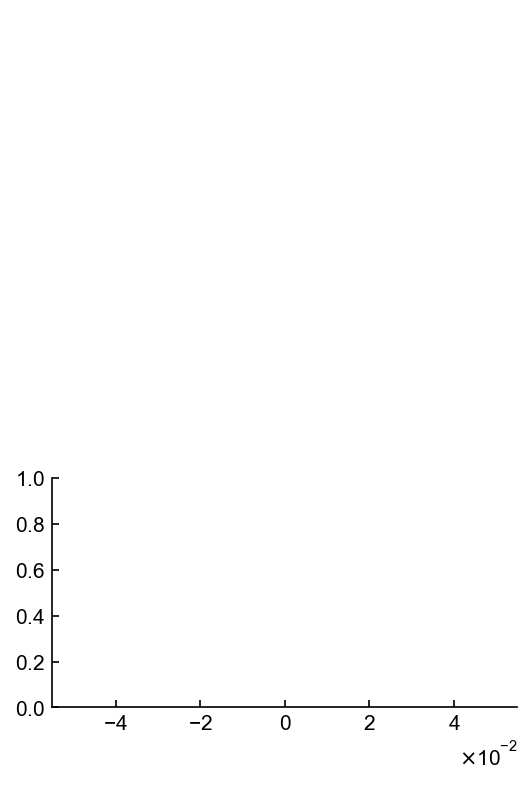

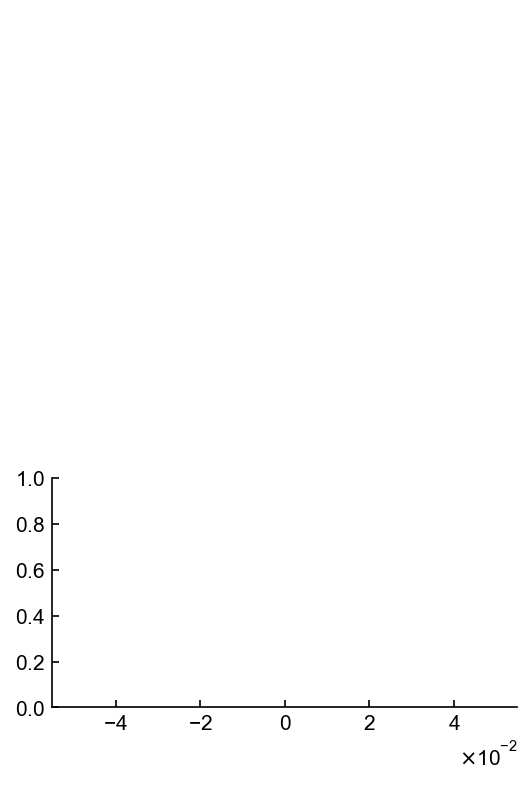

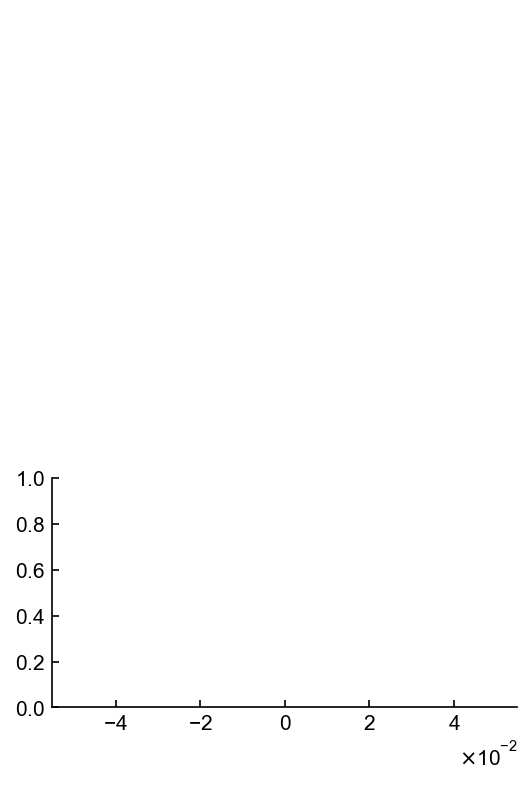

In [51]:
for session in AC_postexpert:
    session_AC = ilep.loadSessionCached(act_directory,session)
    sessionname = session
    
    clust_AC = session_AC.clusters.good
    for clust in clust_AC:
        visualizeClusterInternal(session_AC,clust,sessionname,'Postexpert')
        FRmod = visualizeClusterInternal(session_AC,clust,sessionname,'Postexpert')[-2]
        peak_time = visualizeClusterInternal(session_AC,clust,sessionname,'Postexpert')[-1]
        if FRmod>=AC_FRmod_baseline_median:
            AC_peaklatency_postexpert.append(peak_time)

In [52]:
AC_peaklatency = SimpleNamespace(prereversal_early=AC_peaklatency_preearly,
                      prereversal_late=AC_peaklatency_prelate,
                      prereversal_expert=AC_peaklatency_preexpert,
                      postreversal_early=AC_peaklatency_postearly,
                      postreversal_late=AC_peaklatency_postlate,
                      postreversal_expert=AC_peaklatency_postexpert
                     )

#Save to pickle
filename = 'C:\\Users\insan\\Desktop\\PHRC_Dual\\Peak_latency\\Stimulus\\AC\\AC_peaklatency.pickle'
with open(filename, 'wb') as f:
    pickle.dump(AC_peaklatency, f, protocol=pickle.HIGHEST_PROTOCOL)

### Analysis

In [72]:
print(len(AC_peaklatency.prereversal_early))
print(len(AC_peaklatency.prereversal_late))
print(len(AC_peaklatency.prereversal_expert))
print(len(AC_peaklatency.postreversal_early))
print(len(AC_peaklatency.postreversal_late))
print(len(AC_peaklatency.postreversal_expert))

75
73
47
248
106
93


In [73]:
print(len(M2_peaklatency.prereversal_early))
print(len(M2_peaklatency.prereversal_late))
print(len(M2_peaklatency.prereversal_expert))
print(len(M2_peaklatency.postreversal_early))
print(len(M2_peaklatency.postreversal_late))
print(len(M2_peaklatency.postreversal_expert))

80
81
100
148
90
127


In [70]:
AC_peaklatency_pre_early = np.array(AC_peaklatency.prereversal_early)
AC_peaklatency_pre_late = np.array(AC_peaklatency.prereversal_late)
AC_peaklatency_pre_expert = np.array(AC_peaklatency.prereversal_expert)

AC_peaklatency_post_early = np.array(AC_peaklatency.postreversal_early)
AC_peaklatency_post_late = np.array(AC_peaklatency.postreversal_late)
AC_peaklatency_post_expert = np.array(AC_peaklatency.postreversal_expert)

In [71]:
M2_peaklatency_pre_early = np.array(M2_peaklatency.prereversal_early)
M2_peaklatency_pre_late = np.array(M2_peaklatency.prereversal_late)
M2_peaklatency_pre_expert = np.array(M2_peaklatency.prereversal_expert)

M2_peaklatency_post_early = np.array(M2_peaklatency.postreversal_early)
M2_peaklatency_post_late = np.array(M2_peaklatency.postreversal_late)
M2_peaklatency_post_expert = np.array(M2_peaklatency.postreversal_expert)

In [97]:
AC_peaklatency_onset_preearly = AC_peaklatency_pre_early[AC_peaklatency_pre_early<=100]
AC_peaklatency_onset_prelate = AC_peaklatency_pre_late[AC_peaklatency_pre_late<=100]
AC_peaklatency_onset_preexpert = AC_peaklatency_pre_expert[AC_peaklatency_pre_expert<=100]
AC_peaklatency_onset_postearly = AC_peaklatency_post_early[AC_peaklatency_post_early<=100]
AC_peaklatency_onset_postlate = AC_peaklatency_post_late[AC_peaklatency_post_late<=100]
AC_peaklatency_onset_postexpert = AC_peaklatency_post_expert[AC_peaklatency_post_expert<=100]

M2_peaklatency_onset_preearly = M2_peaklatency_pre_early[M2_peaklatency_pre_early<=100]
M2_peaklatency_onset_prelate = M2_peaklatency_pre_late[M2_peaklatency_pre_late<=100]
M2_peaklatency_onset_preexpert = M2_peaklatency_pre_expert[M2_peaklatency_pre_expert<=100]
M2_peaklatency_onset_postearly = M2_peaklatency_post_early[M2_peaklatency_post_early<=100]
M2_peaklatency_onset_postlate = M2_peaklatency_post_late[M2_peaklatency_post_late<=100]
M2_peaklatency_onset_postexpert = M2_peaklatency_post_expert[M2_peaklatency_post_expert<=100]

In [102]:
AC_preearly_per_onset = len(AC_peaklatency_onset_preearly)/len(AC_peaklatency_pre_early)*100
AC_prelate_per_onset = len(AC_peaklatency_onset_prelate)/len(AC_peaklatency_pre_late)*100
AC_preexpert_per_onset = len(AC_peaklatency_onset_preexpert)/len(AC_peaklatency_pre_expert)*100
AC_postearly_per_onset = len(AC_peaklatency_onset_postearly)/len(AC_peaklatency_post_early)*100
AC_postlate_per_onset = len(AC_peaklatency_onset_postlate)/len(AC_peaklatency_post_late)*100
AC_postexpert_per_onset = len(AC_peaklatency_onset_postexpert)/len(AC_peaklatency_post_expert)*100

M2_preearly_per_onset = len(M2_peaklatency_onset_preearly)/len(M2_peaklatency_pre_early)*100
M2_prelate_per_onset = len(M2_peaklatency_onset_prelate)/len(M2_peaklatency_pre_late)*100
M2_preexpert_per_onset = len(M2_peaklatency_onset_preexpert)/len(M2_peaklatency_pre_expert)*100
M2_postearly_per_onset = len(M2_peaklatency_onset_postearly)/len(M2_peaklatency_post_early)*100
M2_postlate_per_onset = len(M2_peaklatency_onset_postlate)/len(M2_peaklatency_post_late)*100
M2_postexpert_per_onset = len(M2_peaklatency_onset_postexpert)/len(M2_peaklatency_post_expert)*100

In [115]:
AC_peaklatency_offset_preearly = AC_peaklatency_pre_early[AC_peaklatency_pre_early>100]
AC_peaklatency_offset_prelate = AC_peaklatency_pre_late[AC_peaklatency_pre_late>100]
AC_peaklatency_offset_preexpert = AC_peaklatency_pre_expert[AC_peaklatency_pre_expert>100]
AC_peaklatency_offset_postearly = AC_peaklatency_post_early[AC_peaklatency_post_early>100]
AC_peaklatency_offset_postlate = AC_peaklatency_post_late[AC_peaklatency_post_late>100]
AC_peaklatency_offset_postexpert = AC_peaklatency_post_expert[AC_peaklatency_post_expert>100]

M2_peaklatency_offset_preearly = M2_peaklatency_pre_early[M2_peaklatency_pre_early>100]
M2_peaklatency_offset_prelate = M2_peaklatency_pre_late[M2_peaklatency_pre_late>100]
M2_peaklatency_offset_preexpert = M2_peaklatency_pre_expert[M2_peaklatency_pre_expert>100]
M2_peaklatency_offset_postearly = M2_peaklatency_post_early[M2_peaklatency_post_early>100]
M2_peaklatency_offset_postlate = M2_peaklatency_post_late[M2_peaklatency_post_late>100]
M2_peaklatency_offset_postexpert = M2_peaklatency_post_expert[M2_peaklatency_post_expert>100]

In [121]:
M2_peaklatency_offset_preearly

array([156, 102, 107, 105, 228, 119, 144, 130, 110, 153, 130, 139, 155,
       122, 132, 364, 103, 121, 330, 703, 110, 135, 194, 142, 203, 999,
       110, 452, 231, 120, 202, 171, 358, 661, 197, 193, 283, 153, 115,
       141, 140, 153, 127, 102, 108, 975, 223, 137, 101, 408, 169, 228,
       140, 255, 165, 143, 127, 191, 423, 119, 111, 122, 134, 128, 124],
      dtype=int64)

### latency fig

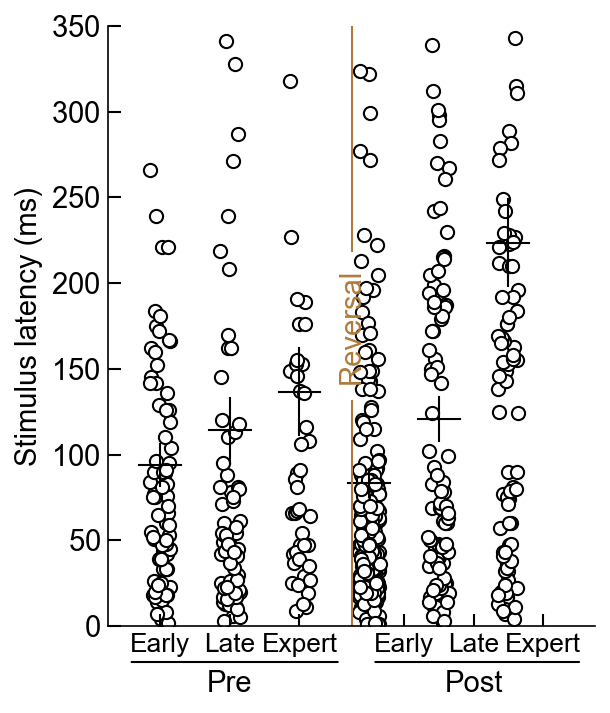

In [157]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure
data = [AC_peaklatency_pre_early,AC_peaklatency_pre_late,AC_peaklatency_pre_expert,AC_peaklatency_post_early,AC_peaklatency_post_late,AC_peaklatency_post_expert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#Plot summary
for idx,column in enumerate(data):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    
    
    mean = np.mean(Y)
    SEM = sem(Y)

    ax.scatter(X-switch_offset,Y,s=40,color='white',edgecolor='black')
        
    ax.plot([idx-switch_offset-width,idx-switch_offset+width],[mean]*2,color='k',lw=1, clip_on = False)
    ax.plot([idx-switch_offset]*2,[mean-SEM,mean+SEM],color='k',lw=1, clip_on = False)



################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,350])
#ax.set_yticks([40,50,60.100])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('Stimulus latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

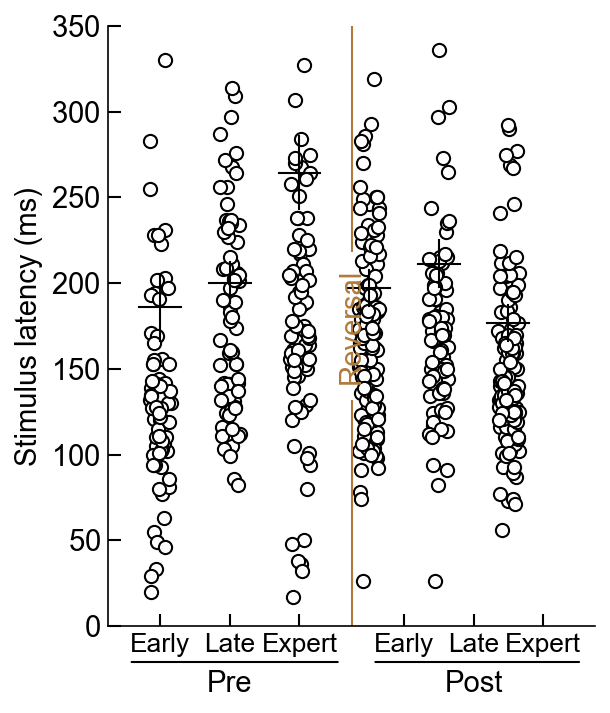

In [156]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure
data = [M2_peaklatency_pre_early,M2_peaklatency_pre_late,M2_peaklatency_pre_expert,M2_peaklatency_post_early,M2_peaklatency_post_late,M2_peaklatency_post_expert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#Plot summary
for idx,column in enumerate(data):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    
    
    mean = np.mean(Y)
    SEM = sem(Y)

    ax.scatter(X-switch_offset,Y,s=40,color='white',edgecolor='black')
        
    ax.plot([idx-switch_offset-width,idx-switch_offset+width],[mean]*2,color='k',lw=1, clip_on = False)
    ax.plot([idx-switch_offset]*2,[mean-SEM,mean+SEM],color='k',lw=1, clip_on = False)



################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,350])
#ax.set_yticks([40,50,60.100])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('Stimulus latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

### Onset latency fig

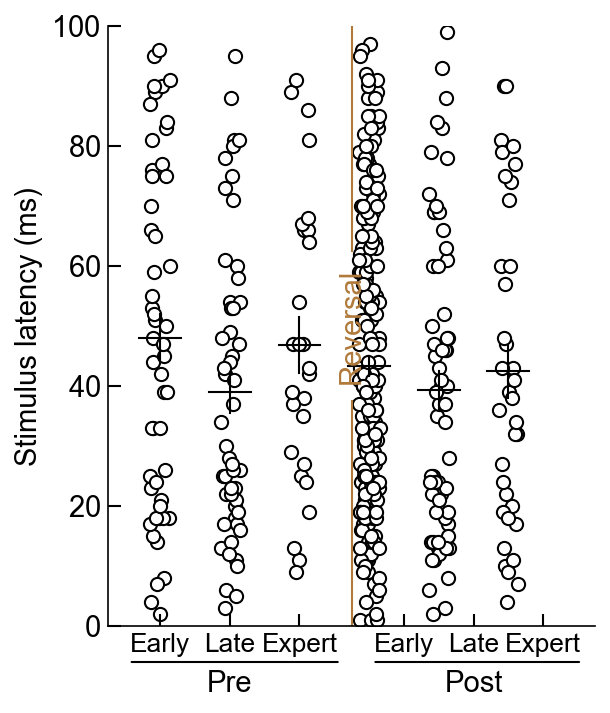

In [159]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure
data = [AC_peaklatency_onset_preearly,AC_peaklatency_onset_prelate,AC_peaklatency_onset_preexpert,AC_peaklatency_onset_postearly,AC_peaklatency_onset_postlate,AC_peaklatency_onset_postexpert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#Plot summary
for idx,column in enumerate(data):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    
    
    mean = np.mean(Y)
    SEM = sem(Y)

    ax.scatter(X-switch_offset,Y,s=40,color='white',edgecolor='black')
        
    ax.plot([idx-switch_offset-width,idx-switch_offset+width],[mean]*2,color='k',lw=1, clip_on = False)
    ax.plot([idx-switch_offset]*2,[mean-SEM,mean+SEM],color='k',lw=1, clip_on = False)



################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,100])
#ax.set_yticks([40,50,60.100])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('Stimulus latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

In [ ]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure
data = [AC_peaklatency_pre_early,AC_peaklatency_pre_late,AC_peaklatency_pre_expert,AC_peaklatency_post_early,AC_peaklatency_post_late,AC_peaklatency_post_expert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#Plot summary
for idx,column in enumerate(data):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    
    
    mean = np.mean(Y)
    SEM = sem(Y)

    ax.scatter(X-switch_offset,Y,s=40,color='white',edgecolor='black')
        
    ax.plot([idx-switch_offset-width,idx-switch_offset+width],[mean]*2,color='k',lw=1, clip_on = False)
    ax.plot([idx-switch_offset]*2,[mean-SEM,mean+SEM],color='k',lw=1, clip_on = False)



################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,350])
#ax.set_yticks([40,50,60.100])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('Stimulus latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

meta NOT subset; don't know how to subset; dropped


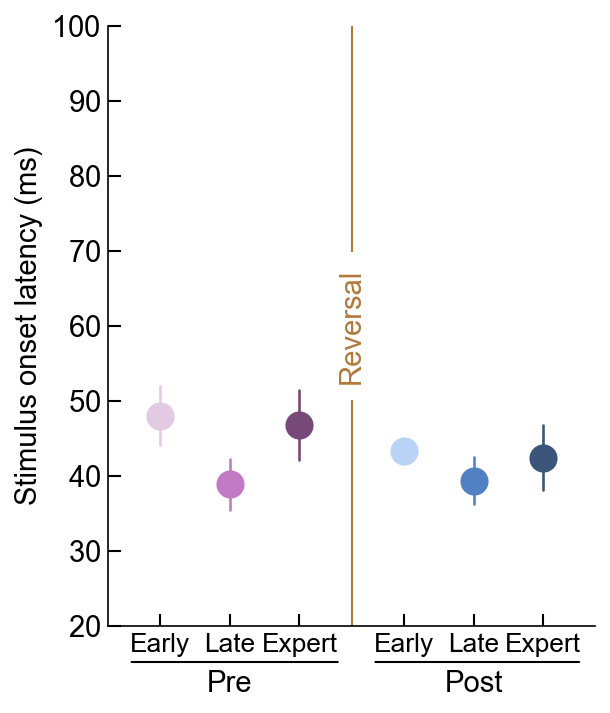

In [147]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [AC_peaklatency_onset_preearly,AC_peaklatency_onset_prelate,AC_peaklatency_onset_preexpert,AC_peaklatency_onset_postearly,AC_peaklatency_onset_postlate,AC_peaklatency_onset_postexpert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([20,100])
#ax.set_yticks([40,50,60.100])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('Stimulus onset latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Peak_latency\\AC stimulus onset latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


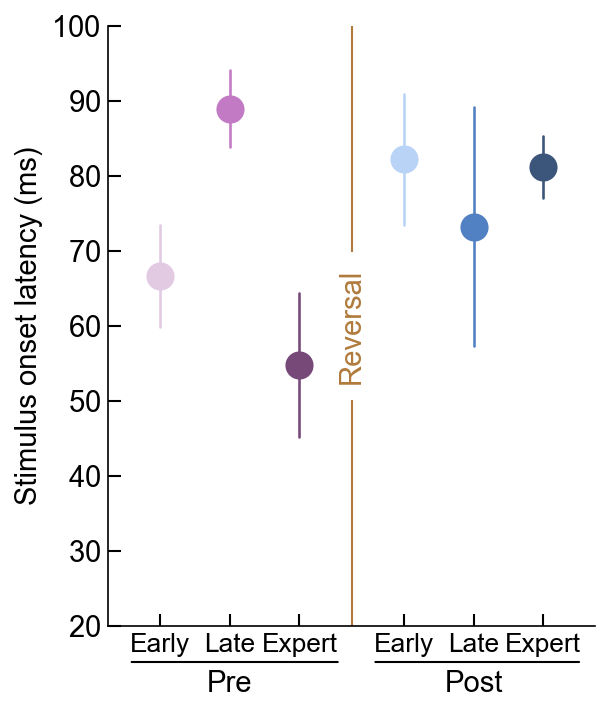

In [148]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

#data = [M2_peaklatency_pre_early,M2_peaklatency_pre_late,M2_peaklatency_pre_expert,M2_peaklatency_post_early,M2_peaklatency_post_late,M2_peaklatency_post_expert]
data = [M2_peaklatency_onset_preearly,M2_peaklatency_onset_prelate,M2_peaklatency_onset_preexpert,M2_peaklatency_onset_postearly,M2_peaklatency_onset_postlate,M2_peaklatency_onset_postexpert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([20,100])
#ax.set_yticks([0,40,80,120])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('Stimulus onset latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Peak_latency\\M2 stimulus onset latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

### Percentage fig

meta NOT subset; don't know how to subset; dropped


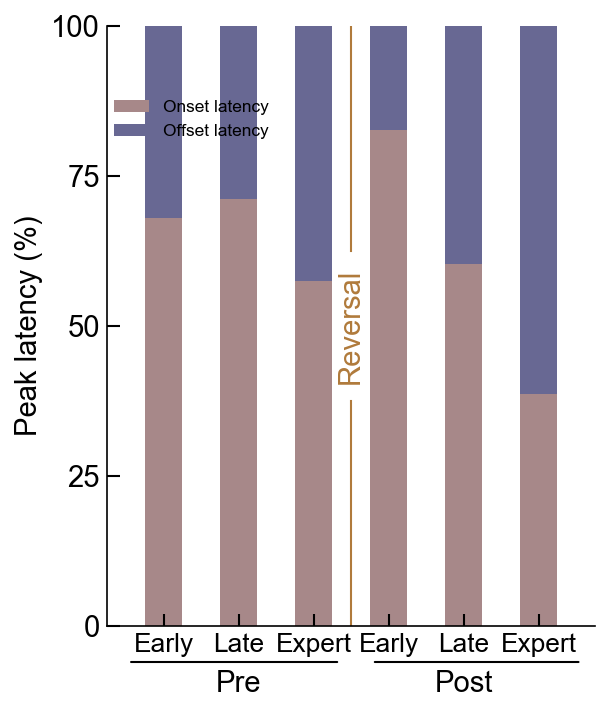

In [112]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
################################################################################################################

#Plot figure
labels = ['Early','Late','Expert','Early','Late','Expert']

onset = [AC_preearly_per_onset,AC_prelate_per_onset,AC_preexpert_per_onset,AC_postearly_per_onset,AC_postlate_per_onset,AC_postexpert_per_onset]
offset = [100-AC_preearly_per_onset,100-AC_prelate_per_onset,100-AC_preexpert_per_onset,100-AC_postearly_per_onset,100-AC_postlate_per_onset,100-AC_postexpert_per_onset]

ax.bar(range(len(labels)),onset,label = 'Onset latency',width = 0.5, color='#A78889')
ax.bar(range(len(labels)),offset, bottom = onset, label = 'Offset latency',width = 0.5,  color='#686893')
    
################################################################################################################


ax.set_ylim([0,100])
ax.set_yticks([0,25,50,75,100])
ax.set_yticklabels(['0','25','50','75','100'])
ylab = ax.set_ylabel('Peak latency (%)')
ax.legend(frameon=False,loc=(0,0.8))

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Peak_latency\\Stimulus\\AC stimulus latency percentage.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


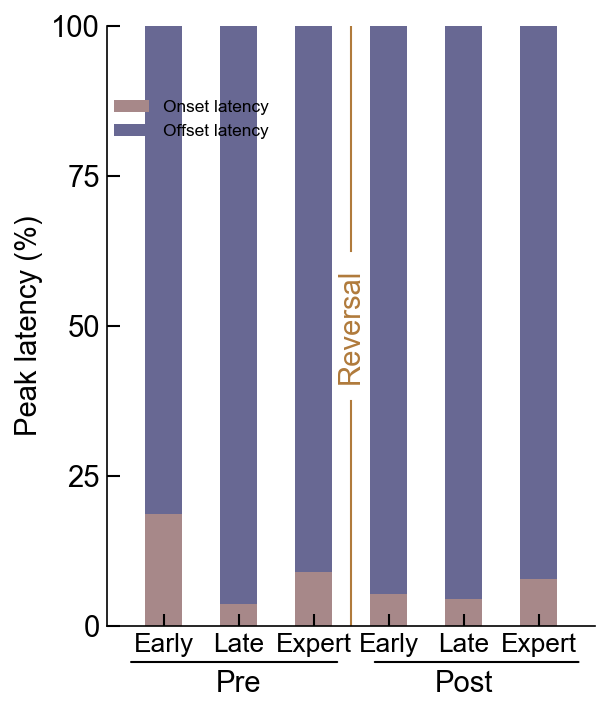

In [113]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
################################################################################################################

#Plot figure
labels = ['Early','Late','Expert','Early','Late','Expert']

onset = [M2_preearly_per_onset,M2_prelate_per_onset,M2_preexpert_per_onset,M2_postearly_per_onset,M2_postlate_per_onset,M2_postexpert_per_onset]
offset = [100-M2_preearly_per_onset,100-M2_prelate_per_onset,100-M2_preexpert_per_onset,100-M2_postearly_per_onset,100-M2_postlate_per_onset,100-M2_postexpert_per_onset]

ax.bar(range(len(labels)),onset,label = 'Onset latency',width = 0.5, color='#A78889')
ax.bar(range(len(labels)),offset, bottom = onset, label = 'Offset latency',width = 0.5,  color='#686893')
    
################################################################################################################


ax.set_ylim([0,100])
ax.set_yticks([0,25,50,75,100])
ax.set_yticklabels(['0','25','50','75','100'])
ylab = ax.set_ylabel('Peak latency (%)')
ax.legend(frameon=False,loc=(0,0.8))

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Peak_latency\\Stimulus\\M2 stimulus latency percentage.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

### old Test

In [26]:
def calculateStimulusLatency(sessionfile,clust):
    bw_scott_factor = 3
    
    fig = plt.figure(figsize=(4,6))
    gs = fig.add_gridspec(2,1,height_ratios=[2,1],hspace=0.0125)
    ax1 = plt.subplot(gs[0,0])#Raster
    ax2 = plt.subplot(gs[1,0],sharex=ax1)#PSTH
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
 
    mn = AC_FRmod_baseline_median 
    spread = 2.5
    FRmod_color = NCR_CR_cmap( (FRmod-(mn-spread/2))/ (spread) )
    color_to_use = FRmod_color
    
    ##################
    allConditions = ilep.getAllConditions(sessionfile,clust)
    trialsToPlot = allConditions['all_trials'].trials

    tone_times = sessionfile.trials.starts
    clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    trialSpikes = []
    
    for trial in trialsToPlot:

        #Need to get spike times for each trail...
        starttime = tone_times[trial]-0.3*sessionfile.meta.fs #0.25
        endtime = tone_times[trial]+1.55*sessionfile.meta.fs #1.5

        this_trial_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        this_trial_spikes = this_trial_spikes - tone_times[trial]
        this_trial_spikes = this_trial_spikes * 1000 / sessionfile.meta.fs

        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')
    
    #Plot Raster
    for idx,trial in enumerate(trialsToPlot):
        ax1.scatter(trialSpikes[idx],np.ones_like(trialSpikes[idx])*idx,color=color_to_use,s=5,marker='o',lw=0)
    #ax1.set_xlim([-250,1500])
    ax1.fill_betweenx(range(len(trialsToPlot)), 0, 100, alpha=0.3, color=FRmod_color, lw=0,) #shading stim
    
    #Plot PSTH
    starttime = -250-50 #-350
    endtime = 1500+50 #1550
    PSTHstart = starttime - 100
    PSTHend = endtime + 100
    xrange = np.linspace(starttime,endtime,num=1900)
    #numSplits=10
    numSplits = min(10,len(trialSpikes))
    if numSplits < 2:
        return False,[] ### Return a failure
    
    FR = np.full((numSplits,len(xrange)),np.nan)
    kf = KFold(n_splits=numSplits)
    for idx,(train_index,_) in enumerate(kf.split(trialSpikes)):
        PSTHspikes = np.concatenate(trialSpikes[train_index])
        if len(PSTHspikes) == 0:
            FR[idx,:] = np.zeros(len(xrange))
            continue
        bw = len(PSTHspikes)**(-1./5) / bw_scott_factor
        KDE = gaussian_kde(PSTHspikes,bw_method=bw)
        FR[idx,:] = KDE.evaluate(xrange)
        FR[idx,:] = FR[idx,:] * len(PSTHspikes) / len(train_index) * 1000 #1000 is conversion to s/s because units are all in ms for this plot
    avg_FR = np.mean(FR,axis=0)
    sem_FR = np.std(FR,axis=0)
    
    ax2.plot(xrange,avg_FR,lw=1,color=color_to_use)
    ax2.fill_between(xrange,avg_FR-sem_FR,avg_FR+sem_FR,color=color_to_use,alpha=0.5,zorder=-10,lw=0)
    
    max_FR_value = np.max(avg_FR+sem_FR) * 1.1
    sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
    idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
    valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
    limit = np.min(valid_limits)
    ax2.set_ylim([0,limit])
    ax2.set_yticks([0,limit/2,limit])
    ax2.set_yticklabels(['0',str(int(limit/2)),str(limit)],size=12)
    
    
    ax2.set_ylabel('Firing rate (spikes/s)',size=12)

    ax2.plot([0,100],[limit,limit],color='k',lw=2,linestyle='-') #zorder = 10 line of tone

    
    ax2.set_xlim([-250,1500])
    ax2.set_xticks([0,500,1000,1500])
    ax2.set_xticklabels(['0','0.5','1','1.5'],size=12)
    ax2.set_xlabel('Time (s)',size=12)
    
    ######
    baseline_FR = sessionfile.responsiveness[clust]['all_trials'].FRbaseline

    diff_from_baseline = np.abs(avg_FR[350:1350] - baseline_FR)
    
    peak = np.max(diff_from_baseline) #len=1000
    peak_time = np.argmax(diff_from_baseline) #ms
    
    print(peak_time)
    
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    
    if FRmod>=AC_FRmod_baseline_median:
        ax2.axvline(x=peak_time,color='green')
    
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Peak_latency\\Stimulus\\M2\\'+Phase+str(sessionname)+',clust'+str(clust)+'.pdf'),transparent=False,facecolor="white", bbox_inches = 'tight')
    
    return fig,[ax1,ax2],peak_time

91
0
835
0
0
678
0


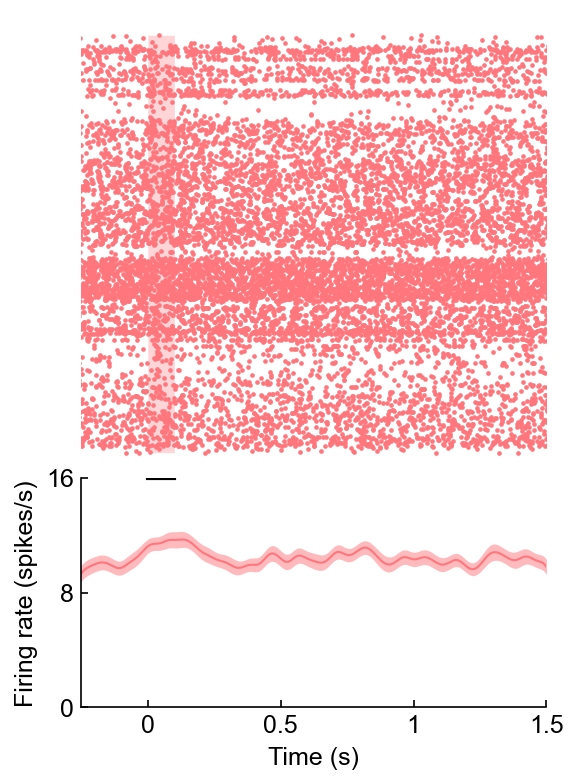

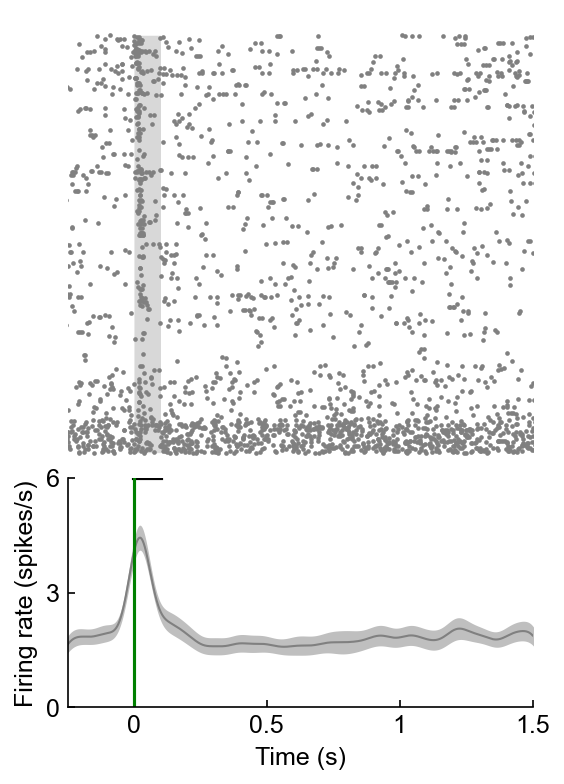

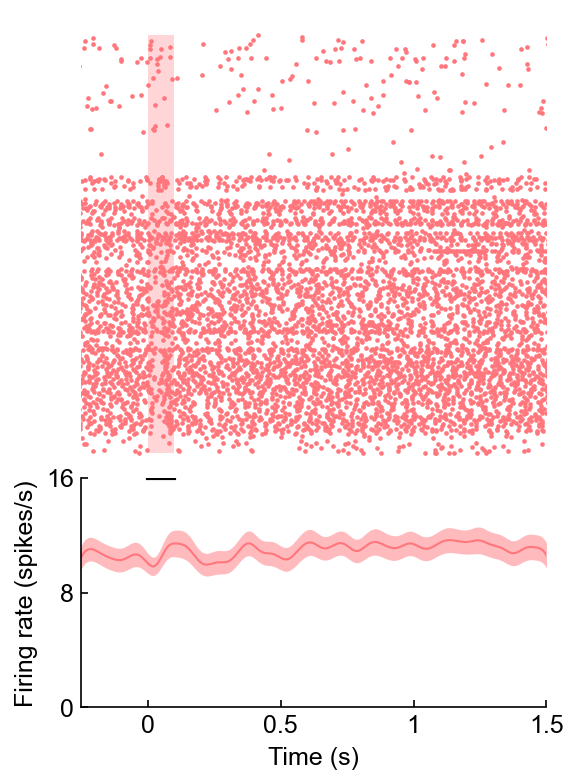

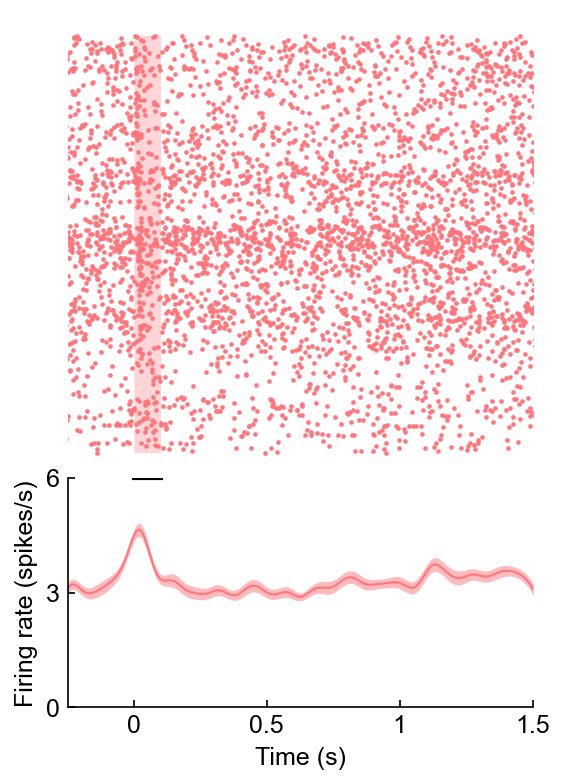

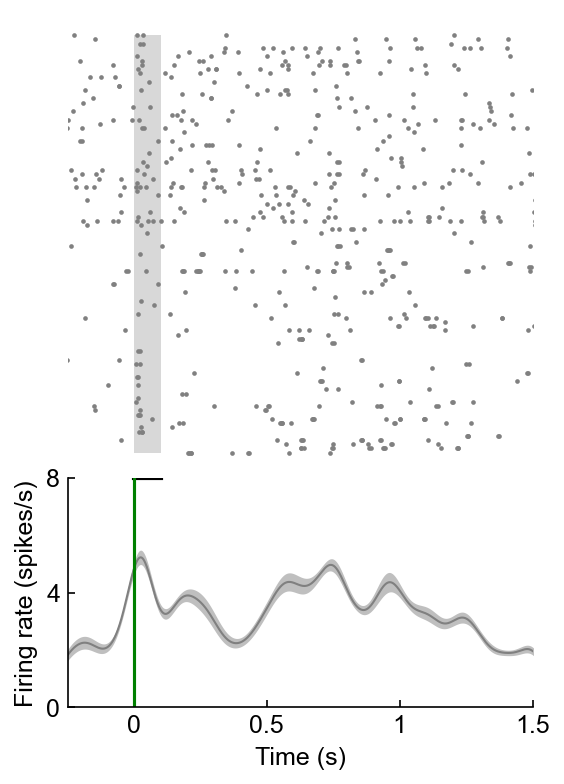

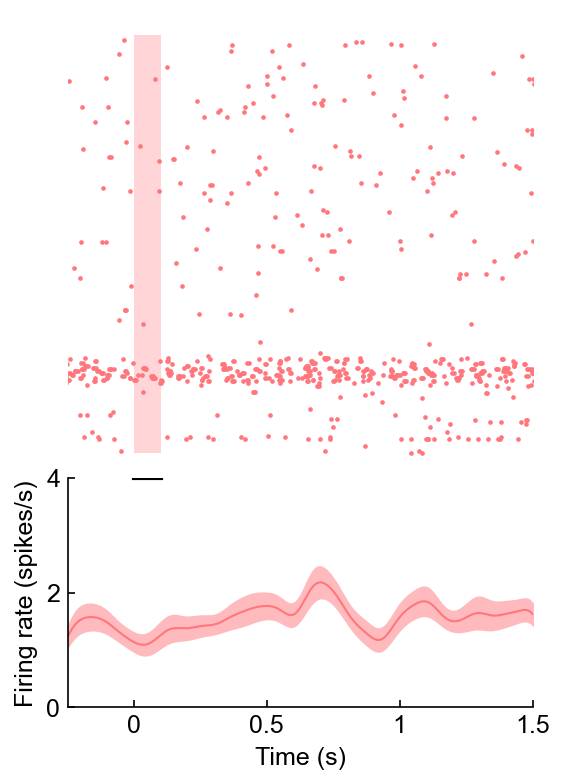

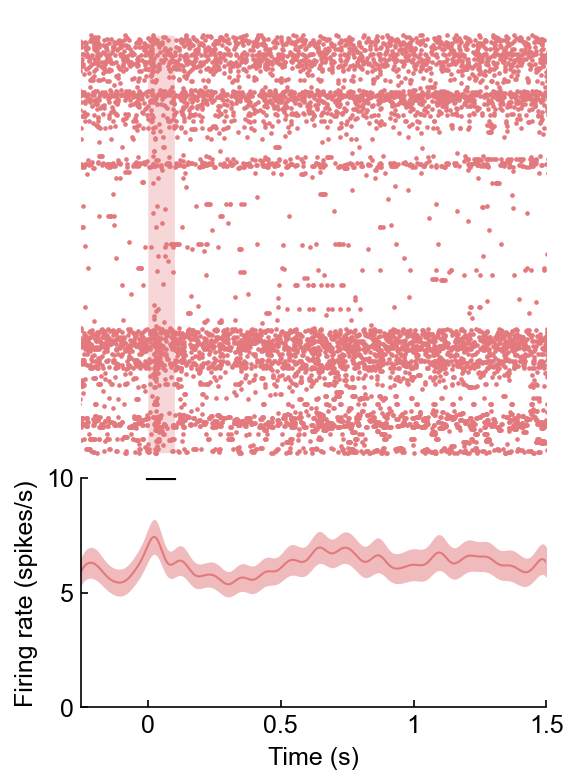

In [111]:
for clust in sessionfile.clusters.good:
    calculateStimulusLatency(sessionfile,clust)

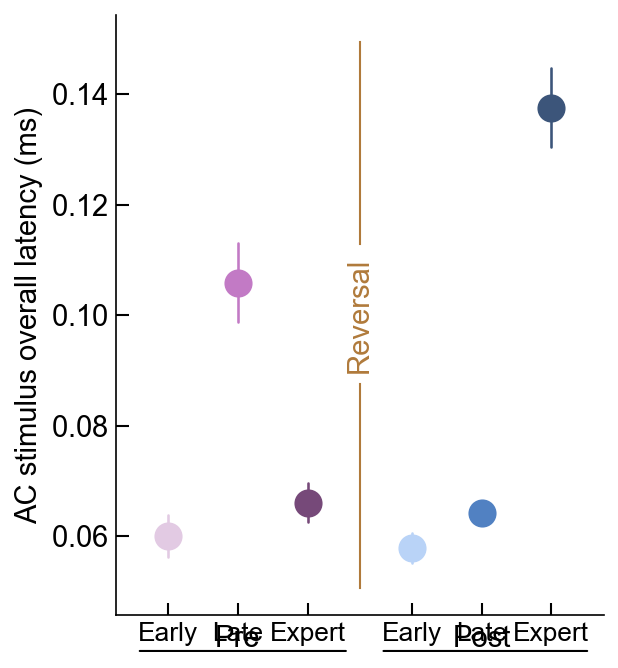

In [252]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [AC_latency_preearly_overall,AC_latency_prelate_overall,AC_latency_preexpert_overall,AC_latency_postearly_overall,AC_latency_postlate_overall,AC_latency_postexpert_overall]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

#ax.set_ylim([35,60])
#ax.set_yticks([35,40,45,50])
#ax.set_yticklabels(['35','40','45','50'])
ylab = ax.set_ylabel('AC stimulus overall latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\AC stimulus overall latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

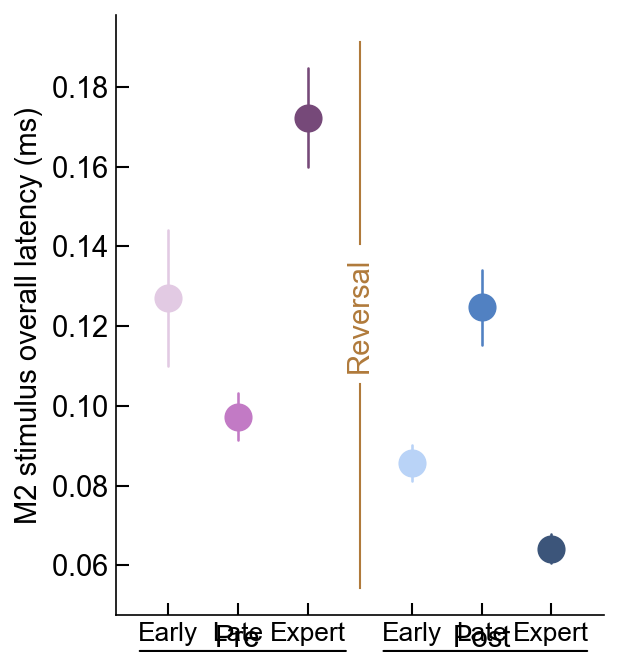

In [254]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [M2_latency_preearly_overall,M2_latency_prelate_overall,M2_latency_preexpert_overall,M2_latency_postearly_overall,M2_latency_postlate_overall,M2_latency_postexpert_overall]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

#ax.set_ylim([35,60])
#ax.set_yticks([45,50,55,60])
#ax.set_yticklabels(['45','50','55','60'])
ylab = ax.set_ylabel('M2 stimulus overall latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\M2 stimulus overall latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

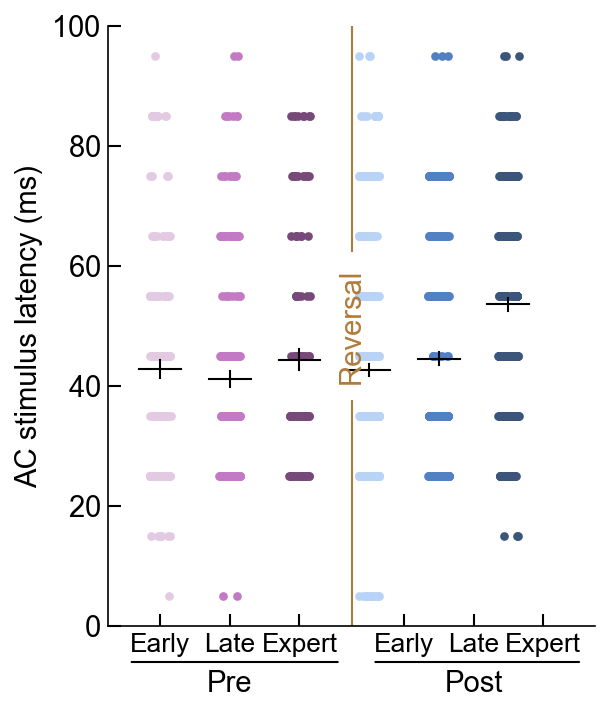

In [62]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [AC_latency_preearly_overall,AC_latency_prelate_overall,AC_latency_preexpert_overall,AC_latency_postearly_overall,AC_latency_postlate_overall,AC_latency_postexpert_overall]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

#Plot summary

sz = 35
width = 0.3

for idx,column in enumerate(data):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color
    mean = np.mean(Y)
    SEM = sem(Y)
    
    ax.scatter(X-switch_offset,Y,s=10, ec=border_color,fc=eye_color)
        
    ax.plot([idx-switch_offset-width,idx-switch_offset+width],[mean]*2,color='k',lw=1, clip_on = False)
    ax.plot([idx-switch_offset]*2,[mean-SEM,mean+SEM],color='k',lw=1, clip_on = False)
    
################################################################################################################


ax.set_ylim([0,100])
#ax.set_yticks([35,40,45,50])
#ax.set_yticklabels(['35','40','45','50'])
ylab = ax.set_ylabel('AC stimulus latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\AC stimulus overall latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


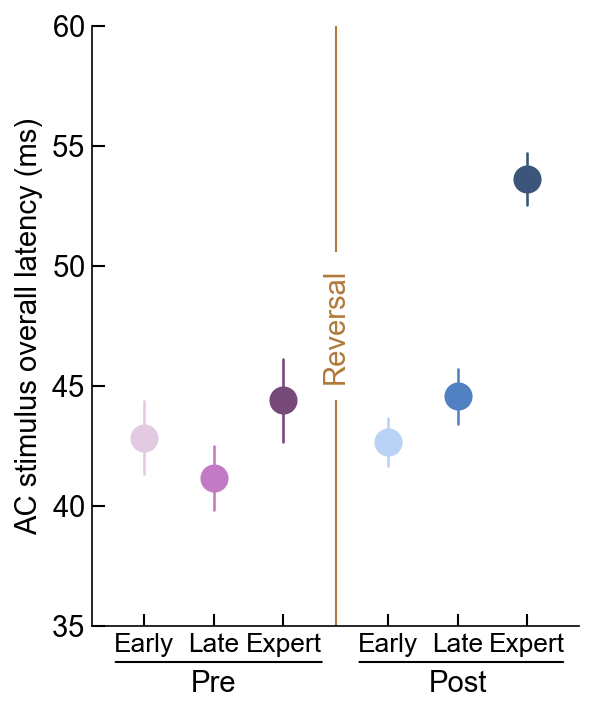

In [287]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [AC_latency_preearly_overall,AC_latency_prelate_overall,AC_latency_preexpert_overall,AC_latency_postearly_overall,AC_latency_postlate_overall,AC_latency_postexpert_overall]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([35,60])
#ax.set_yticks([35,40,45,50])
#ax.set_yticklabels(['35','40','45','50'])
ylab = ax.set_ylabel('AC stimulus overall latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\AC stimulus overall latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


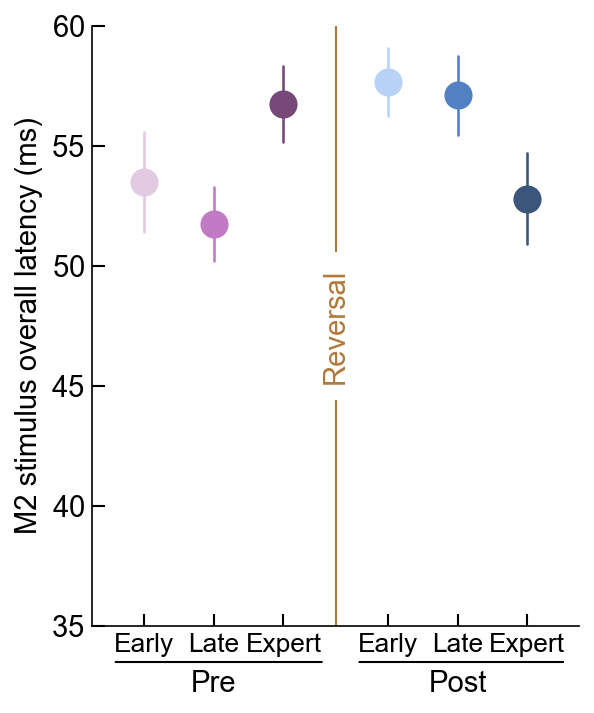

In [286]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [M2_latency_preearly_overall,M2_latency_prelate_overall,M2_latency_preexpert_overall,M2_latency_postearly_overall,M2_latency_postlate_overall,M2_latency_postexpert_overall]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([35,60])
#ax.set_yticks([45,50,55,60])
#ax.set_yticklabels(['45','50','55','60'])
ylab = ax.set_ylabel('M2 stimulus overall latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\M2 stimulus overall latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [234]:
ACData = SimpleNamespace()
ACData.preearly = AC_latency_preearly_overall
ACData.prelate = AC_latency_prelate_overall
ACData.preexpert = AC_latency_preexpert_overall
ACData.postearly = AC_latency_postearly_overall
ACData.postlate = AC_latency_postlate_overall
ACData.postexpert = AC_latency_postexpert_overall
ilep.nonparametricIndependentStatsCompareToPrevious(ACData)
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source             SS      DF           MS          F  \
0            phase   15690.240625     3.0  5230.080208  14.700433   
1          context    6417.184483     1.0  6417.184483  18.037082   
2  phase * context    7133.232732     3.0  2377.744244   6.683238   
3         Residual  663524.663767  1865.0   355.777300        NaN   

          p-unc       np2  
0  1.835633e-09  0.023101  
1  2.273079e-05  0.009579  
2  1.740029e-04  0.010636  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  2.187358e-09  8.749432e-09 -0.474189
8     post-late  baseline  experimental  9.024306e-01  9.024306e-01 -0.098595
9    pre-expert  baseline  experimental  1.099318e-01  2.198636e-01 -0.174750
10     pre-late  baseline  experimental  2.456873e-01  3.275831e-01  0.090721
key preearly has 148 non-nan elements
key prelate has 188 non-nan elements
key preexpert has 117 non-nan elements
key poste

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative         p-unc        p-corr p-adjust  \
0        False  218067.0   two-sided  2.518464e-06  5.036927e-06   fdr_bh   
1        False  106095.0   two-sided  1.885339e-06  5.036927e-06   fdr_bh   
2        False  118109.0   two-sided  1.658697e-07  9.952185e-07   fdr_bh   
3        False  102491.5   two-sided  3.433975e-01  4.120770e-01   fdr_bh   
4        False  113987.5   two-sided  2.158578e-01  3.237867e-01   fdr_bh   
5        False   51569.0   two-sided  8.856971e-01  8.856971e-01   fdr_bh   
6        False  391882.5   two-sided  7.284825e-05           NaN      NaN   
7        False   30582.0   two-sided  2.187358e-09  8.749432e-09   fdr_bh   
8        False   51890.0   two-sided  9.024306e-01  9.024306e-01   fdr_bh   
9        False    9832.0   two-sided  1.099318e-01  2.198636e-01   fdr_bh   
10       False   14915.5   two-sided  2.456873e-01  3.275831e-01   fdr_bh   

      hedges  
0   0.280953  
1   0.341852  
2   0.369596  
3   0.060194  
4   0.087170  
5   0.027411  
6  -0.195426  
7  -0.474189  
8  -0.098595  
9  -0.174750  
10  0.090721

In [221]:
9.024306e-01<0.05

False

In [223]:
3.275831e-01<0.05

False

In [220]:
M2Data = SimpleNamespace()
M2Data.preearly = M2_latency_preearly_overall
M2Data.prelate = M2_latency_prelate_overall
M2Data.preexpert = M2_latency_preexpert_overall
M2Data.postearly = M2_latency_postearly_overall
M2Data.postlate = M2_latency_postlate_overall
M2Data.postexpert = M2_latency_postexpert_overall
ilep.nonparametricIndependentStatsCompareToPrevious(M2Data)
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source            SS      DF           MS         F     p-unc  \
0            phase  6.039821e+03     3.0  2013.273526  3.231322  0.021583   
1          context  4.955203e+01     1.0    49.552029  0.079531  0.777966   
2  phase * context  4.966846e+03     3.0  1655.615467  2.657278  0.046920   
3         Residual  1.124604e+06  1805.0   623.049478       NaN       NaN   

        np2  
0  0.005342  
1  0.000044  
2  0.004397  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.136225  0.272450  0.165281
8     post-late  baseline  experimental  0.762048  0.762048  0.021691
9    pre-expert  baseline  experimental  0.027646  0.110585 -0.216569
10     pre-late  baseline  experimental  0.582204  0.762048  0.069947
key preearly has 159 non-nan elements
key prelate has 240 non-nan elements
key preexpert has 199 non-nan elements
key postearly has 349 non-nan elements
key postlate has 204 non-nan elements
ke

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative     p-unc    p-corr p-adjust    hedges  
0        False  110646.5   two-sided  0.160333  0.240499   fdr_bh -0.099754  
1        False   95807.5   two-sided  0.378301  0.378301   fdr_bh  0.034892  
2        False   89688.5   two-sided  0.101787  0.203575   fdr_bh  0.095595  
3        False  132202.0   two-sided  0.014517  0.043552   fdr_bh  0.139820  
4        False  123382.5   two-sided  0.001596  0.009575   fdr_bh  0.198197  
5        False   90901.0   two-sided  0.337349  0.378301   fdr_bh  0.065690  
6        False  417871.0   two-sided  0.465316       NaN      NaN  0.036510  
7        False   24080.0   two-sided  0.136225  0.272450   fdr_bh  0.165281  
8        False   36139.5   two-sided  0.762048  0.762048   fdr_bh  0.021691  
9        False   20999.0   two-sided  0.027646  0.110585   fdr_bh -0.216569  
10       False   19694.0   two-sided  0.582204  0.762048   fdr_bh  0.069947

In [ ]:
#AC

meta NOT subset; don't know how to subset; dropped


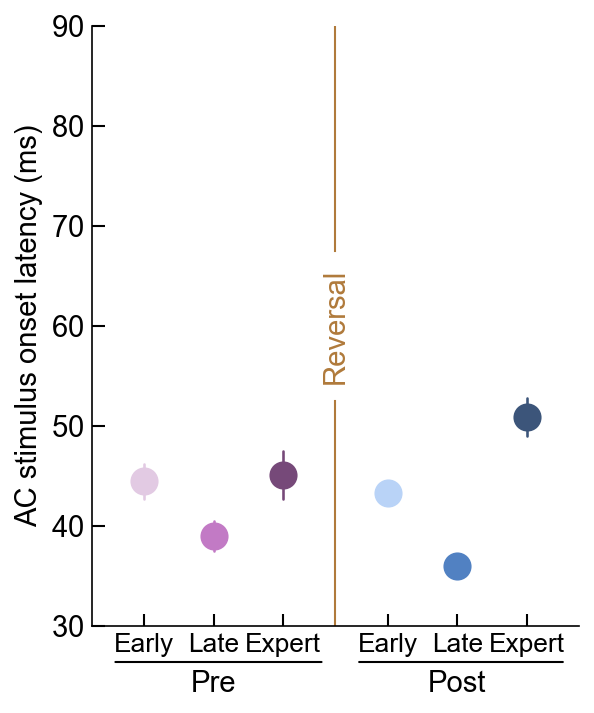

In [307]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [AC_latency_preearly_onset,AC_latency_prelate_onset,AC_latency_preexpert_onset,AC_latency_postearly_onset,AC_latency_postlate_onset,AC_latency_postexpert_onset]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([30,90])
#ax.set_yticks([35,40,45,50])
#ax.set_yticklabels(['35','40','45','50'])
ylab = ax.set_ylabel('AC stimulus onset latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\AC stimulus onset latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


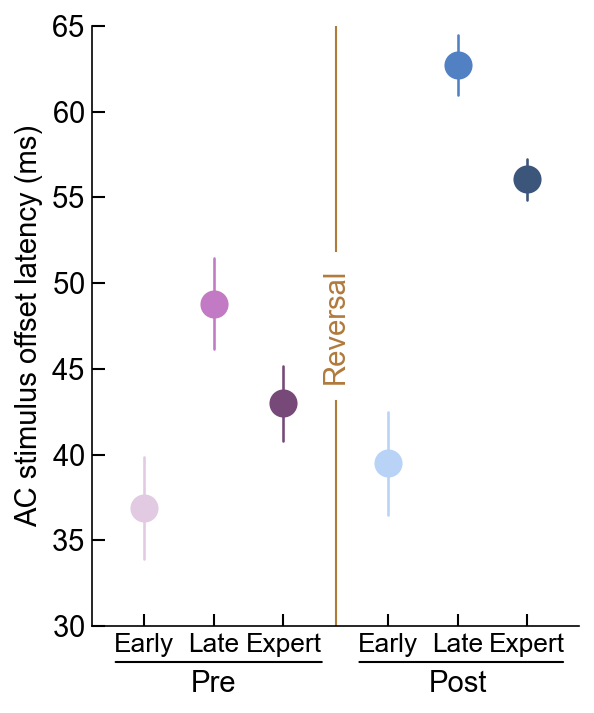

In [277]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [AC_latency_preearly_offset,AC_latency_prelate_offset,AC_latency_preexpert_offset,AC_latency_postearly_offset,AC_latency_postlate_offset,AC_latency_postexpert_offset]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([30,65])
#ax.set_yticks([0,40,80,120])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('AC stimulus offset latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\AC stimulus offset latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [183]:
ACData_onset = SimpleNamespace()
ACData_onset.preearly = AC_latency_preearly_onset
ACData_onset.prelate = AC_latency_prelate_onset
ACData_onset.preexpert = AC_latency_preexpert_onset
ACData_onset.postearly = AC_latency_postearly_onset
ACData_onset.postlate = AC_latency_postlate_onset
ACData_onset.postexpert = AC_latency_postexpert_onset
ilep.nonparametricIndependentStatsCompareToPrevious(ACData_onset)
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source             SS      DF           MS          F  \
0            phase     527.202711     3.0   175.734237   0.575211   
1          context     236.785479     1.0   236.785479   0.775044   
2  phase * context   27875.852282     3.0  9291.950761  30.414316   
3         Residual  398693.691044  1305.0   305.512407        NaN   

          p-unc       np2  
0  6.313558e-01  0.001321  
1  3.788233e-01  0.000594  
2  5.261411e-19  0.065349  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  9.297731e-11  3.719093e-10 -0.843651
8     post-late  baseline  experimental  2.412868e-07  4.825735e-07  0.453583
9    pre-expert  baseline  experimental  3.904486e-02  3.904486e-02 -0.322132
10     pre-late  baseline  experimental  2.818742e-03  3.758322e-03  0.300935
key preearly has 116 non-nan elements
key prelate has 146 non-nan elements
key preexpert has 77 non-nan elements
key postea

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative         p-unc        p-corr p-adjust  \
0        False   83891.0   two-sided  7.052901e-01  9.198710e-01   fdr_bh   
1        False   38720.5   two-sided  4.861636e-01  9.198710e-01   fdr_bh   
2        False   44220.5   two-sided  9.198710e-01  9.198710e-01   fdr_bh   
3        False   56027.0   two-sided  6.361294e-01  9.198710e-01   fdr_bh   
4        False   63731.0   two-sided  7.936811e-01  9.198710e-01   fdr_bh   
5        False   28244.5   two-sided  5.138757e-01  9.198710e-01   fdr_bh   
6        False  211441.0   two-sided  9.153879e-01           NaN      NaN   
7        False    8054.5   two-sided  9.297731e-11  3.719093e-10   fdr_bh   
8        False   37079.0   two-sided  2.412868e-07  4.825735e-07   fdr_bh   
9        False    4712.5   two-sided  3.904486e-02  3.904486e-02   fdr_bh   
10       False   10226.5   two-sided  2.818742e-03  3.758322e-03   fdr_bh   

      hedges  
0   0.089094  
1   0.040579  
2   0.024632  
3  -0.045456  
4  -0.064170  
5  -0.016652  
6  -0.048486  
7  -0.843651  
8   0.453583  
9  -0.322132  
10  0.300935

In [187]:
3.904486e-02<0.05

True

In [190]:
3.758322e-03 < 0.01

True

In [115]:
ACData_offset = SimpleNamespace()
ACData_offset.preearly = AC_latency_preearly_offset
ACData_offset.prelate = AC_latency_prelate_offset
ACData_offset.preexpert = AC_latency_preexpert_offset
ACData_offset.postearly = AC_latency_postearly_offset
ACData_offset.postlate = AC_latency_postlate_offset
ACData_offset.postexpert = AC_latency_postexpert_offset
ilep.nonparametricIndependentStatsCompareToPrevious(ACData_offset)

            Source             SS     DF           MS          F  \
0            phase   17379.089201    3.0  5793.029734  19.835119   
1          context    2358.550450    1.0  2358.550450   8.075589   
2  phase * context   23414.028350    3.0  7804.676117  26.722922   
3         Residual  161216.697995  552.0   292.059235        NaN   

          p-unc       np2  
0  3.187035e-12  0.097310  
1  4.652391e-03  0.014419  
2  3.764036e-16  0.126815  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  1.040845e-04  2.081691e-04  0.423718
8     post-late  baseline  experimental  1.816198e-08  7.264793e-08 -1.168292
9    pre-expert  baseline  experimental  2.184400e-02  2.184400e-02  0.367381
10     pre-late  baseline  experimental  6.664987e-03  8.886649e-03 -0.690229
key preearly has 32 non-nan elements
key prelate has 42 non-nan elements
key preexpert has 40 non-nan elements
key postearly has

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric    U-val alternative         p-unc        p-corr p-adjust  \
0        False  20748.5   two-sided  2.055033e-01  2.466040e-01   fdr_bh   
1        False  14514.0   two-sided  3.025801e-09  9.077404e-09   fdr_bh   
2        False  13369.0   two-sided  1.135949e-09  6.815697e-09   fdr_bh   
3        False   8068.0   two-sided  7.372404e-04  1.105861e-03   fdr_bh   
4        False   7579.0   two-sided  9.871214e-05  1.974243e-04   fdr_bh   
5        False   3113.5   two-sided  7.754639e-01  7.754639e-01   fdr_bh   
6        False  33945.0   two-sided  3.030529e-02           NaN      NaN   
7        False   9367.0   two-sided  1.040845e-04  2.081691e-04   fdr_bh   
8        False   1383.5   two-sided  1.816198e-08  7.264793e-08   fdr_bh   
9        False   1082.0   two-sided  2.184400e-02  2.184400e-02   fdr_bh   
10       False    427.0   two-sided  6.664987e-03  8.886649e-03   fdr_bh   

      hedges  
0   0.256508  
1   0.792397  
2   0.908494  
3   0.377293  
4   0.473512  
5   0.137014  
6  -0.260496  
7   0.423718  
8  -1.168292  
9   0.367381  
10 -0.690229

In [191]:
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

In [196]:
2.081691e-04 < 0.001

True

In [198]:
2.184400e-02 < 0.05

True

In [201]:
8.886649e-03 <0.01

True

meta NOT subset; don't know how to subset; dropped


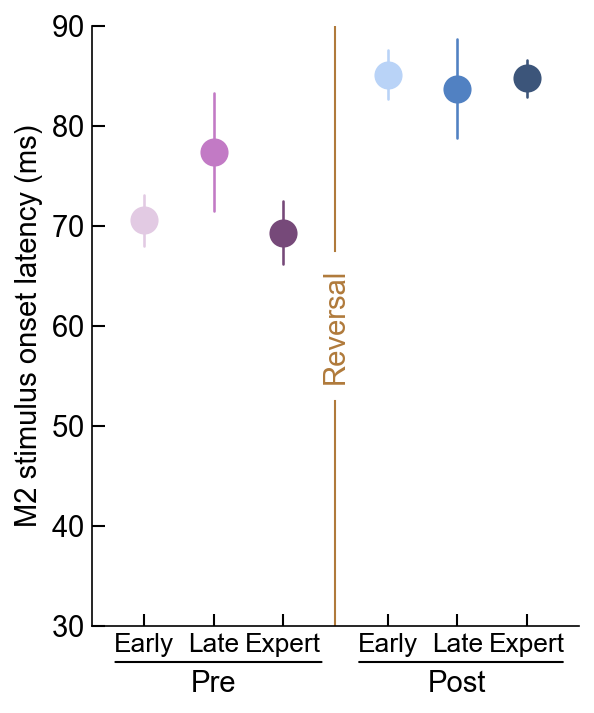

In [306]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [M2_latency_preearly_onset,M2_latency_prelate_onset,M2_latency_preexpert_onset,M2_latency_postearly_onset,M2_latency_postlate_onset,M2_latency_postexpert_onset]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([30,90])
#ax.set_yticks([0,40,80,120])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('M2 stimulus onset latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\M2 stimulus onset latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


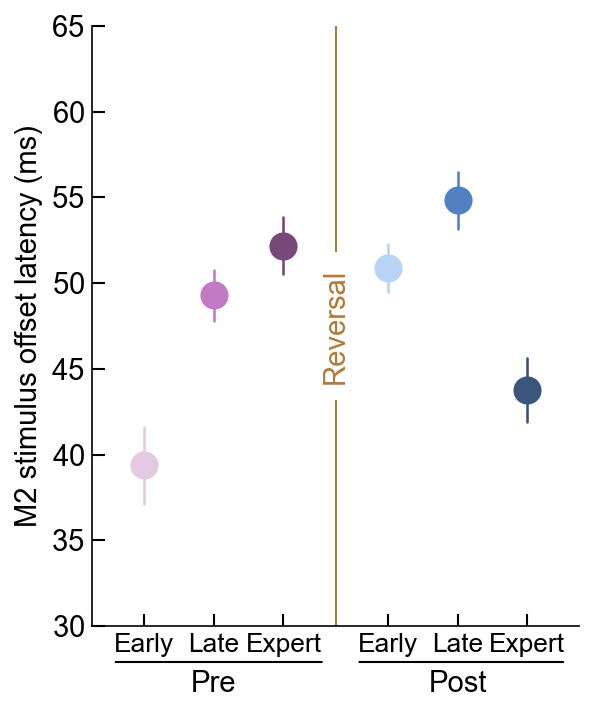

In [303]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [M2_latency_preearly_offset,M2_latency_prelate_offset,M2_latency_preexpert_offset,M2_latency_postearly_offset,M2_latency_postlate_offset,M2_latency_postexpert_offset]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([30,65])
#ax.set_yticks([35,50,65,80,95])
#ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('M2 stimulus offset latency (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\M2 stimulus offset latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [202]:
M2Data_onset = SimpleNamespace()
M2Data_onset.preearly = M2_latency_preearly_onset
M2Data_onset.prelate = M2_latency_prelate_onset
M2Data_onset.preexpert = M2_latency_preexpert_onset
M2Data_onset.postearly = M2_latency_postearly_onset
M2Data_onset.postlate = M2_latency_postlate_onset
M2Data_onset.postexpert = M2_latency_postexpert_onset
ilep.nonparametricIndependentStatsCompareToPrevious(M2Data_onset)

# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source             SS     DF           MS         F     p-unc  \
0            phase   12983.614468    3.0  4327.871489  9.674167  0.000004   
1          context       4.321269    1.0     4.321269  0.009659  0.921772   
2  phase * context    1763.937475    3.0   587.979158  1.314320  0.269757   
3         Residual  137788.036723  308.0   447.363756       NaN       NaN   

        np2  
0  0.086114  
1  0.000031  
2  0.012640  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.719742  0.719742 -0.069805
8     post-late  baseline  experimental  0.101582  0.135443  0.068223
9    pre-expert  baseline  experimental  0.007785  0.031140  0.329923
10     pre-late  baseline  experimental  0.049592  0.099185 -0.293634
key preearly has 72 non-nan elements
key prelate has 21 non-nan elements
key preexpert has 53 non-nan elements
key postearly has 69 non-nan elements
key postlate has 16 non-nan elements
key pos

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric    U-val alternative         p-unc        p-corr p-adjust  \
0        False   2234.5   two-sided  3.277122e-02  3.932546e-02   fdr_bh   
1        False   3232.5   two-sided  1.293848e-04  2.587695e-04   fdr_bh   
2        False   3939.0   two-sided  3.726162e-04  5.589242e-04   fdr_bh   
3        False   4703.0   two-sided  1.046471e-08  6.278824e-08   fdr_bh   
4        False   5576.0   two-sided  4.058737e-07  1.217621e-06   fdr_bh   
5        False   3431.0   two-sided  9.750710e-01  9.750710e-01   fdr_bh   
6        False  13372.5   two-sided  1.564420e-01           NaN      NaN   
7        False    406.0   two-sided  7.197421e-01  7.197421e-01   fdr_bh   
8        False    668.0   two-sided  1.015824e-01  1.354432e-01   fdr_bh   
9        False    772.0   two-sided  7.785086e-03  3.114035e-02   fdr_bh   
10       False    546.5   two-sided  4.959248e-02  9.918496e-02   fdr_bh   

      hedges  
0  -0.019415  
1   0.630759  
2   0.615728  
3   0.596099  
4   0.585489  
5  -0.020034  
6   0.026866  
7  -0.069805  
8   0.068223  
9   0.329923  
10 -0.293634

In [205]:
3.114035e-02<0.05

True

In [113]:
M2Data_offset = SimpleNamespace()
M2Data_offset.preearly = M2_latency_preearly_offset
M2Data_offset.prelate = M2_latency_prelate_offset
M2Data_offset.preexpert = M2_latency_preexpert_offset
M2Data_offset.postearly = M2_latency_postearly_offset
M2Data_offset.postlate = M2_latency_postlate_offset
M2Data_offset.postexpert = M2_latency_postexpert_offset
ilep.nonparametricIndependentStatsCompareToPrevious(M2Data_offset)

# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source             SS      DF           MS          F  \
0            phase    7120.291546     3.0  2373.430515   4.685641   
1          context     304.454899     1.0   304.454899   0.601057   
2  phase * context   19268.875406     3.0  6422.958469  12.680243   
3         Residual  754227.253111  1489.0   506.532742        NaN   

          p-unc       np2  
0  2.911042e-03  0.009352  
1  4.382982e-01  0.000404  
2  3.476190e-08  0.024911  
3           NaN       NaN  

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.000010  0.000039  0.471352
8     post-late  baseline  experimental  0.069181  0.092241 -0.169862
9    pre-expert  baseline  experimental  0.335375  0.335375 -0.135920
10     pre-late  baseline  experimental  0.000195  0.000389 -0.456289
key preearly has 87 non-nan elements
key prelate has 219 non-nan elements
key preexpert has 146 non-nan elements
key postearly has 280 non-nan elements
key postlat

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative     p-unc    p-corr p-adjust    hedges  
0        False   77997.0   two-sided  0.083206  0.099848   fdr_bh -0.122619  
1        False   65538.5   two-sided  0.941509  0.941509   fdr_bh -0.038311  
2        False   59781.5   two-sided  0.039440  0.069503   fdr_bh  0.133991  
3        False   92155.5   two-sided  0.046335  0.069503   fdr_bh  0.090292  
4        False   83437.0   two-sided  0.000077  0.000462   fdr_bh  0.263076  
5        False   61496.0   two-sided  0.021958  0.065875   fdr_bh  0.183428  
6        False  281663.0   two-sided  0.821072       NaN      NaN  0.003614  
7        False   20236.5   two-sided  0.000010  0.000039   fdr_bh  0.471352  
8        False   23769.5   two-sided  0.069181  0.092241   fdr_bh -0.169862  
9        False   15049.0   two-sided  0.335375  0.335375   fdr_bh -0.135920  
10       False    6962.0   two-sided  0.000195  0.000389   fdr_bh -0.456289

In [208]:
0.000039 < 0.0001

True

In [209]:
0.000389 < 0.001

True

### old Latency figure

meta NOT subset; don't know how to subset; dropped


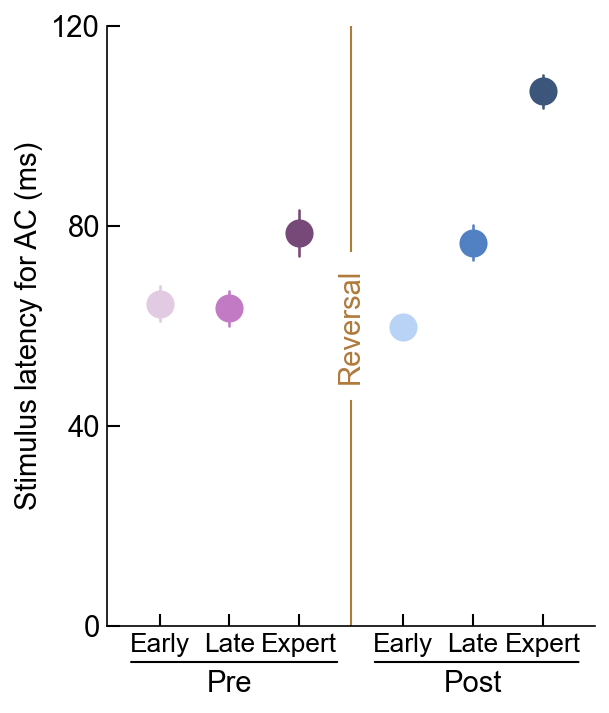

In [20]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [AC_latency_preearly,AC_latency_prelate,AC_latency_preexpert,AC_latency_postearly,AC_latency_postlate,AC_latency_postexpert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,120])
ax.set_yticks([0,40,80,120])
ax.set_yticklabels(['0','40','80','120'])
ylab = ax.set_ylabel('Stimulus latency for AC (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\AC stimulus latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


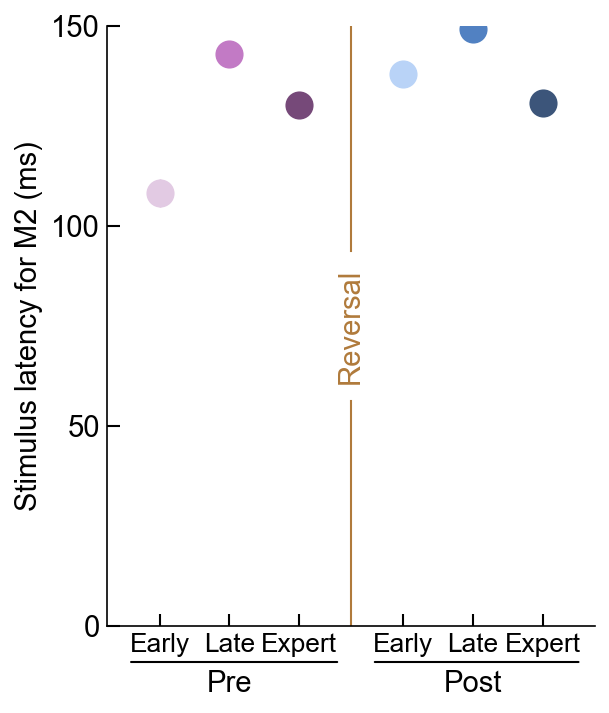

In [21]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [M2_latency_preearly,M2_latency_prelate,M2_latency_preexpert,M2_latency_postearly,M2_latency_postlate,M2_latency_postexpert]
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']

#numCon = len(data)
#X = [np.ones(len(l))*idx for idx,l in enumerate(data)]
#X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
# numunits = [len(d) for d in data]
# cumsumunits = np.cumsum(numunits)
# unitsperphase= np.concatenate([[0],cumsumunits])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    
    eye_color=PHASE_COLORS[idx]
    border_color = eye_color

    summary_size=150
    summary_width=1.25
    
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    if idx<3:
        ax.scatter([idx-switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx-switch_offset, idx-switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    else:
        ax.scatter([idx+switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
        ax.plot([idx+switch_offset, idx+switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,150])
ax.set_yticks([0,50,100,150])
ax.set_yticklabels(['0','50','100','150'])
ylab = ax.set_ylabel('Stimulus latency for M2 (ms)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Latency\\M2 stimulus latency.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

### old Stats

In [20]:
M2Data = SimpleNamespace()
M2Data.preearly = M2_latency_preearly
M2Data.prelate = M2_latency_prelate
M2Data.preexpert = M2_latency_preexpert
M2Data.postearly = M2_latency_postearly
M2Data.postlate = M2_latency_postlate
M2Data.postexpert = M2_latency_postexpert
ilep.nonparametricIndependentStatsCompareToPrevious(M2Data)

# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source            SS      DF            MS          F  \
0            phase  4.503586e+04     3.0  15011.952761  13.139709   
1          context  4.746570e+03     1.0   4746.569659   4.154592   
2  phase * context  1.817129e+05     3.0  60570.972620  53.016749   
3         Residual  2.062190e+06  1805.0   1142.487496        NaN   

          p-unc       np2  
0  1.730899e-08  0.021372  
1  4.166726e-02  0.002296  
2  7.721730e-33  0.080981  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  2.038268e-09  4.076536e-09  0.587778
8     post-late  baseline  experimental  1.869596e-04  2.492794e-04 -0.344464
9    pre-expert  baseline  experimental  6.858077e-03  6.858077e-03  0.355113
10     pre-late  baseline  experimental  3.374987e-18  1.349995e-17 -1.001733
key preearly has 159 non-nan elements
key prelate has 240 non-nan elements
key preexpert has 199 non-nan elements
key poste

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative         p-unc        p-corr p-adjust  \
0        False  110661.5   two-sided  1.618799e-01  1.942559e-01   fdr_bh   
1        False   95263.0   two-sided  4.664221e-01  4.664221e-01   fdr_bh   
2        False   97014.5   two-sided  1.424216e-04  4.272648e-04   fdr_bh   
3        False  131490.5   two-sided  2.267463e-02  3.401194e-02   fdr_bh   
4        False  132537.0   two-sided  8.587754e-08  5.152652e-07   fdr_bh   
5        False   98872.0   two-sided  1.154084e-03  2.308169e-03   fdr_bh   
6        False  401847.5   two-sided  4.690817e-01           NaN      NaN   
7        False   29666.5   two-sided  2.038268e-09  4.076536e-09   fdr_bh   
8        False   28917.5   two-sided  1.869596e-04  2.492794e-04   fdr_bh   
9        False   27428.0   two-sided  6.858077e-03  6.858077e-03   fdr_bh   
10       False    9335.5   two-sided  3.374987e-18  1.349995e-17   fdr_bh   

      hedges  
0  -0.071659  
1   0.073256  
2   0.296240  
3   0.140997  
4   0.362921  
5   0.213209  
6  -0.049344  
7   0.587778  
8  -0.344464  
9   0.355113  
10 -1.001733

In [21]:
ilep.nonparametricIndependentStatsCompareToOwnEarly(M2Data)

            Source            SS      DF            MS          F  \
0            phase  1.408989e+05     3.0  46966.286370  37.423233   
1          context  7.459284e+04     1.0  74592.844810  59.436366   
2  phase * context  1.070760e+05     3.0  35692.005948  28.439767   
3         Residual  2.345601e+06  1869.0   1255.003453        NaN   

          p-unc       np2  
0  1.751833e-23  0.056666  
1  2.037820e-14  0.030821  
2  5.578542e-18  0.043657  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  5.101347e-03  5.101347e-03  0.207953
8     post-late  baseline  experimental  1.869596e-04  2.492794e-04 -0.344464
9    pre-expert  baseline  experimental  1.450040e-07  2.900080e-07 -0.528277
10     pre-late  baseline  experimental  3.374987e-18  1.349995e-17 -1.001733
key preearly has 159 non-nan elements
key prelate has 240 non-nan elements
key preexpert has 199 non-nan elements
key poste

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative         p-unc        p-corr p-adjust  \
0        False  137393.0   two-sided  2.955638e-04  4.433457e-04   fdr_bh   
1        False  121644.0   two-sided  3.047786e-07  6.095572e-07   fdr_bh   
2        False  121758.5   two-sided  4.161766e-02  4.161766e-02   fdr_bh   
3        False  129684.5   two-sided  1.503905e-15  9.023431e-15   fdr_bh   
4        False  132537.0   two-sided  8.587754e-08  2.576326e-07   fdr_bh   
5        False   63223.5   two-sided  6.092834e-03  7.311400e-03   fdr_bh   
6        False  376325.0   two-sided  1.473897e-07           NaN      NaN   
7        False   43312.5   two-sided  5.101347e-03  5.101347e-03   fdr_bh   
8        False   28917.5   two-sided  1.869596e-04  2.492794e-04   fdr_bh   
9        False   10725.5   two-sided  1.450040e-07  2.900080e-07   fdr_bh   
10       False    9335.5   two-sided  3.374987e-18  1.349995e-17   fdr_bh   

      hedges  
0  -0.204532  
1   0.390338  
2   0.166533  
3   0.580438  
4   0.362921  
5  -0.215071  
6  -0.263722  
7   0.207953  
8  -0.344464  
9  -0.528277  
10 -1.001733

In [23]:
ACData = SimpleNamespace()
ACData.preearly = AC_latency_preearly
ACData.prelate = AC_latency_prelate
ACData.preexpert = AC_latency_preexpert
ACData.postearly = AC_latency_postearly
ACData.postlate = AC_latency_postlate
ACData.postexpert = AC_latency_postexpert
ilep.nonparametricIndependentStatsCompareToPrevious(ACData)

            Source            SS      DF             MS          F  \
0            phase  2.446833e+05     3.0   81561.093736  29.531834   
1          context  1.432691e+05     1.0  143269.075927  51.875207   
2  phase * context  5.255999e+04     3.0   17519.996803   6.343682   
3         Residual  5.150762e+06  1865.0    2761.802481        NaN   

          p-unc       np2  
0  1.189229e-18  0.045350  
1  8.543259e-13  0.027062  
2  2.813645e-04  0.010101  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  7.907742e-10  3.163097e-09 -0.516700
8     post-late  baseline  experimental  5.124456e-01  5.124456e-01 -0.327648
9    pre-expert  baseline  experimental  7.561485e-03  1.512297e-02 -0.303252
10     pre-late  baseline  experimental  1.042338e-01  1.389784e-01  0.020456
key preearly has 148 non-nan elements
key prelate has 188 non-nan elements
key preexpert has 117 non-nan elements
key 

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative         p-unc        p-corr p-adjust  \
0        False  226655.5   two-sided  1.260654e-09  3.781963e-09   fdr_bh   
1        False  108538.5   two-sided  6.228041e-08  1.245608e-07   fdr_bh   
2        False  122565.5   two-sided  1.979241e-10  1.187544e-09   fdr_bh   
3        False   98883.0   two-sided  9.872310e-01  9.872310e-01   fdr_bh   
4        False  112182.0   two-sided  4.257467e-01  5.845646e-01   fdr_bh   
5        False   52842.0   two-sided  4.871372e-01  5.845646e-01   fdr_bh   
6        False  373956.0   two-sided  3.957970e-08           NaN      NaN   
7        False   30189.5   two-sided  7.907742e-10  3.163097e-09   fdr_bh   
8        False   50642.5   two-sided  5.124456e-01  5.124456e-01   fdr_bh   
9        False    9028.5   two-sided  7.561485e-03  1.512297e-02   fdr_bh   
10       False   15325.5   two-sided  1.042338e-01  1.389784e-01   fdr_bh   

      hedges  
0   0.424651  
1   0.387833  
2   0.494100  
3  -0.032564  
4   0.073833  
5   0.111481  
6  -0.324007  
7  -0.516700  
8  -0.327648  
9  -0.303252  
10  0.020456

In [24]:
ilep.nonparametricIndependentStatsCompareToOwnEarly(ACData)

            Source            SS      DF             MS           F  \
0            phase  1.032724e+05     3.0   34424.130325   14.582901   
1          context  2.567279e+05     1.0  256727.918862  108.756209   
2  phase * context  1.497945e+05     3.0   49931.516351   21.152208   
3         Residual  4.426091e+06  1875.0    2360.581720         NaN   

          p-unc       np2  
0  2.169749e-09  0.022801  
1  8.618057e-25  0.054823  
2  1.784092e-13  0.032736  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  6.815382e-25  2.726153e-24 -0.978785
8     post-late  baseline  experimental  5.124456e-01  5.124456e-01 -0.327648
9    pre-expert  baseline  experimental  8.845166e-02  1.389784e-01 -0.306319
10     pre-late  baseline  experimental  1.042338e-01  1.389784e-01  0.020456
key preearly has 148 non-nan elements
key prelate has 188 non-nan elements
key preexpert has 117 non-nan elements

Contrast        phase            A             B Paired  \
0             phase            -  post-expert     post-late  False   
1             phase            -  post-expert    pre-expert  False   
2             phase            -  post-expert      pre-late  False   
3             phase            -    post-late    pre-expert  False   
4             phase            -    post-late      pre-late  False   
5             phase            -   pre-expert      pre-late  False   
6           context            -     baseline  experimental  False   
7   phase * context  post-expert     baseline  experimental  False   
8   phase * context    post-late     baseline  experimental  False   
9   phase * context   pre-expert     baseline  experimental  False   
10  phase * context     pre-late     baseline  experimental  False   

    Parametric     U-val alternative         p-unc        p-corr p-adjust  \
0        False  239789.5   two-sided  1.630333e-07  4.890999e-07   fdr_bh   
1        False   93861.0   two-sided  5.186584e-03  1.037317e-02   fdr_bh   
2        False  128427.5   two-sided  1.021375e-07  4.890999e-07   fdr_bh   
3        False   79873.0   two-sided  9.364909e-02  1.123789e-01   fdr_bh   
4        False  112182.0   two-sided  4.257467e-01  4.257467e-01   fdr_bh   
5        False   48949.0   two-sided  3.382817e-02  5.074225e-02   fdr_bh   
6        False  370473.0   two-sided  9.348837e-10           NaN      NaN   
7        False   26244.0   two-sided  6.815382e-25  2.726153e-24   fdr_bh   
8        False   50642.5   two-sided  5.124456e-01  5.124456e-01   fdr_bh   
9        False    7612.0   two-sided  8.845166e-02  1.389784e-01   fdr_bh   
10       False   15325.5   two-sided  1.042338e-01  1.389784e-01   fdr_bh   

      hedges  
0   0.254712  
1   0.200750  
2   0.334932  
3  -0.061014  
4   0.073833  
5   0.145980  
6  -0.453250  
7  -0.978785  
8  -0.327648  
9  -0.306319  
10  0.020456

In [24]:
len(M2_latency_preearly)

159

In [25]:
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

In [2]:
5.124456e-01

0.5124456

In [3]:
1.512297e-02 

0.01512297

In [4]:
 	1.389784e-01

0.1389784

In [5]:
4.076536e-09 	

4.076536e-09

In [6]:
2.492794e-04

0.0002492794

In [7]:
6.858077e-03

0.006858077